## Reaseach Question

What is the impact of fuel index on other indexes in inflation forecasting for the United Kingdom ?

### Package Installations

In [1]:
! pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 27.4 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Retrieving Data

### Data Reading

In [3]:
# read CSV files and filter them to only include data for Great Britain (GBR)
# The data is then sliced to exclude the first 4 columns, and only keep the data starting from the 5th column.
ccpiData = pd.read_csv('ccpi_m.csv')
ccpiData = ccpiData[ccpiData['Country Code'] =='GBR'].iloc[:,4:]
ecpiData = pd.read_csv('ecpi_m.csv')
ecpiData = ecpiData[ecpiData['Country Code'] =='GBR'].iloc[:,4:]
fcpiData = pd.read_csv('fcpi_m.csv')
fcpiData = fcpiData[fcpiData['Country Code'] =='GBR'].iloc[:,4:]
hcpiData = pd.read_csv('hcpi_m.csv')
hcpiData = hcpiData[hcpiData['Country Code'] =='GBR'].iloc[:,4:]
ppiData = pd.read_csv('ppi_m.csv')
ppiData = ppiData[ppiData['Country Code'] =='GBR'].iloc[:,4:]


## Data preparation

### Data Pre-Processing

In [4]:
# Concatenating dataframes into one
rawDF = pd.concat([ccpiData, ecpiData, fcpiData, hcpiData, ppiData])

# Transposing the dataframe
rawDF = rawDF.T

# Renaming columns with the first row of the dataframe
rawDF.rename(columns=rawDF.iloc[0,:], inplace = True)

# Removing the first row from the dataframe
rawDF = rawDF.tail(-1)

# Removing the last row from the dataframe
rawDF.drop(rawDF.tail(1).index,inplace=True)

# Creating a new datetime index by converting the existing index values
time = pd.DatetimeIndex([i[:-2]+'-'+i[-2:] for i in rawDF.index])

# Setting the new datetime index as the index for the dataframe
rawDF = rawDF.set_index(time)

# Converting the 'Energy Price Index' column to numeric
rawDF['Energy Price Index'] = pd.to_numeric(rawDF['Energy Price Index'])

# Filling missing values in the dataframe with forward fill and backward fill methods
df = rawDF.fillna(method='ffill').fillna(method='bfill')

df


Official Core Consumer Price Index  Energy Price Index  \
1970-01-01                                 8.9                 5.0   
1970-02-01                                 9.0                 4.9   
1970-03-01                                 9.0                 5.1   
1970-04-01                                 9.2                 5.6   
1970-05-01                                 9.2                 6.1   
...                                        ...                 ...   
2022-08-01                               118.7                 8.6   
2022-09-01                               119.3                 8.8   
2022-10-01                               120.0                 9.6   
2022-11-01                               120.4                 9.3   
2022-12-01                               120.4                 9.3   

            Food Price Index  Headline Consumer Price Index  \
1970-01-01               7.8                            8.1   
1970-02-01               7.9                            8.2   
1970-03-01               8.0                            8.2   
1970-04-01               8.1                            8.3   
1970-05-01               8.2                            8.4   
...                      ...                            ...   
2022-08-01             118.3                          121.8   
2022-09-01             119.6                          122.3   
2022-10-01             122.0                          124.3   
2022-11-01             123.4                          124.8   
2022-12-01             123.4                          125.3   

            Producer Price Index  
1970-01-01                  8.65  
1970-02-01                  8.71  
1970-03-01                  8.76  
1970-04-01                  8.82  
1970-05-01                  8.93  
...                          ...  
2022-08-01                145.97  
2022-09-01                147.50  
2022-10-01                147.50  
2022-11-01                147.50  
2022-12-01                147.50  

[636 rows x 5 columns]

### Data Normalization

**Min-Max Approach:** The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range.

In [5]:
# normalize df by subtracting minimum and dividing by range
normalized_df =(df-df.min())/(df.max()-df.min())
normalized_df.head()

Official Core Consumer Price Index  Energy Price Index  \
1970-01-01                            0.000000            0.179775   
1970-02-01                            0.000897            0.176030   
1970-03-01                            0.000897            0.183521   
1970-04-01                            0.002691            0.202247   
1970-05-01                            0.002691            0.220974   

            Food Price Index  Headline Consumer Price Index  \
1970-01-01          0.000000                       0.000000   
1970-02-01          0.000865                       0.000853   
1970-03-01          0.001730                       0.000853   
1970-04-01          0.002595                       0.001706   
1970-05-01          0.003460                       0.002560   

            Producer Price Index  
1970-01-01              0.000000  
1970-02-01              0.000432  
1970-03-01              0.000792  
1970-04-01              0.001224  
1970-05-01              0.002017

**The z-score method :** The z-score method (often called standardization) transforms the info into distribution with a mean of 0 and a typical deviation of 1. Each standardized value is computed by subtracting the mean of the corresponding feature then dividing by the quality deviation.

In [6]:
df_zscore = df.copy()
for column in df_zscore.columns:
    # Compute the z-score of each element in the current column 
    # by subtracting the mean of the column and dividing by the standard deviation of the column
    
    df_zscore[column] = (df_zscore[column] -
                           df_zscore[column].mean()) / df_zscore[column].std()    
df_zscore.head()

Official Core Consumer Price Index  Energy Price Index  \
1970-01-01                           -1.804477           -0.075336   
1970-02-01                           -1.801295           -0.094425   
1970-03-01                           -1.801295           -0.056247   
1970-04-01                           -1.794931            0.039199   
1970-05-01                           -1.794931            0.134644   

            Food Price Index  Headline Consumer Price Index  \
1970-01-01         -1.798993                      -1.744723   
1970-02-01         -1.795657                      -1.741560   
1970-03-01         -1.792321                      -1.741560   
1970-04-01         -1.788984                      -1.738398   
1970-05-01         -1.785648                      -1.735235   

            Producer Price Index  
1970-01-01             -1.686445  
1970-02-01             -1.684701  
1970-03-01             -1.683247  
1970-04-01             -1.681502  
1970-05-01             -1.678304

**Maximum Absolute Scaling:** The maximum absolute scaling rescales each feature between -1 and 1 by dividing every observation by its maximum absolute value.

In [7]:
df_scaled = df.copy()
# Apply maximum absolute scaling to each column in the DataFrame
for column in df_scaled.columns:
    df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
df_scaled.head()

Official Core Consumer Price Index  Energy Price Index  \
1970-01-01                            0.073920            0.185874   
1970-02-01                            0.074751            0.182156   
1970-03-01                            0.074751            0.189591   
1970-04-01                            0.076412            0.208178   
1970-05-01                            0.076412            0.226766   

            Food Price Index  Headline Consumer Price Index  \
1970-01-01          0.063209                       0.064645   
1970-02-01          0.064019                       0.065443   
1970-03-01          0.064830                       0.065443   
1970-04-01          0.065640                       0.066241   
1970-05-01          0.066451                       0.067039   

            Producer Price Index  
1970-01-01              0.058644  
1970-02-01              0.059051  
1970-03-01              0.059390  
1970-04-01              0.059797  
1970-05-01              0.060542

**The Robust Scaling:** In robust scaling, we scale each feature of the data set by subtracting the median and then dividing by the interquartile range. The interquartile range (IQR) is defined as the difference between the third and the first quartile and represents the central 50% of the data.  This method comes in handy when working with data sets that contain many outliers because it uses statistics that are robust to outliers (median and interquartile range), in contrast with the previous scalers, which use statistics that are highly affected by outliers such as the maximum, the minimum, the mean, and the standard deviation.

In [8]:
df_robust = df.copy()
# apply the robust scaling formula to each value in the current column and store the result back in the same column
for column in df_robust.columns:
    df_robust[column] = (df_robust[column] - df_robust[column].median())  / (df_robust[column].quantile(0.75) - df_robust[column].quantile(0.25))
df_robust.head()

Official Core Consumer Price Index  Energy Price Index  \
1970-01-01                           -1.314685            0.363636   
1970-02-01                           -1.312687            0.345455   
1970-03-01                           -1.312687            0.381818   
1970-04-01                           -1.308691            0.472727   
1970-05-01                           -1.308691            0.563636   

            Food Price Index  Headline Consumer Price Index  \
1970-01-01         -1.164544                      -1.206776   
1970-02-01         -1.162506                      -1.204783   
1970-03-01         -1.160469                      -1.204783   
1970-04-01         -1.158431                      -1.202790   
1970-05-01         -1.156393                      -1.200797   

            Producer Price Index  
1970-01-01             -1.066119  
1970-02-01             -1.065080  
1970-03-01             -1.064215  
1970-04-01             -1.063176  
1970-05-01             -1.061272

### Normalized Data Visualisation

Comparing all Normalization Plots 

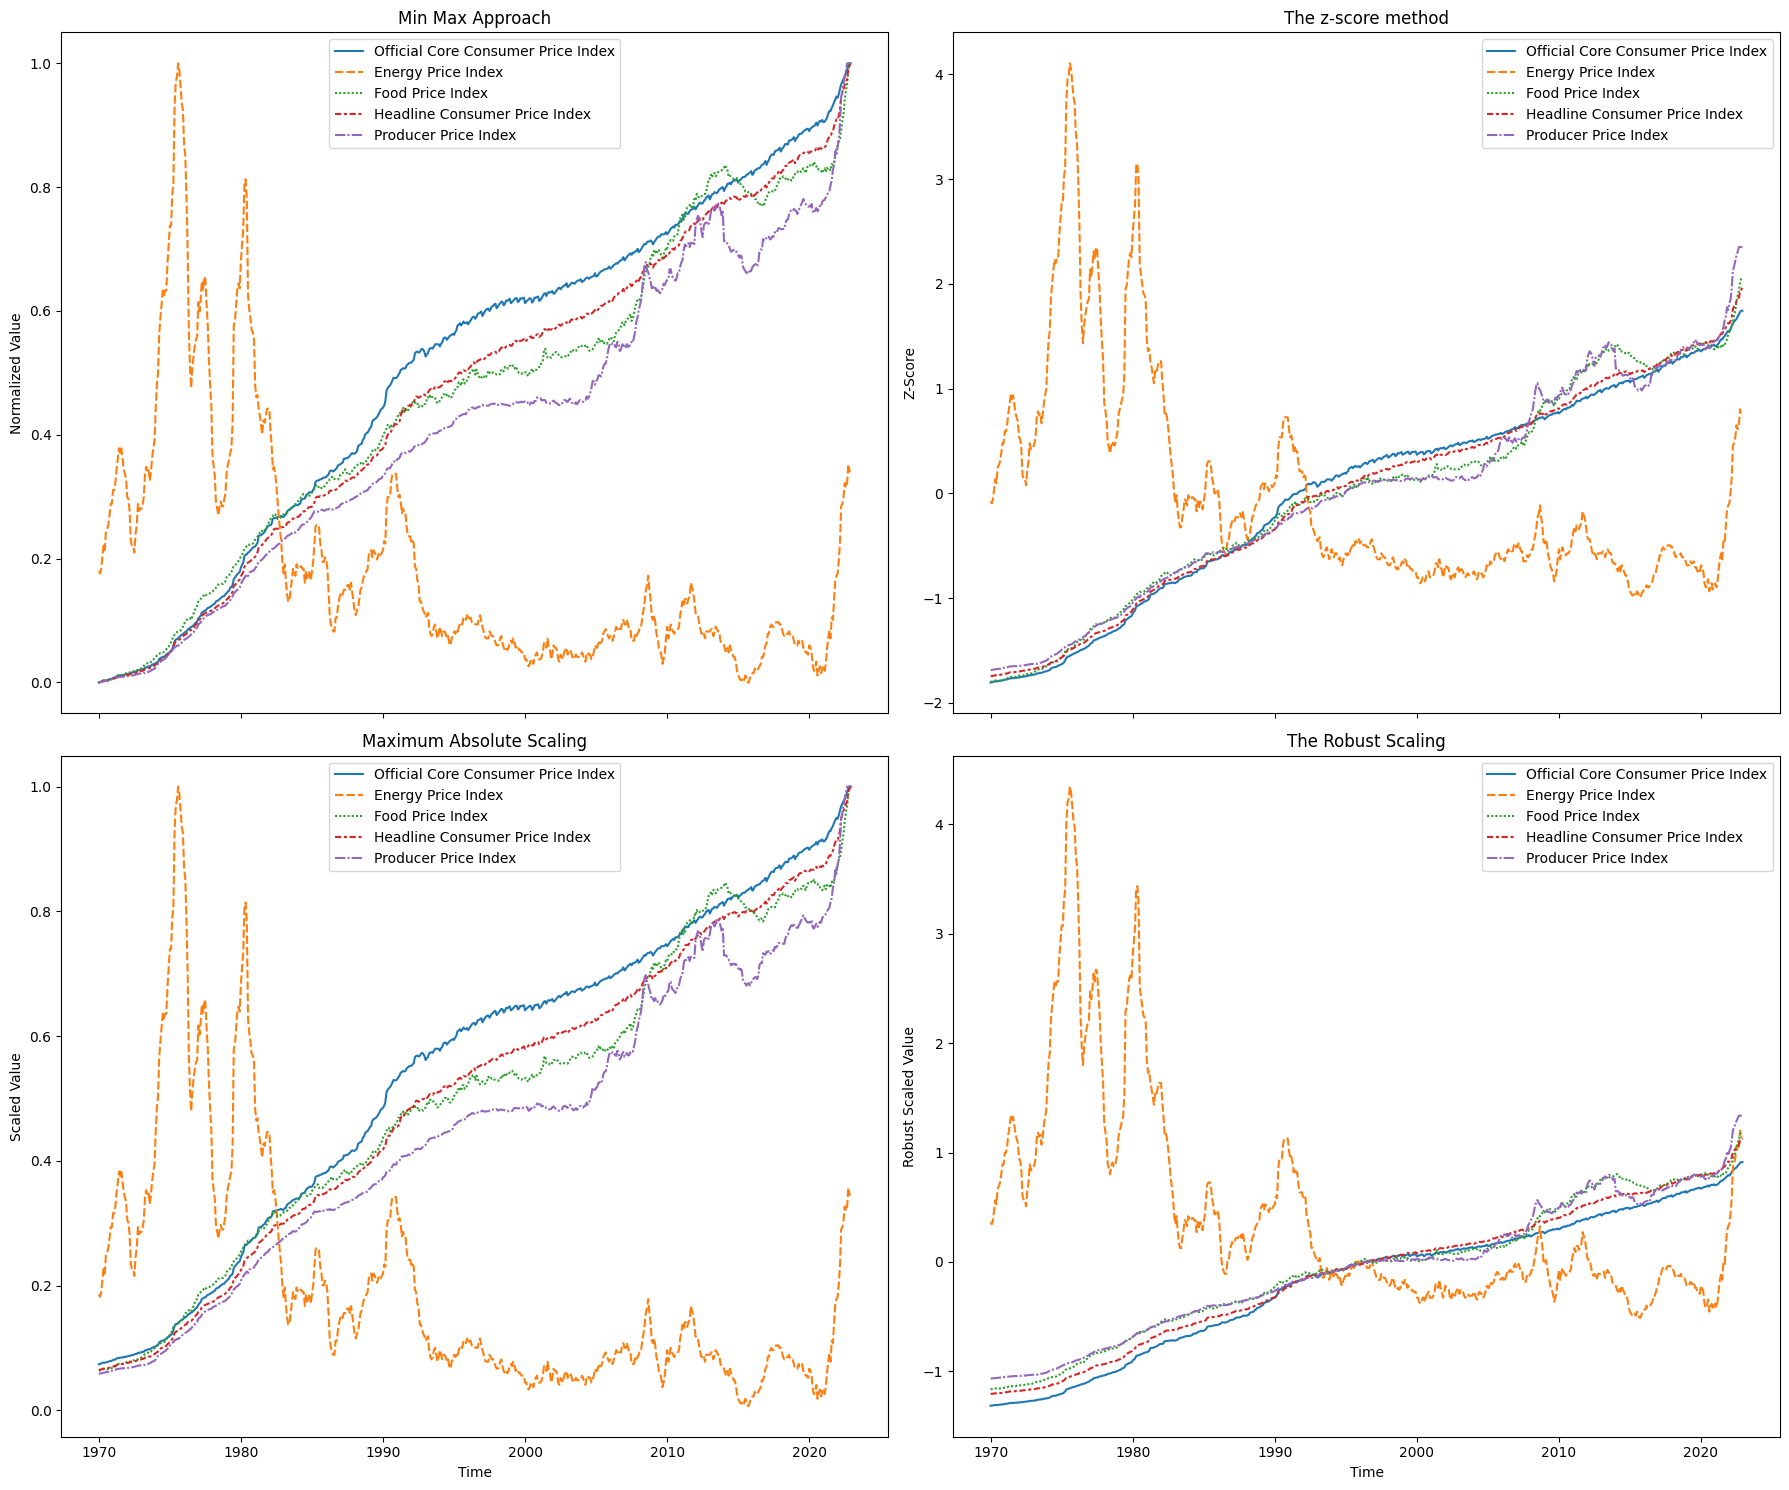

In [9]:
# Create a figure with 2x2 subplots that share the x-axis and not the y-axis
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=False)

# Set the size of the figure
fig.set_size_inches(18, 15)

# Plot a line plot of normalized_df on the top left subplot
sns.lineplot(data=normalized_df, ax=ax[0][0])
ax[0][0].set_xlabel("Time")
ax[0][0].set_ylabel("Normalized Value")

# Plot a line plot of df_zscore on the top right subplot
sns.lineplot(data=df_zscore, ax=ax[0][1])
ax[0][1].set_xlabel("Time")
ax[0][1].set_ylabel("Z-Score")

# Plot a line plot of df_scaled on the bottom left subplot
sns.lineplot(data=df_scaled, ax=ax[1][0])
ax[1][0].set_xlabel("Time")
ax[1][0].set_ylabel("Scaled Value")

# Plot a line plot of df_robust on the bottom right subplot
sns.lineplot(data=df_robust, ax=ax[1][1])
ax[1][1].set_xlabel("Time")
ax[1][1].set_ylabel("Robust Scaled Value")

# Set the titles of the subplots
ax[0, 0].set_title("Min Max Approach")
ax[0, 1].set_title("The z-score method")
ax[1, 0].set_title("Maximum Absolute Scaling")
ax[1, 1].set_title("The Robust Scaling")

# Adjust the spacing between the subplots fit within the figure
fig.tight_layout()


Selected Robust Scaling as normalization method

In [10]:
# Select rows from DataFrame where the index is greater than or equal to '2003-01-01'
dataGreaterthan2003 = df_robust[df_robust.index >= '2003-01-01']
dataGreaterthan2003.head()

Official Core Consumer Price Index  Energy Price Index  \
2003-01-01                            0.107892           -0.290909   
2003-02-01                            0.111888           -0.254545   
2003-03-01                            0.115884           -0.254545   
2003-04-01                            0.121878           -0.272727   
2003-05-01                            0.123876           -0.309091   

            Food Price Index  Headline Consumer Price Index  \
2003-01-01          0.074376                       0.144494   
2003-02-01          0.084564                       0.148480   
2003-03-01          0.090678                       0.154459   
2003-04-01          0.094753                       0.162431   
2003-05-01          0.102904                       0.162431   

            Producer Price Index  
2003-01-01              0.022761  
2003-02-01              0.031588  
2003-03-01              0.035223  
2003-04-01              0.022761  
2003-05-01              0.017395

### Reading Auxillary Data

In [11]:
fuelData = pd.read_csv('fuel.csv').iloc[:,:7]
petrolData = fuelData.iloc[:,1::2]
dieselData = fuelData.iloc[:,2::2]
petrolData.index = fuelData['Weekly Prices time series'].iloc[0::]
dieselData.index = fuelData['Weekly Prices time series'].iloc[0::]
petrolData.rename( columns={i:j for i,j in zip(petrolData.columns, ['Pump Price','Duty Rate', 'Vat']) }, inplace=True)
dieselData.rename( columns={i:j for i,j in zip(dieselData.columns, ['Pump Price','Duty Rate', 'Vat']) }, inplace=True)

petrolData = (petrolData.tail(-2)).apply(pd.to_numeric)
dieselData = dieselData.tail(-2).apply(pd.to_numeric)
dieselData['Total'] = dieselData['Pump Price']+dieselData['Duty Rate']+dieselData['Vat']
petrolData['Total'] = petrolData['Pump Price']+petrolData['Duty Rate']+petrolData['Vat']
dieselData = dieselData.set_index(fuelData['Weekly Prices time series'].iloc[2::])
petrolData = petrolData.set_index(fuelData['Weekly Prices time series'].iloc[2::])

finalFuelData = pd.DataFrame({'Petrol':petrolData['Total'], 'Diesel':dieselData['Total']})
finalFuelData = finalFuelData.set_index(pd.DatetimeIndex(finalFuelData.index))

for column in finalFuelData.columns:
    finalFuelData[column] = (finalFuelData[column] - finalFuelData[column].median())  / (finalFuelData[column].quantile(0.75) - finalFuelData[column].quantile(0.25))
finalFuelData.head()

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Petrol    Diesel
Weekly Prices time series                    
2003-09-06                -1.330570 -1.361393
2003-06-16                -1.333453 -1.363314
2003-06-23                -1.334655 -1.364995
2003-06-30                -1.336337 -1.367637
2003-07-07                -1.338019 -1.368838

Plotting before Resampling Fuel Data

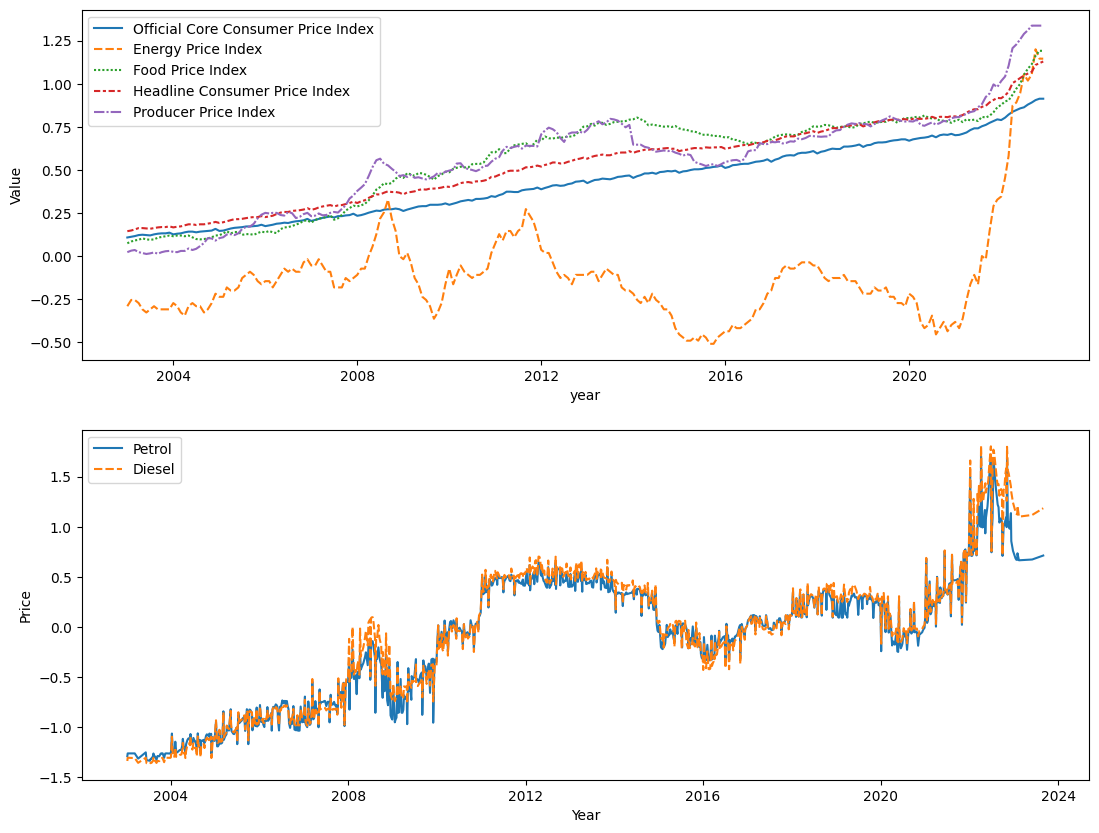

In [12]:
# Create a figure with 2 subplots arranged in 2 rows
fig, axs = plt.subplots(nrows=2, sharex=False, sharey=False)

# Set the size of the figure to be 13 inches wide and 10 inches tall
fig.set_size_inches(13, 10)

# Create a line plot for dataGreaterthan2003 on the first subplot
sns.lineplot(data=dataGreaterthan2003, ax=axs[0])
axs[0].set_xlabel("year")
axs[0].set_ylabel("Value")

# Create a line plot for finalFuelData on the second subplot
sns.lineplot(data=finalFuelData, ax=axs[1])
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Price")

# Display the figure
plt.show()


### Data validation

In [13]:
rawDF.isna().sum()

Official Core Consumer Price Index    1
Energy Price Index                    1
Food Price Index                      1
Headline Consumer Price Index         0
Producer Price Index                  3
dtype: int64

In [14]:
finalFuelData.isna().sum()

Petrol    0
Diesel    0
dtype: int64

In [15]:
# Number of rows
print(dataGreaterthan2003.shape[0])

# Column names
print(dataGreaterthan2003.columns.tolist())

# Data types for each column
print(dataGreaterthan2003.dtypes)


240
['Official Core Consumer Price Index', 'Energy Price Index', 'Food Price Index', 'Headline Consumer Price Index', 'Producer Price Index']
Official Core Consumer Price Index    float64
Energy Price Index                    float64
Food Price Index                      float64
Headline Consumer Price Index         float64
Producer Price Index                  float64
dtype: object


In [16]:
# validating the fill methods and checking number of null values in each column
dataGreaterthan2003.isna().sum()

Official Core Consumer Price Index    0
Energy Price Index                    0
Food Price Index                      0
Headline Consumer Price Index         0
Producer Price Index                  0
dtype: int64

In [17]:
# displaying index values
data_range = dataGreaterthan2003.index.to_list()
data_range[:6]

[Timestamp('2003-01-01 00:00:00'),
 Timestamp('2003-02-01 00:00:00'),
 Timestamp('2003-03-01 00:00:00'),
 Timestamp('2003-04-01 00:00:00'),
 Timestamp('2003-05-01 00:00:00'),
 Timestamp('2003-06-01 00:00:00')]

In [18]:
# get start date and end date for data date range 
start_date = min(dataGreaterthan2003.index.to_list())
end_date = max(dataGreaterthan2003.index.to_list())
print(f'Min date : ', start_date)
print(f'Max date : ', end_date)

Min date :  2003-01-01 00:00:00
Max date :  2022-12-01 00:00:00


In [19]:
# generate all dates month wise from start date to end date
generated_data = pd.date_range(start_date,end_date,freq='MS').to_list()
generated_data[:6]

[Timestamp('2003-01-01 00:00:00', freq='MS'),
 Timestamp('2003-02-01 00:00:00', freq='MS'),
 Timestamp('2003-03-01 00:00:00', freq='MS'),
 Timestamp('2003-04-01 00:00:00', freq='MS'),
 Timestamp('2003-05-01 00:00:00', freq='MS'),
 Timestamp('2003-06-01 00:00:00', freq='MS')]

In [20]:
# checking the availability of every month data in source data
[i for i, j in zip(data_range, generated_data) if i != j]

[]

## Data Exploration

### General EDA

Histogram plots are a handy visualisation tool for investigating the distribution of data in a dataset. They are especially useful for investigating the distribution of continuous variables such as inflation indices.

In the case of inflation indices, a histogram plot can reveal the frequency and distribution of inflation rates across time.

Text(0, 0.5, 'Frequency')

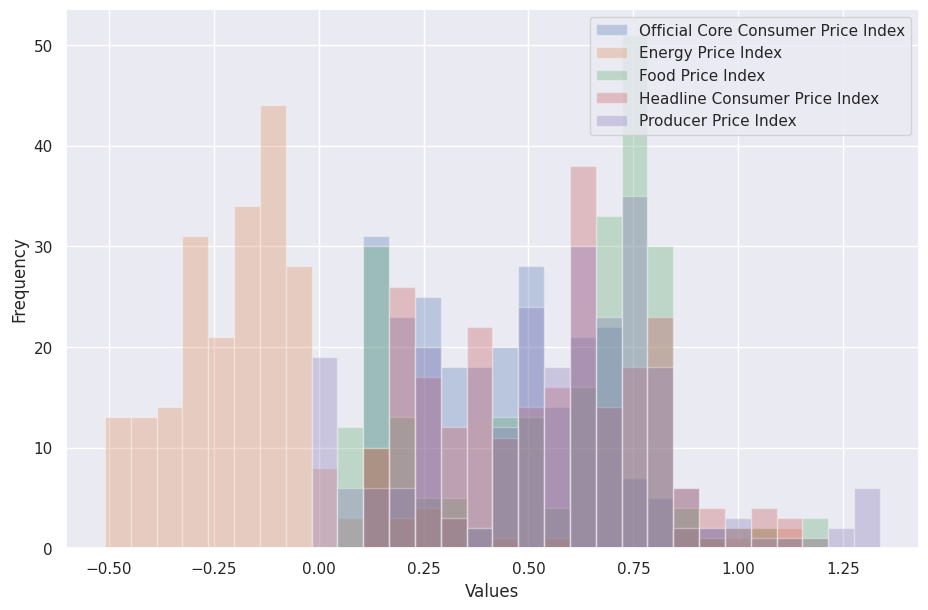

In [21]:
sns.set(rc={'figure.figsize':(11,7)})
ax = dataGreaterthan2003.plot.hist(bins=30, alpha=0.3)
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')

Box plots serve as a valuable means to visually represent and compare the distributions of data. In the case of inflation indices, box plots aid in comprehending the central tendency and variability of each index, along with identifying outliers or extreme values.

This particular index may display a limited range and exhibit minimal outliers, which could imply its stability as a metric of inflation. Furthermore, the median of the index might approximate the 50th percentile of the data, implying that it accurately portrays the general trend of inflation.

**Official Core Consumer Price Index:** This particular index exhibits minimal outliers, which could imply its stability as a metric of inflation. Furthermore, the median of the index might be near the 50th percentile of the data, implying that it accurately portrays the general trend of inflation.

**Energy Price Index:** The Energy Price Index exhibits greater volatility and a wider range of values, including more outliers, than the Official Core Consumer Price Index. The median value of the Energy Price Index is more likely to fall near the lower quartile of the dataset, indicating that energy prices, on average, have been lower than other measures of inflation.

**Food Price Index:** The Food Price Index shares a comparable range and distribution with the Official Core Consumer Price Index, with a marginally higher median value, implying that the rate of escalation of food prices in the economy has been slightly more rapid than that of other prices.

**Headline Consumer Price Index:** This index has a wider range and more outliers than the Official Core Consumer Price Index, suggesting that it is more sensitive to changes in prices for goods and services. The median is closer to the 50th percentile of the data, indicating that this index is a good representation of overall inflation trends.

**Producer Price Index:** This index has a wider range and more outliers than the other indices, indicating that it is more volatile and subject to fluctuations in input costs. The median may be closer to the 75th percentile of the data, indicating that producer prices have been higher overall compared to other inflation measures.



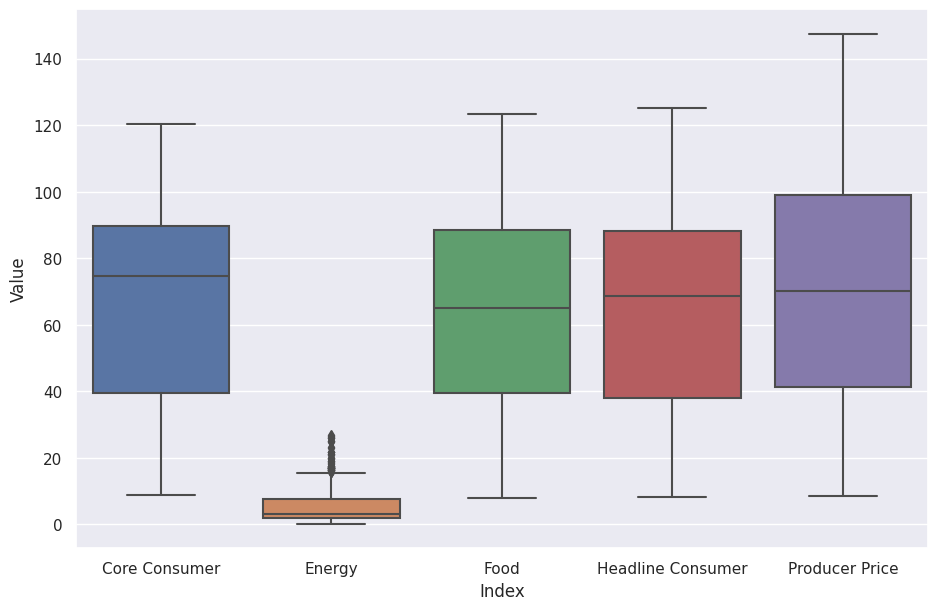

In [22]:
boxDF = df
boxDF.columns = ['Core Consumer', 'Energy', 'Food', 'Headline Consumer', 'Producer Price']
box_plot = sns.boxplot(data=df)
box_plot.set(ylabel=None)
box_plot.set_xlabel('Index')
box_plot.set_ylabel('Value')
label_data = df.columns.to_list()


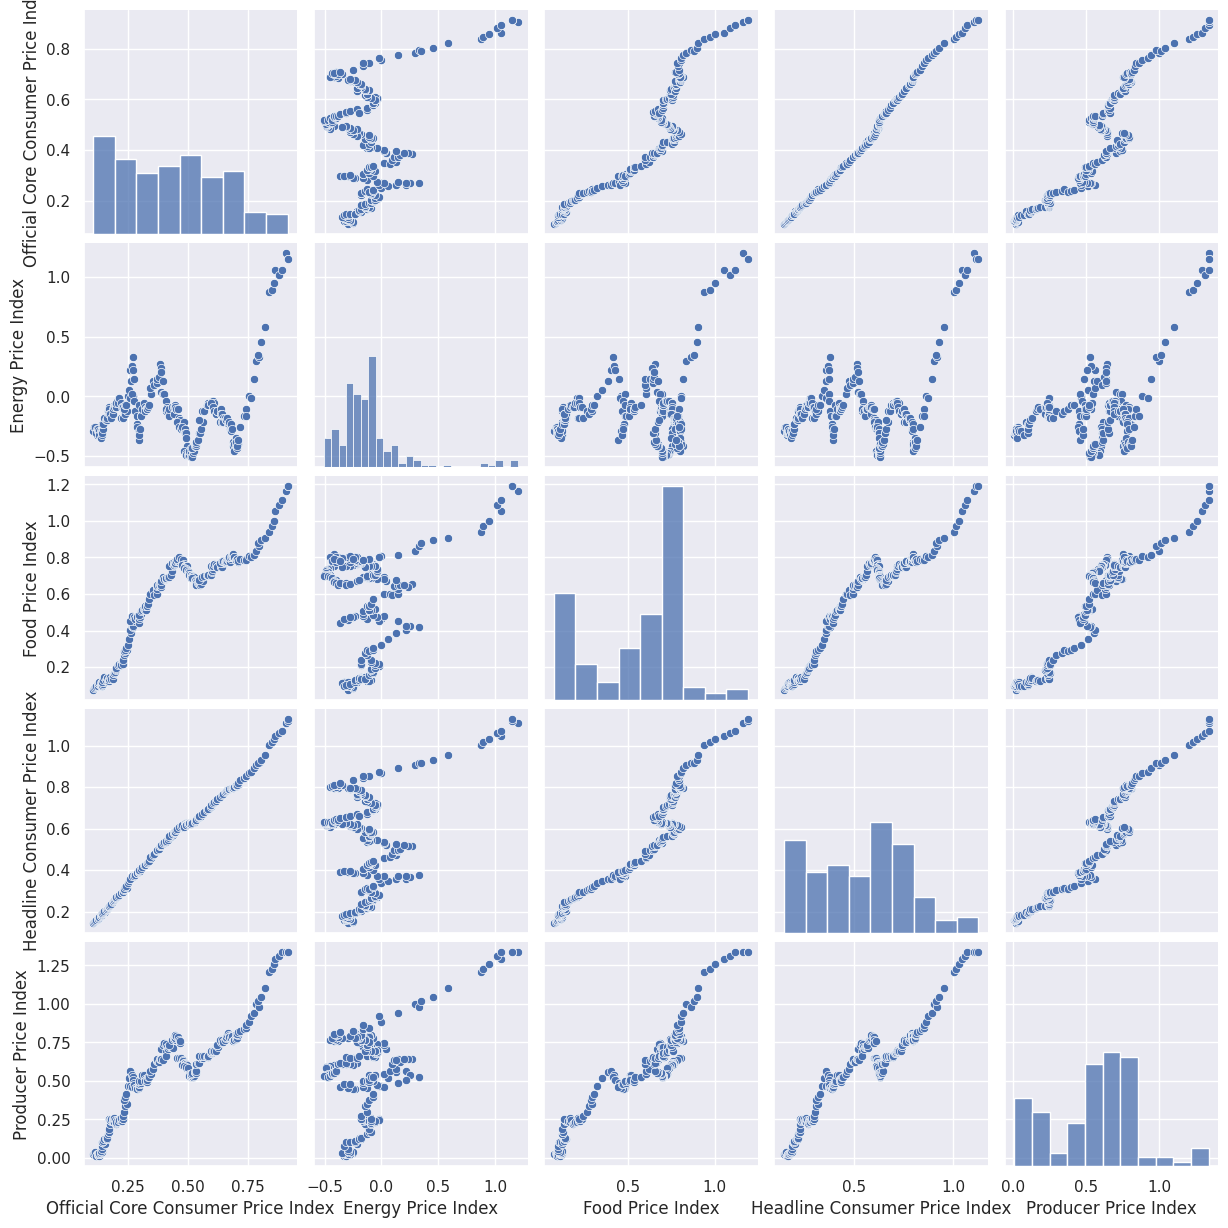

In [23]:
sns.pairplot(dataGreaterthan2003);

Finding Initial Correlation of Co-efficient between fuel prices and Other Variables

In [24]:
#Resampling weekly fuel data into monthly data
resampledFuelData = finalFuelData.resample('MS').mean()
resampledFuelData.head()

Petrol    Diesel
Weekly Prices time series                    
2003-01-01                -1.279750 -1.325488
2003-02-01                      NaN       NaN
2003-03-01                -1.265934 -1.312639
2003-04-01                -1.317835 -1.360432
2003-05-01                      NaN       NaN

In [25]:
print("Before Missing Value==>\n",resampledFuelData.isna().sum())

resampledFuelData = resampledFuelData.fillna(method='bfill').fillna(method='ffill')

print("After handling Missing Value==>\n",resampledFuelData.isna().sum())

Before Missing Value==>
 Petrol    7
Diesel    7
dtype: int64
After handling Missing Value==>
 Petrol    0
Diesel    0
dtype: int64


Plotting after Resampling of fuel data into monthly data

<AxesSubplot: xlabel='Weekly Prices time series'>

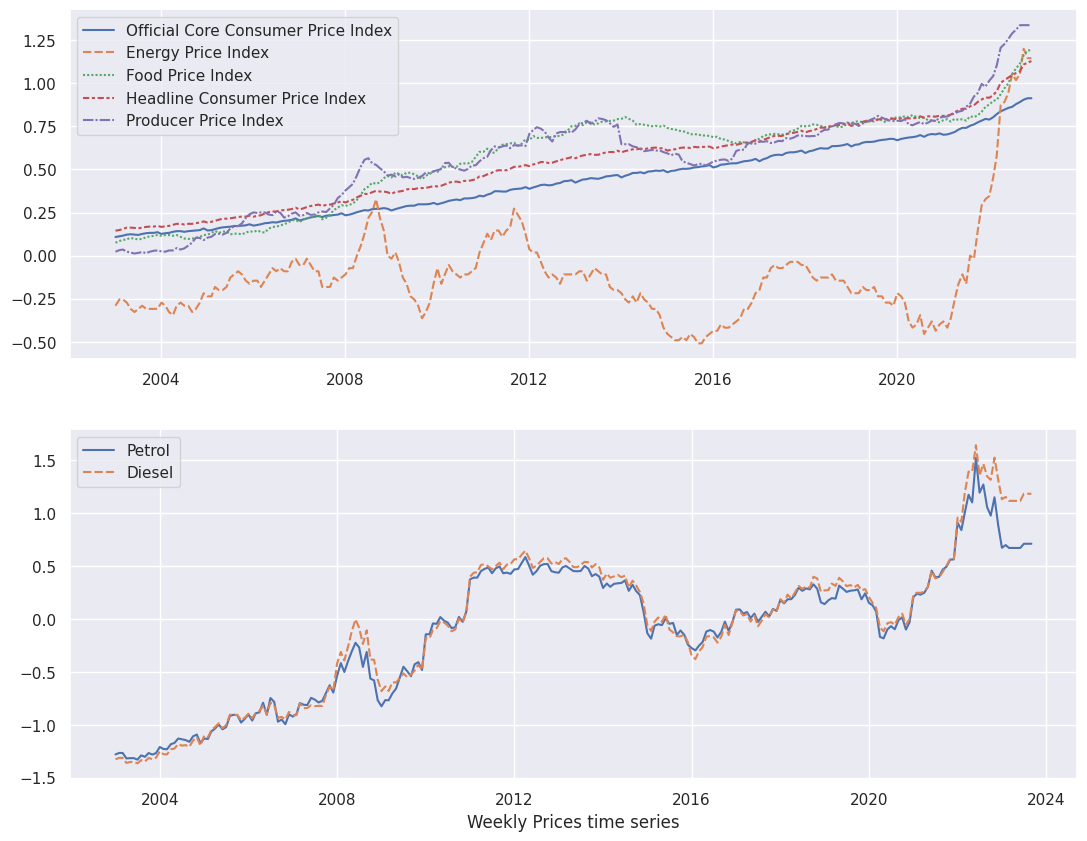

In [26]:
fig, axs = plt.subplots(nrows=2,sharex=False, sharey=False)
fig.set_size_inches(13,10)
sns.lineplot(dataGreaterthan2003, ax=axs[0])
sns.lineplot(resampledFuelData, ax=axs[1])

In [27]:
#making both the dataset of same length
resampledFuelDataLength = resampledFuelData.iloc[:len(dataGreaterthan2003)] 
print(len(resampledFuelDataLength), len(dataGreaterthan2003))

#dataGreaterthan2003Length = dataGreaterthan2003[dataGreaterthan2003.index<=max(resampledFuelData.index)]


240 240


**Summary of the reasons and effect of Fuel Price on producer Price index**

**Transportation costs:** Fuel prices have a direct impact on the cost of transferring raw materials, components, and completed goods from one site to another. When fuel prices rise, so do transportation expenses, potentially raising overall manufacturing costs.

**Energy costs:** Fuel is frequently used to create energy for factories, manufacturing plants, and other manufacturing locations. When fuel prices rise, so do energy expenses, which may have a substantial influence on manufacturing costs.

**Manufacturing costs:** Several industrial processes involve fuel-powered machinery and equipment. When fuel prices rise, so do production expenses, which can have an influence on the cost of things produced.

**Supply chain costs:** Many firms rely on suppliers and vendors for raw materials, components, and other commodities. If these suppliers are located far away and have significant transportation expenses owing to rising fuel prices, the whole manufacturing cost may rise.

**Consumer demand:** Gasoline costs can have an effect on consumer demand for goods. When fuel prices rise, customers may become less likely to buy things that are costly to create, lowering demand and impacting production costs.

### Timeseries Data Visualisations

**Autocorrelation analysis** constitutes a vital aspect of the exploratory data analysis of time series forecasting. The procedure serves to identify underlying patterns and establish randomness within the data. The significance of autocorrelation analysis is particularly noteworthy when considering the application of autoregressive–moving-average (ARMA) models for forecasting, as it allows for the determination of optimal model parameters. The analysis entails an examination of the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.

The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots play a critical role in determining the appropriate order of autoregressive (AR), moving-average (MA), and autoregressive–moving-average (ARMA) models. These plots enable the identification of the optimal lags, which are subsequently used to establish the order of the AR, MA, or ARMA models.

**Note:** In the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots, a blue region is visible that represents the 95% confidence interval. This region serves as an indicator of the significance threshold. Specifically, any values within the blue area are considered statistically close to zero, while any values outside the blue area are statistically non-zero.

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

In [29]:
dataGreaterthan2003 = dataGreaterthan2003.join(resampledFuelData, how = "left")
dataGreaterthan2003

Official Core Consumer Price Index  Energy Price Index  \
2003-01-01                            0.107892           -0.290909   
2003-02-01                            0.111888           -0.254545   
2003-03-01                            0.115884           -0.254545   
2003-04-01                            0.121878           -0.272727   
2003-05-01                            0.123876           -0.309091   
...                                        ...                 ...   
2022-08-01                            0.879121            1.018182   
2022-09-01                            0.891109            1.054545   
2022-10-01                            0.905095            1.200000   
2022-11-01                            0.913087            1.145455   
2022-12-01                            0.913087            1.145455   

            Food Price Index  Headline Consumer Price Index  \
2003-01-01          0.074376                       0.144494   
2003-02-01          0.084564                       0.148480   
2003-03-01          0.090678                       0.154459   
2003-04-01          0.094753                       0.162431   
2003-05-01          0.102904                       0.162431   
...                      ...                            ...   
2022-08-01          1.087112                       1.059292   
2022-09-01          1.113602                       1.069258   
2022-10-01          1.162506                       1.109118   
2022-11-01          1.191034                       1.119083   
2022-12-01          1.191034                       1.129048   

            Producer Price Index    Petrol    Diesel  
2003-01-01              0.022761 -1.279750 -1.325488  
2003-02-01              0.031588 -1.265934 -1.312639  
2003-03-01              0.035223 -1.265934 -1.312639  
2003-04-01              0.022761 -1.317835 -1.360432  
2003-05-01              0.017395 -1.315012 -1.351306  
...                          ...       ...       ...  
2022-08-01              1.310688  1.272001  1.467847  
2022-09-01              1.337170  1.058409  1.348984  
2022-10-01              1.337170  0.978122  1.317154  
2022-11-01              1.337170  1.151174  1.526629  
2022-12-01              1.337170  0.890551  1.320745  

[240 rows x 7 columns]

<AxesSubplot: >

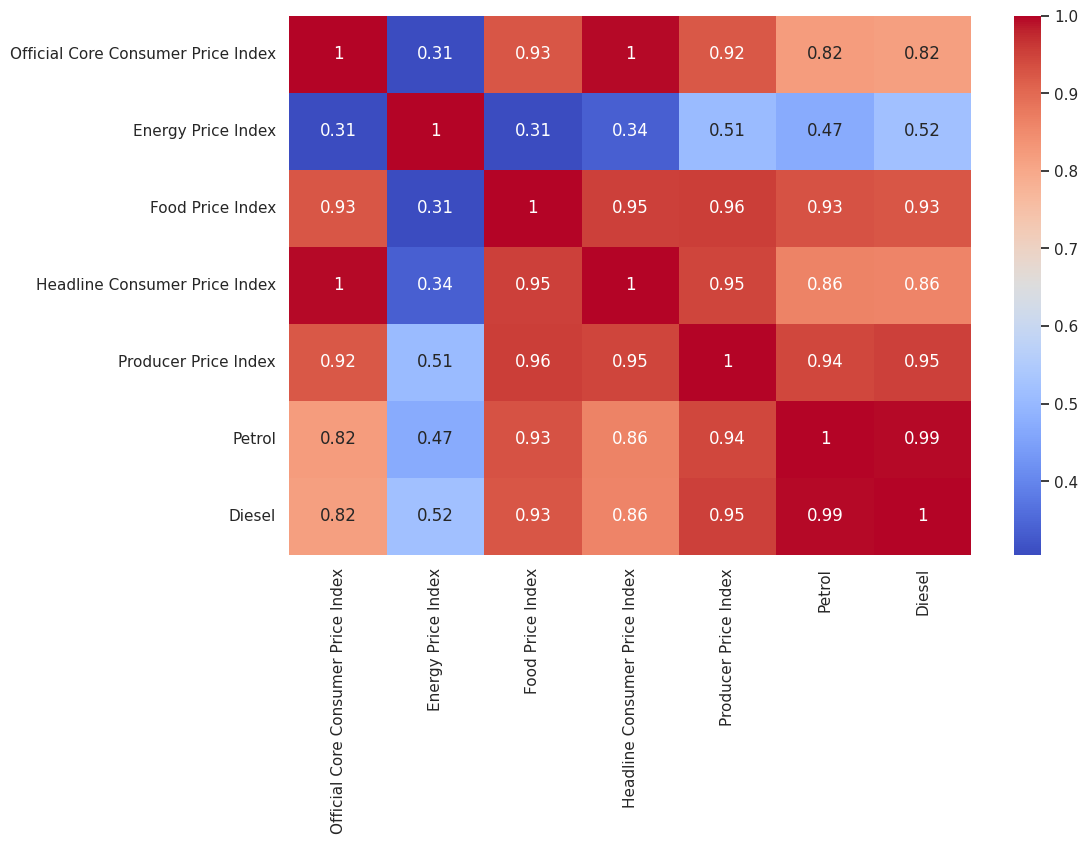

In [30]:
sns.heatmap(dataGreaterthan2003.corr(), cmap='coolwarm', annot=True)

In [31]:
quarterly_data = dataGreaterthan2003.resample('Q').mean()

An **autocorrelation plot** is a graphical technique utilized to explore the association between a time series and its prior values at different time lags. In the context of inflation indices for monthly time series data, an autocorrelation plot demonstrates the degree of correlation between the current month's inflation rate and the inflation rates in prior months up to a specified number of lags.

For example, if we plot the autocorrelation function for monthly inflation data over the past 24 months, the resulting plot will show the correlation between inflation rates in the current month and inflation rates in the previous 1, 2, 3, and so on, up to 24 months.

If the autocorrelation plot reveals a significant correlation at lag 1, indicating a strong positive or negative relationship between the current month's inflation rate and the prior month's rate, it may signify the presence of seasonality, trends, or cycles in the inflation rate. Additionally, if significant correlations appear at higher lags, it suggests the possibility of longer-term trends or cycles in the data.

The correlation between two variables $y_1,y_2$ is defined as:

$$
\rho = \frac{\frac{1}{n} \sum_{i=1}^n [(y_1 - \mu_1 )(y_2 - \mu_2 )]}{\sigma_1 \sigma_2} 
$$

In the context of analyzing a single variable, specifically with respect to auto-correlation, $y_1$ refers to the original series and $y_2$ refers to a lagged version of the series. The sample autocorrelations of order k = 0, 1, 2, ..., can be determined by computing the following expression using the observed series $y_t$ for t=1, 2, ..., n based on the aforementioned definition.

$$
\rho(k) =  \frac{\frac{1}{n-k} \sum_{t=k+1}^{n} (y_t-\bar{y})(y_{t-k}-\bar{y})}{\sqrt{\frac{1}{n} \sum_{t=1}^{n}(y_t-\bar{y})^2} \sqrt{\frac{1}{n-k} \sum_{t=k+1}^{n}(y_{t-k}-\bar{y})^2}}
$$

where $\bar{y}$ is the sample mean of the data.

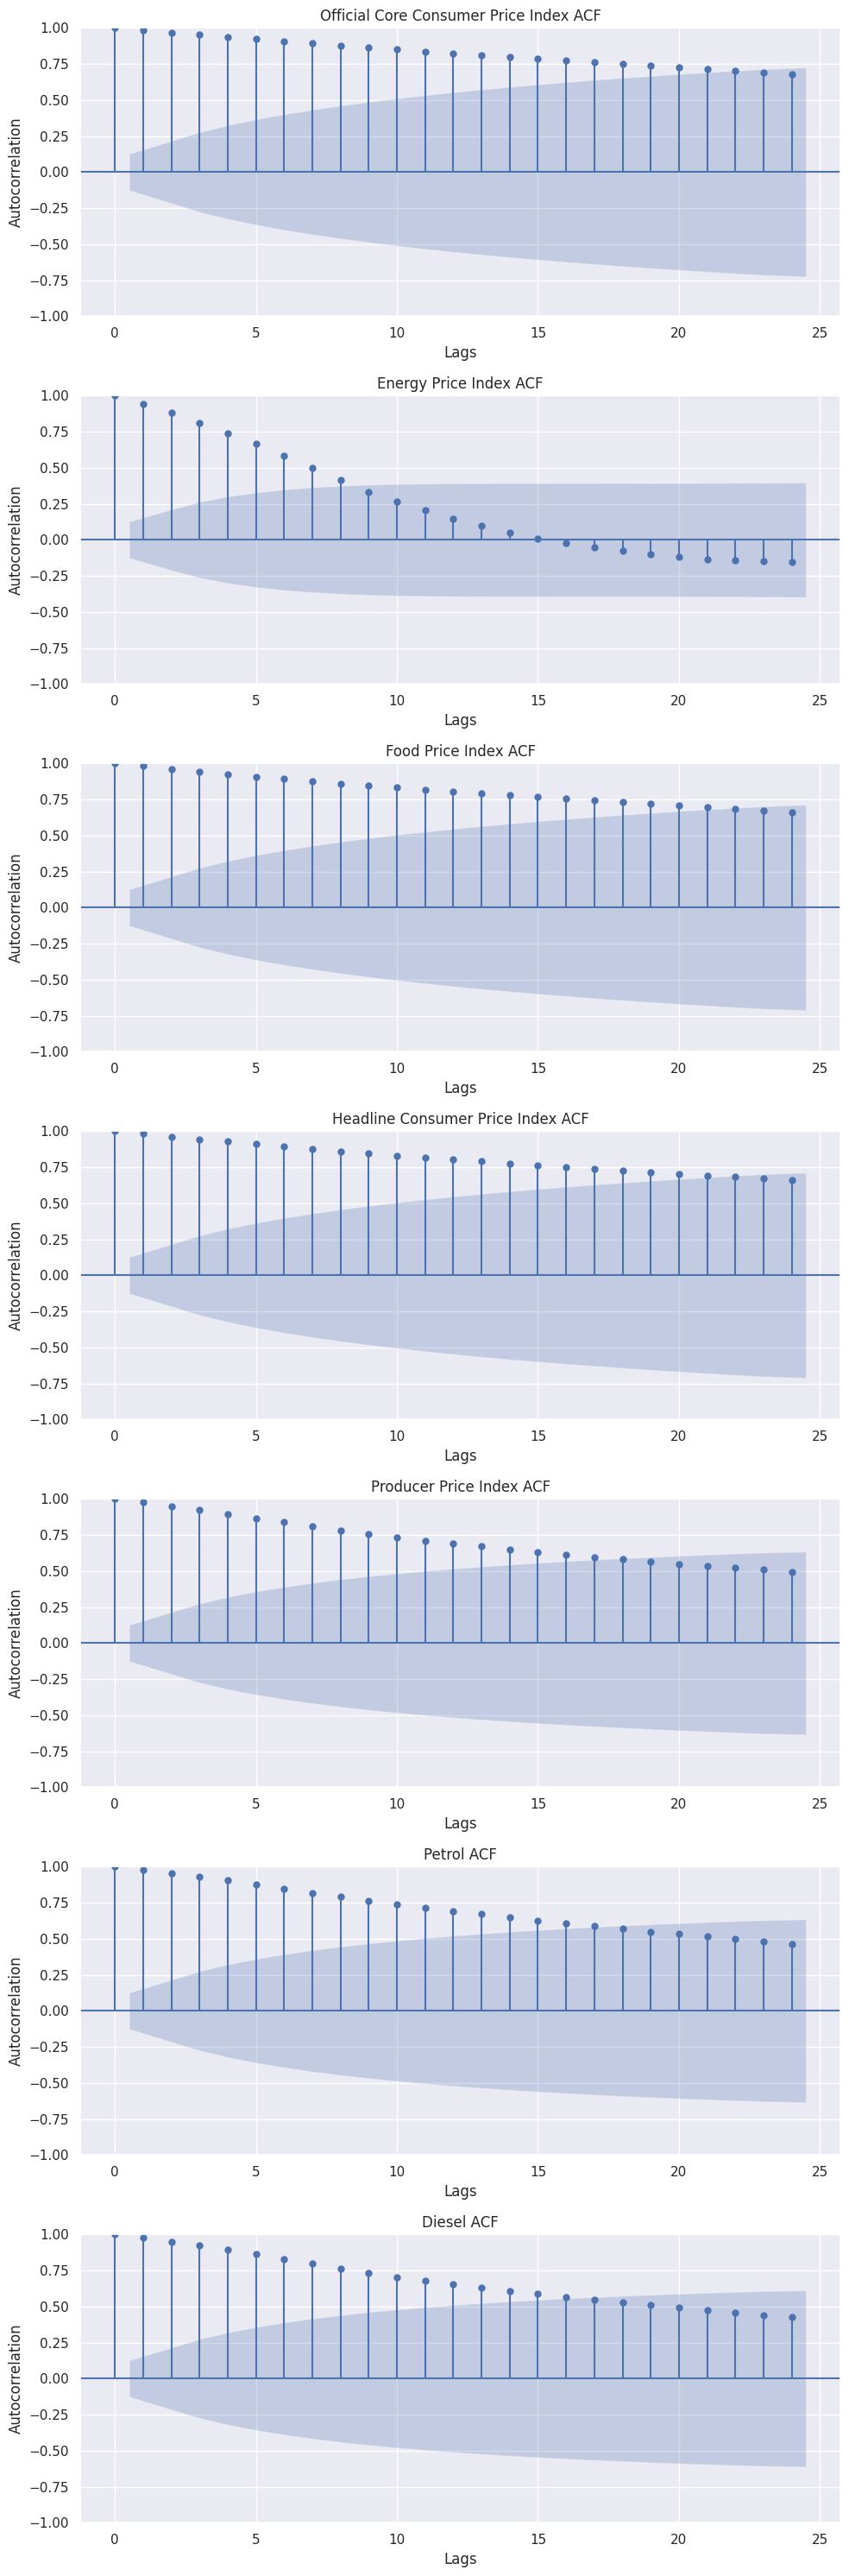

In [32]:
fig,axes = plt.subplots(7,1,figsize=(10,30))

for i,indices in enumerate(['Official Core Consumer Price Index','Energy Price Index','Food Price Index','Headline Consumer Price Index','Producer Price Index','Petrol','Diesel']):
    plot_acf(dataGreaterthan2003[indices],ax=axes[i],title = indices +" ACF")
    axes[i].set_xlabel('Lags')
    axes[i].set_ylabel('Autocorrelation')

fig.tight_layout()
plt.show()


The **partial autocorrelation** plot is a statistical technique employed to analyze the interdependence between a variable's present and past values in time series data, while controlling for other potentially correlated variables.

It contains determining the partial correlation coefficients between the inflation index's current value and its previous lags, adjusted for other intervening lags. The plot provides information about the degree of correlation between the current inflation index and past lags, while accounting for the impact of other intervening factors.

For monthly time series data, the partial autocorrelation plot can assist in detecting the lagged patterns of inflation, including whether there are trends, seasonality, or cyclicality in the data.

In the context of forecasting, it is often the case that time series values from more than one or two previous periods can exert a direct influence on the forecast for the current period's value. Thus, it is necessary to consider a generalized version of the auto-regression equation for forecasting $y_i$, which can be expressed as follows:

$$
y_i= \beta_O + \beta_1  y_{(i-1)} + \beta_2 y_{(i-2)} + \beta_3 y_{(i-3)}... \beta_n y_1
$$

The formula for the Partial Autocorrelation Function (PACF) for k lags can be defined as:

$$
\rho_{(y_i,k)} = \frac{Covariance([y_i \vert y_{(i-1)}, y_{(i-2)}, .... , y_{(i-x+1)}], [y_{(i-k)} \vert y_{(i-1)}, y_{(i-2)}, ... , y_{(i-k+1)}])}{Variance([y_i \vert y_{(i-1)}, y_{(i-2)}, .... , y_{(i-x+1)}]) * Variance([y_{(i-k)} \vert y_{(i-1)}, y_{(i-2)}, ... , y_{(i-k+1)}])}
$$

/root/venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


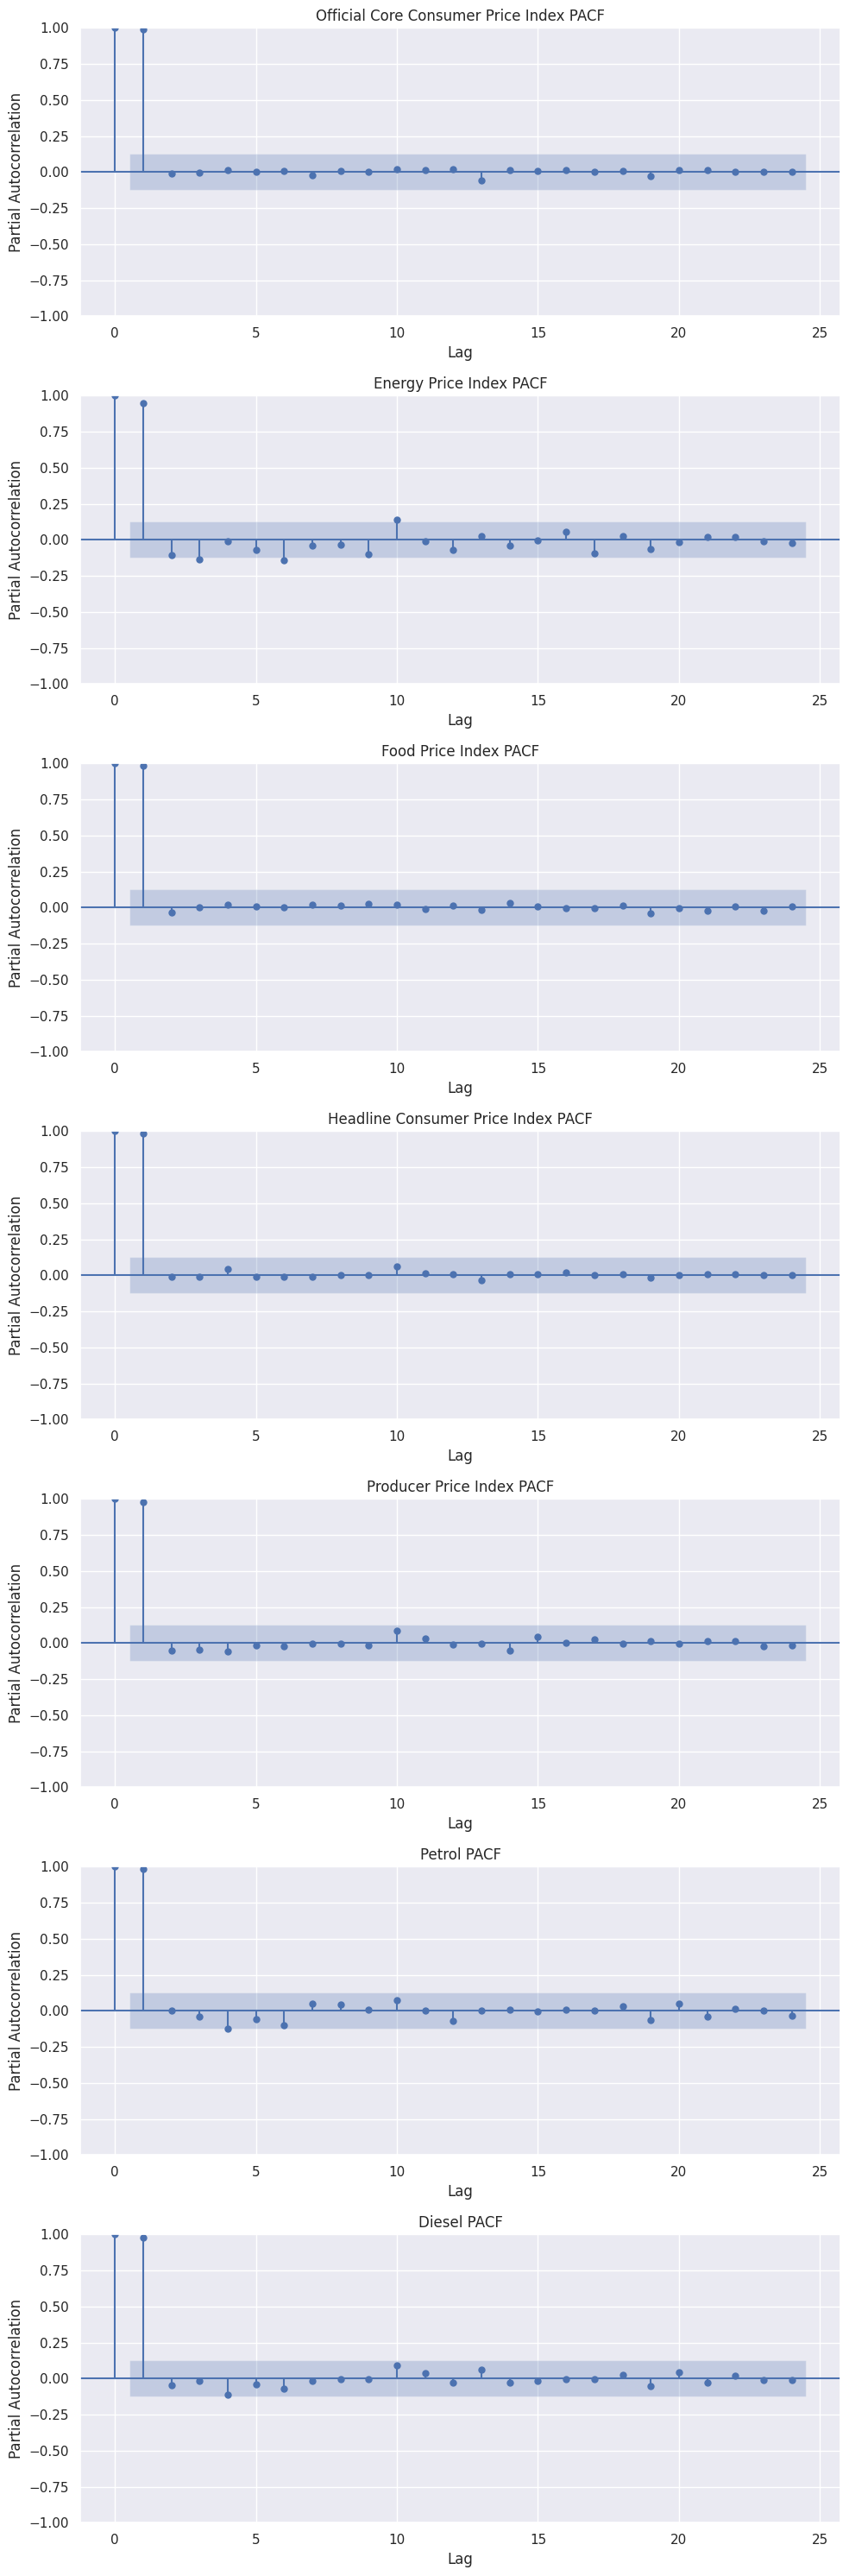

In [33]:
fig,axes = plt.subplots(7,1,figsize=(10,30),)

for i,indices in enumerate(['Official Core Consumer Price Index','Energy Price Index','Food Price Index','Headline Consumer Price Index','Producer Price Index','Petrol','Diesel']):
    plot_pacf(dataGreaterthan2003[indices],ax=axes[i],title = indices +" PACF")
    axes[i].set_xlabel('Lag')
    axes[i].set_ylabel('Partial Autocorrelation')

fig.tight_layout()
plt.show()


The autocorrelation function characterizes the association between a time series and its lagged version. On the other hand, the partial autocorrelation function quantifies the direct linkage by eliminating the impact of intervening lagged values.

The **quarter_plot** and **month_plot** function available in the statsmodels.graphics.tsaplots module, is a statistical tool used to examine the quarterly and monthly seasonality of time series data. This plot is used to visualize the patterns and trends present in the data over quarters and months, providing insights into the seasonal fluctuations of the data.

quarter_plot function plots the mean value of the time series for each quarter. The plot also includes a horizontal line to indicate the overall mean value of the time series. By examining the patterns in the plot, we gain insights into the quarterly trends and seasonal variations of the data.

month_plot function plots the mean value of the time series for each month. The plot also includes a horizontal line to indicate the overall mean value of the time series. By examining the patterns in the plot, we gain insights into the monthly trends and seasonal variations of the data.

These tools are useful for time series data such as inflation data, as it can reveal important seasonal patterns and trends that may be hidden in the raw data. By using the quarter_plot and month_plot function in conjunction with other statistical tools, such as autocorrelation analysis, we can gain a more comprehensive understanding of the underlying dynamics of the time series data.

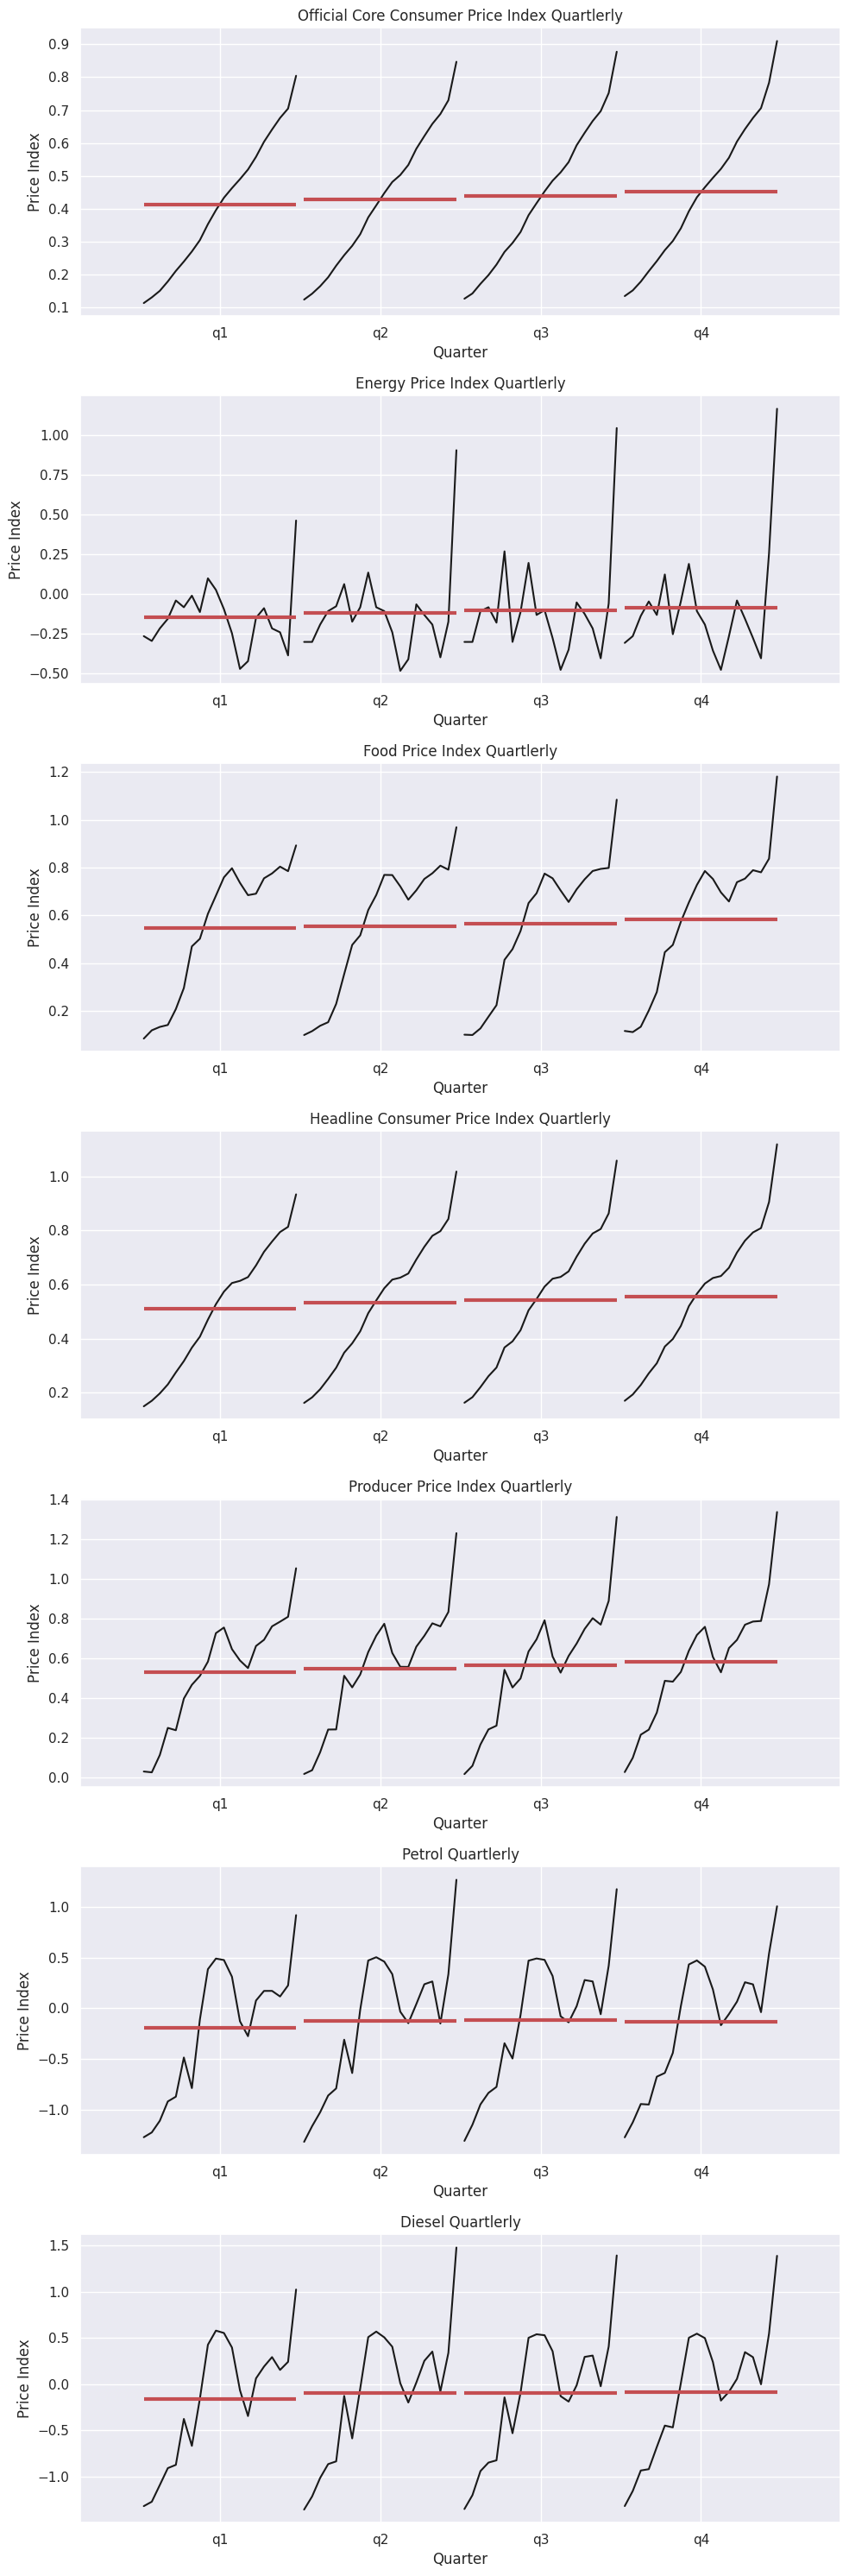

In [34]:
fig, axes = plt.subplots(7, 1, figsize=(10, 30))

for i, indices in enumerate(['Official Core Consumer Price Index', 'Energy Price Index', 'Food Price Index', 'Headline Consumer Price Index', 'Producer Price Index', 'Petrol', 'Diesel']):
    axes[i].title.set_text(indices + " Quartlerly")
    quarter_plot(quarterly_data[indices], ax=axes[i])
    axes[i].set_xlabel('Quarter')
    axes[i].set_ylabel('Price Index')

fig.tight_layout()
plt.show()


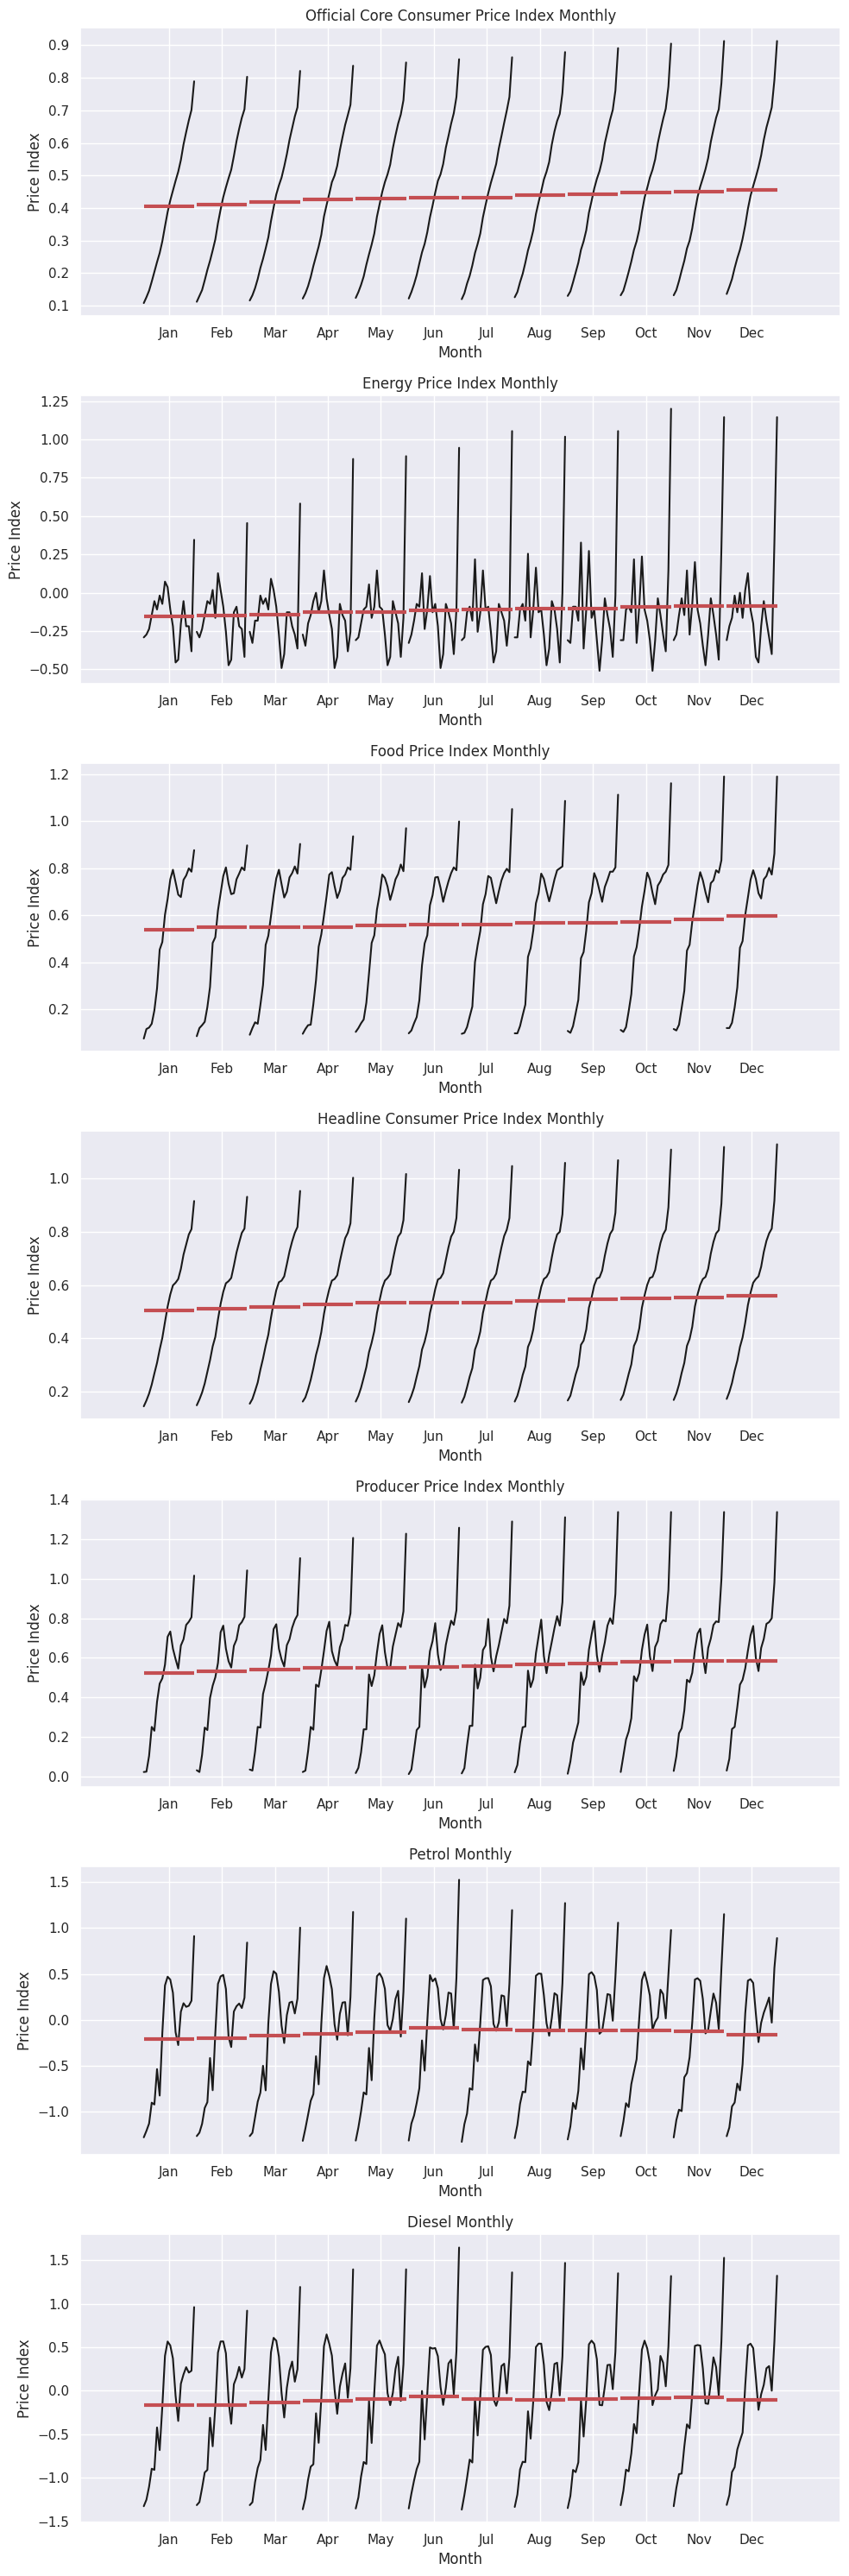

In [35]:
fig,axes = plt.subplots(7,1,figsize=(10,30),)

for i,indices in enumerate(['Official Core Consumer Price Index','Energy Price Index','Food Price Index','Headline Consumer Price Index','Producer Price Index','Petrol','Diesel']):
    axes[i].title.set_text(indices + " Monthly")
    month_plot(dataGreaterthan2003[indices],ax=axes[i])
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Price Index')

fig.tight_layout()
plt.show()

### Time Series Decomposition

The seasonal_decompose function in the statsmodels.graphics.tsaplots.seasonal module, is a statistical tool used to decompose time series data into its constituent seasonal, trend, and residual components.

When applied to inflation data, the seasonal_decompose function can help analysts to identify the underlying patterns and trends in inflation rates over time. 


The function decomposes the inflation time series into three distinct components: 
<ol><li>seasonal component: represents systematic fluctuations in the inflation rate that recur at regular intervals.
<li>trend component: indicates the overall direction or long-term movement of the inflation rate.
<li>residual component: represents random variation or noise in the data that cannot be accounted for by the seasonal or trend components.</ol>

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

Text(0, 0.5, 'Residuals')

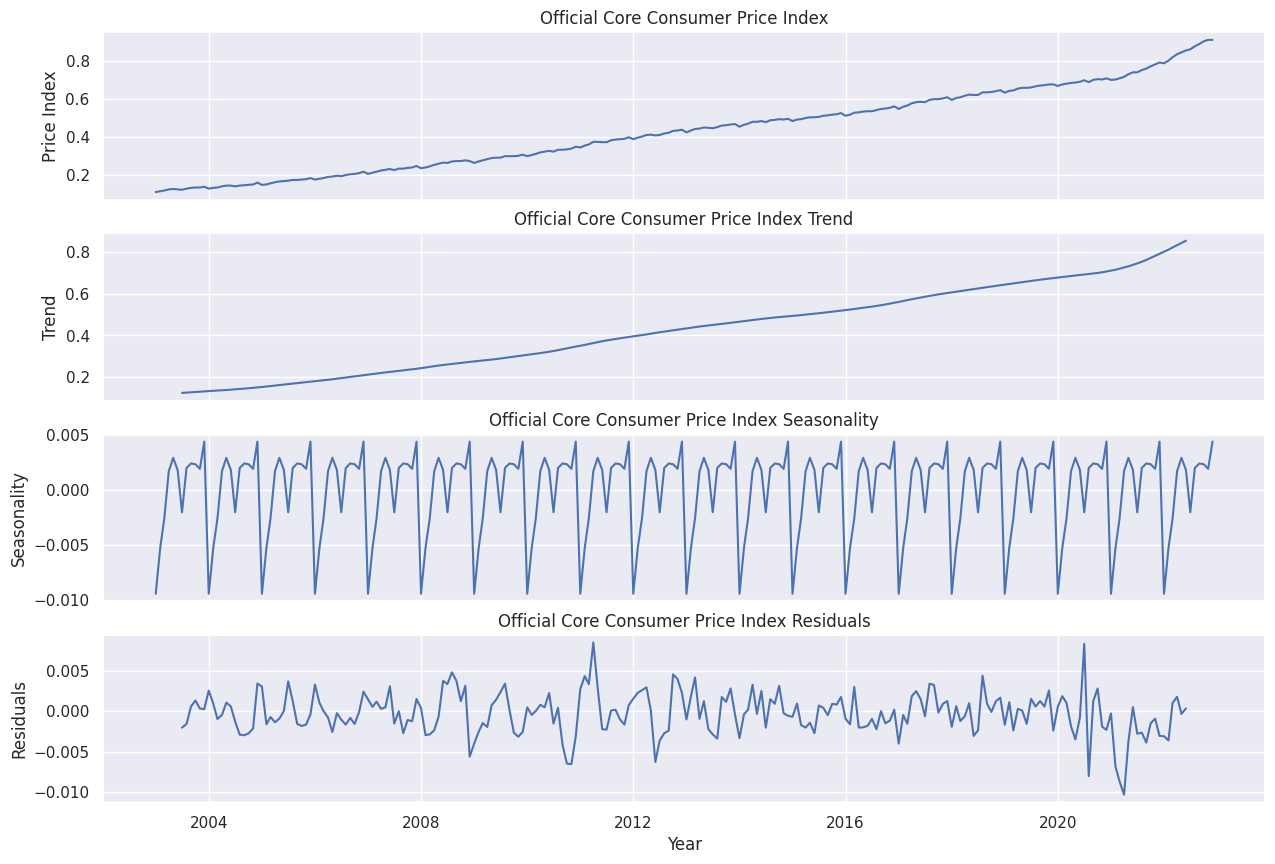

In [37]:
time_series_decomposition_occpi = seasonal_decompose(x=dataGreaterthan2003['Official Core Consumer Price Index'], model='additive', period=12)
trend_decomposition_occpi = time_series_decomposition_occpi.trend
seasonal_decomposition_occpi = time_series_decomposition_occpi.seasonal
residual_decomposition_occpi = time_series_decomposition_occpi.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(dataGreaterthan2003['Official Core Consumer Price Index'], label='Original')
axes[0].title.set_text('Official Core Consumer Price Index')
axes[0].set_ylabel('Price Index')

axes[1].plot(trend_decomposition_occpi, label='Trend')
axes[1].title.set_text('Official Core Consumer Price Index Trend')
axes[1].set_ylabel('Trend')

axes[2].plot(seasonal_decomposition_occpi, label='Seasonality')
axes[2].title.set_text('Official Core Consumer Price Index Seasonality')
axes[2].set_ylabel('Seasonality')

axes[3].plot(residual_decomposition_occpi, label='Residuals')
axes[3].title.set_text('Official Core Consumer Price Index Residuals')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Residuals')


Text(0, 0.5, 'Residuals')

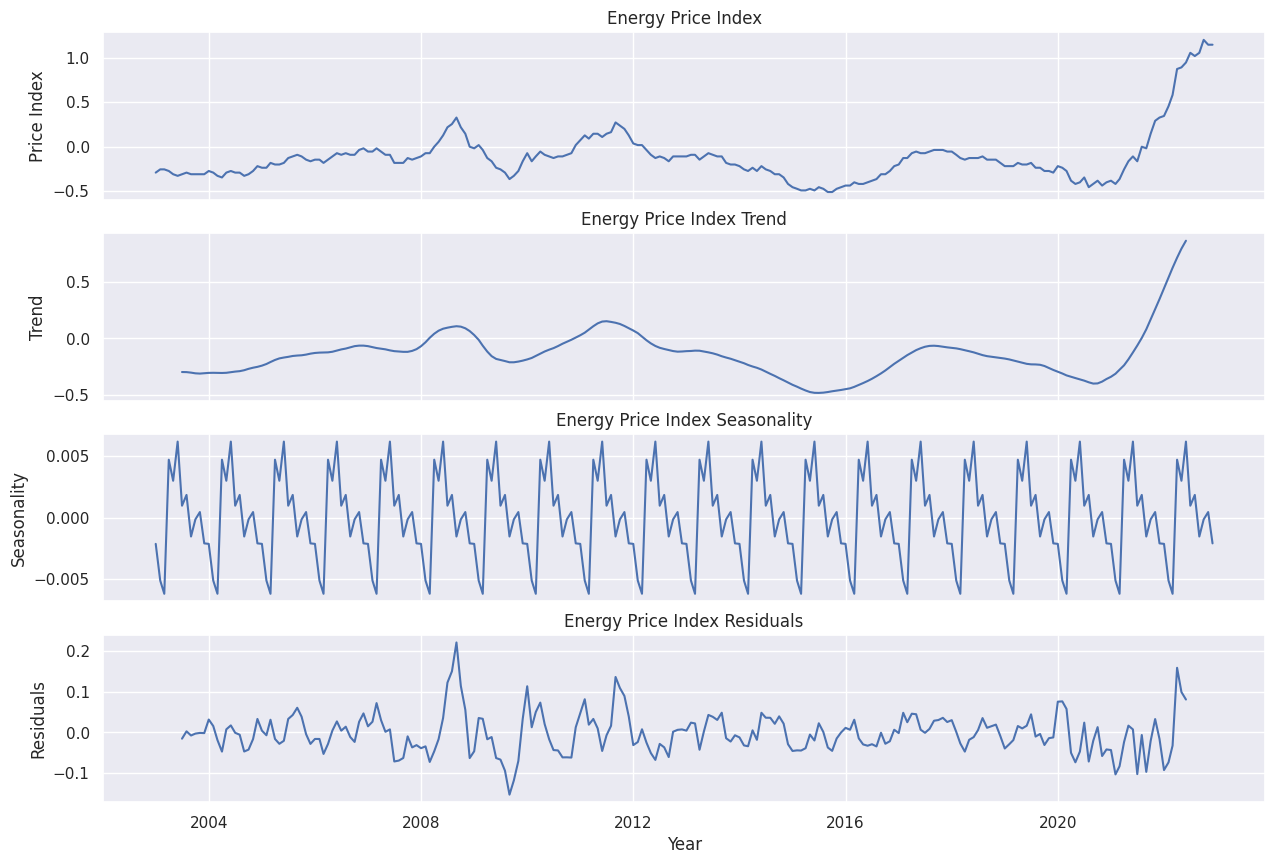

In [38]:
time_series_decomposition_epi = seasonal_decompose(x=dataGreaterthan2003['Energy Price Index'], model='additive', period=12)
trend_decomposition_epi = time_series_decomposition_epi.trend
seasonal_decomposition_epi = time_series_decomposition_epi.seasonal
residual_decomposition_epi = time_series_decomposition_epi.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(dataGreaterthan2003['Energy Price Index'], label='Original')
axes[0].title.set_text('Energy Price Index')

axes[1].plot(trend_decomposition_epi, label='Trend')
axes[1].title.set_text('Energy Price Index Trend')

axes[2].plot(seasonal_decomposition_epi, label='Seasonality')
axes[2].title.set_text('Energy Price Index Seasonality')

axes[3].plot(residual_decomposition_epi, label='Residuals')
axes[3].title.set_text('Energy Price Index Residuals')

axes[0].set_ylabel('Price Index')
axes[1].set_ylabel('Trend')
axes[2].set_ylabel('Seasonality')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Residuals')

Text(0, 0.5, 'Residuals')

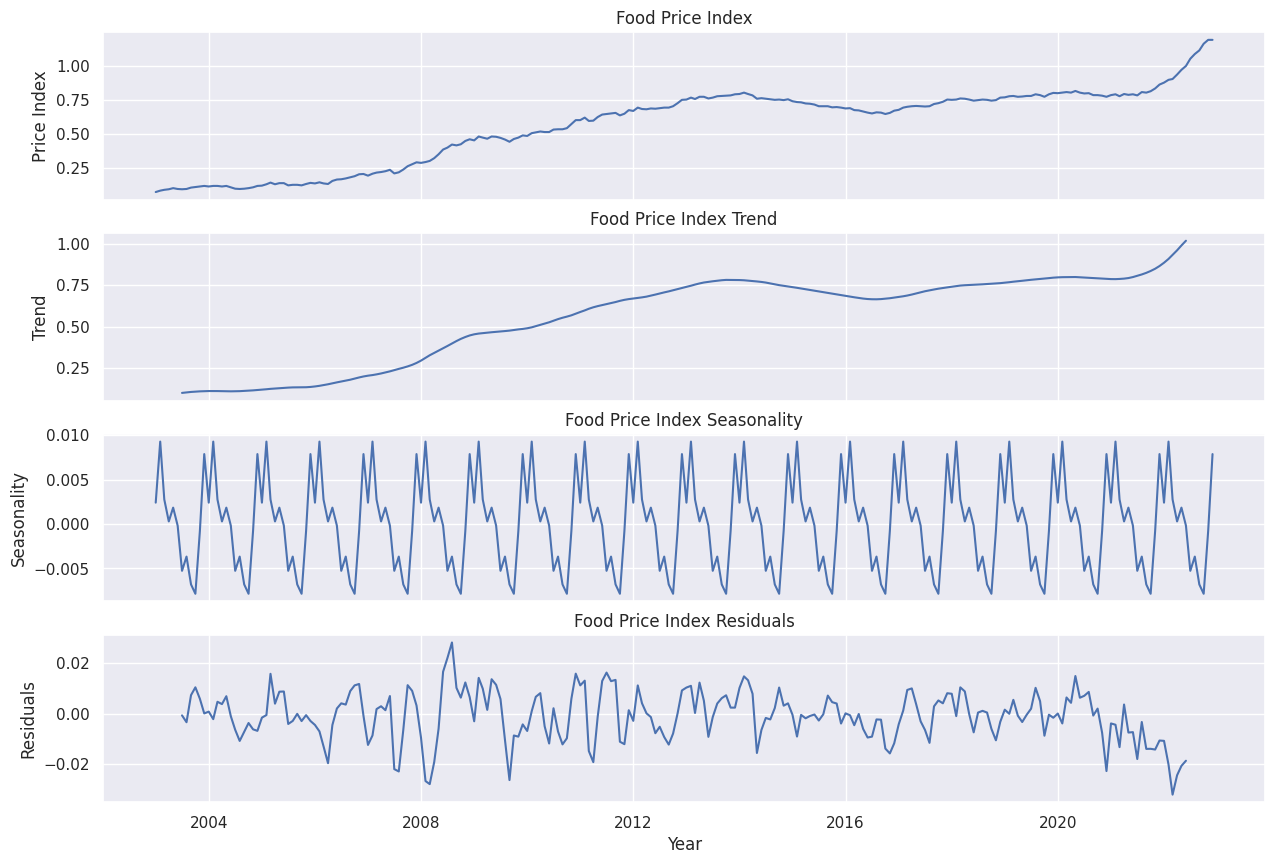

In [39]:
time_series_decomposition_fpi = seasonal_decompose(x=dataGreaterthan2003['Food Price Index'], model='additive', period=12)
trend_decomposition_fpi = time_series_decomposition_fpi.trend
seasonal_decomposition_fpi = time_series_decomposition_fpi.seasonal
residual_decomposition_fpi = time_series_decomposition_fpi.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(dataGreaterthan2003['Food Price Index'], label='Original')
axes[0].title.set_text('Food Price Index')

axes[1].plot(trend_decomposition_fpi, label='Trend')
axes[1].title.set_text('Food Price Index Trend')

axes[2].plot(seasonal_decomposition_fpi, label='Seasonality')
axes[2].title.set_text('Food Price Index Seasonality')

axes[3].plot(residual_decomposition_fpi, label='Residuals')
axes[3].title.set_text('Food Price Index Residuals')

axes[0].set_ylabel('Price Index')
axes[1].set_ylabel('Trend')
axes[2].set_ylabel('Seasonality')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Residuals')

Text(0, 0.5, 'Residuals')

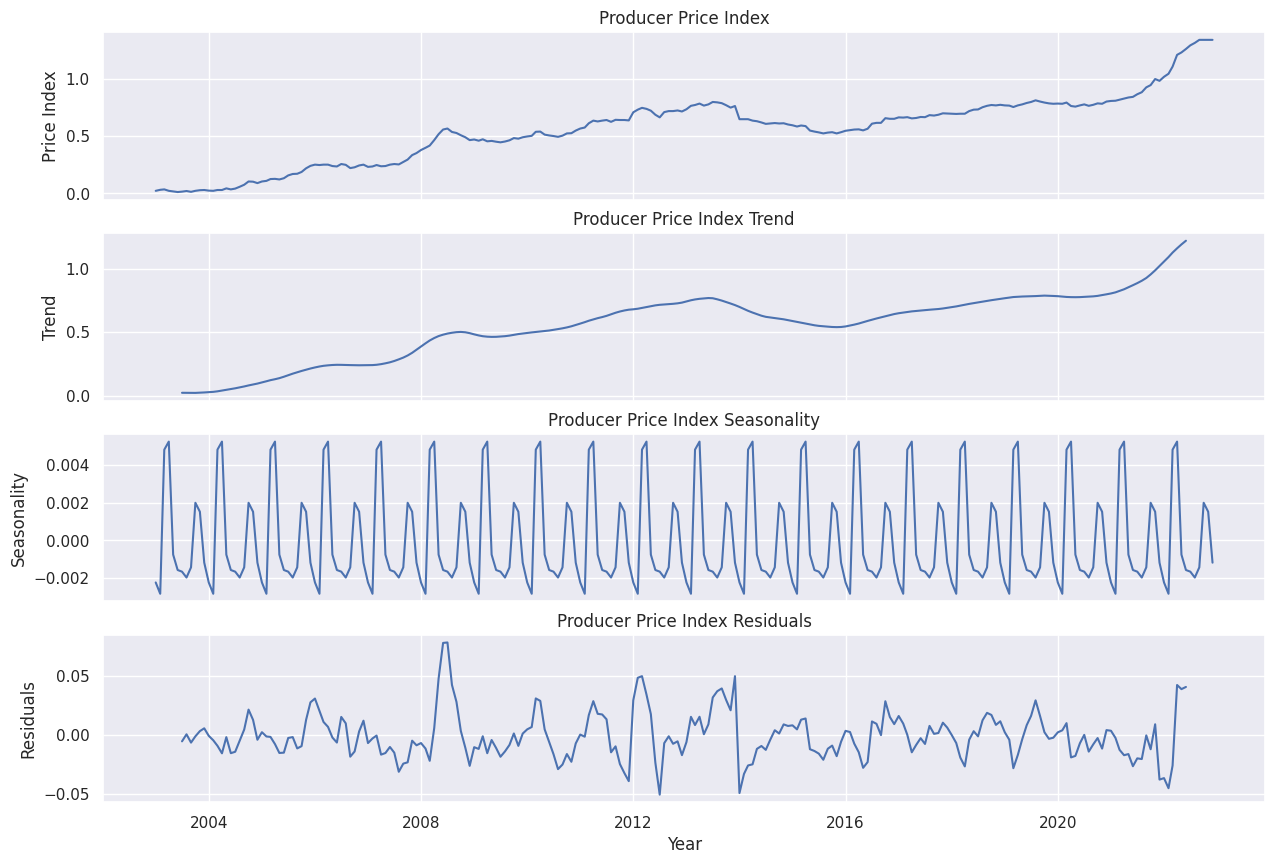

In [40]:
time_series_decomposition_ppi = seasonal_decompose(x=dataGreaterthan2003['Producer Price Index'], model='additive', period=12)
trend_decomposition_ppi = time_series_decomposition_ppi.trend
seasonal_decomposition_ppi = time_series_decomposition_ppi.seasonal
residual_decomposition_ppi = time_series_decomposition_ppi.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(dataGreaterthan2003['Producer Price Index'], label='Original')
axes[0].title.set_text('Producer Price Index')

axes[1].plot(trend_decomposition_ppi, label='Trend')
axes[1].title.set_text('Producer Price Index Trend')

axes[2].plot(seasonal_decomposition_ppi, label='Seasonality')
axes[2].title.set_text('Producer Price Index Seasonality')

axes[3].plot(residual_decomposition_ppi, label='Residuals')
axes[3].title.set_text('Producer Price Index Residuals')

axes[0].set_ylabel('Price Index')
axes[1].set_ylabel('Trend')
axes[2].set_ylabel('Seasonality')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Residuals')

Text(0, 0.5, 'Residuals')

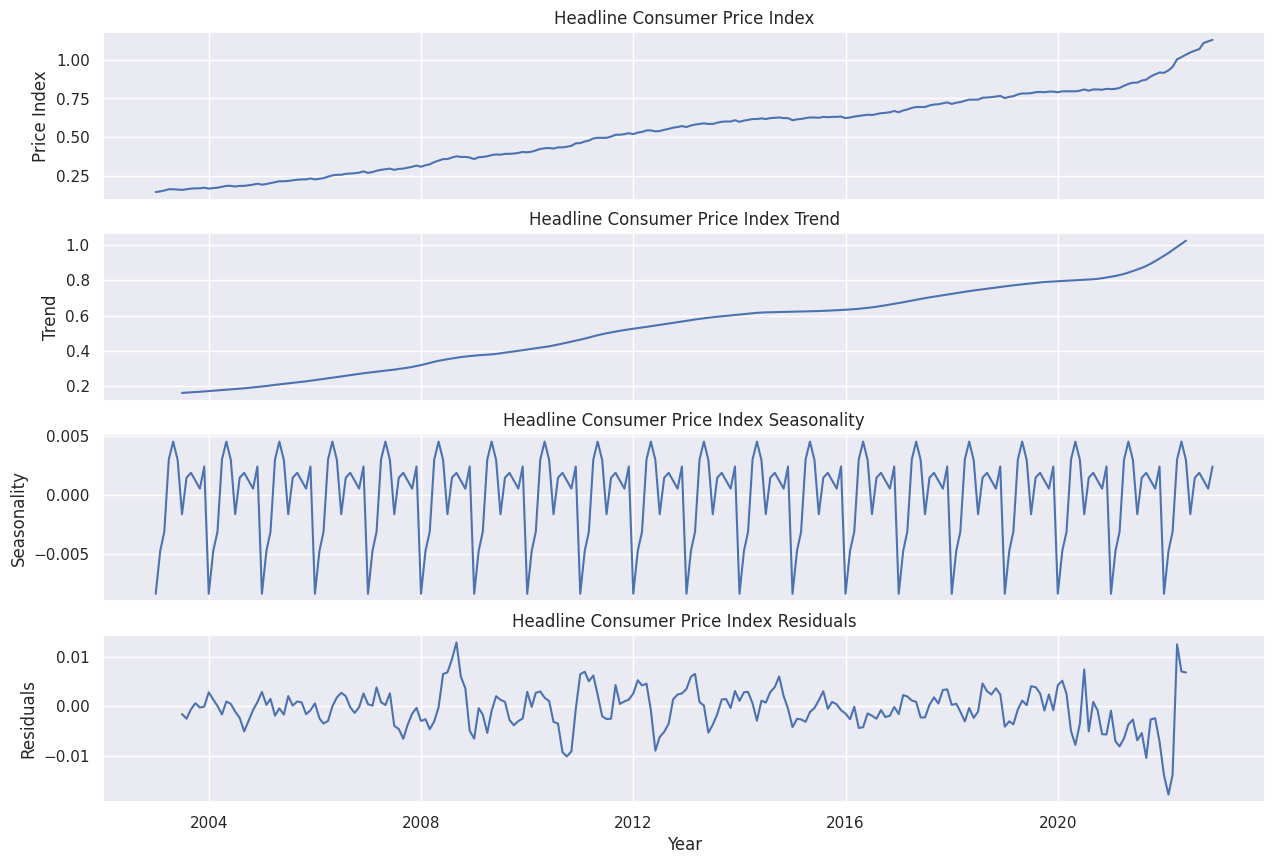

In [41]:
time_series_decomposition_hcpi = seasonal_decompose(x=dataGreaterthan2003['Headline Consumer Price Index'], model='additive', period=12)
trend_decomposition_hcpi = time_series_decomposition_hcpi.trend
seasonal_decomposition_hcpi = time_series_decomposition_hcpi.seasonal
residual_decomposition_hcpi = time_series_decomposition_hcpi.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(dataGreaterthan2003['Headline Consumer Price Index'], label='Original')
axes[0].title.set_text('Headline Consumer Price Index')

axes[1].plot(trend_decomposition_hcpi, label='Trend')
axes[1].title.set_text('Headline Consumer Price Index Trend')

axes[2].plot(seasonal_decomposition_hcpi, label='Seasonality')
axes[2].title.set_text('Headline Consumer Price Index Seasonality')

axes[3].plot(residual_decomposition_hcpi, label='Residuals')
axes[3].title.set_text('Headline Consumer Price Index Residuals')

axes[0].set_ylabel('Price Index')
axes[1].set_ylabel('Trend')
axes[2].set_ylabel('Seasonality')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Residuals')

Text(0, 0.5, 'Residuals')

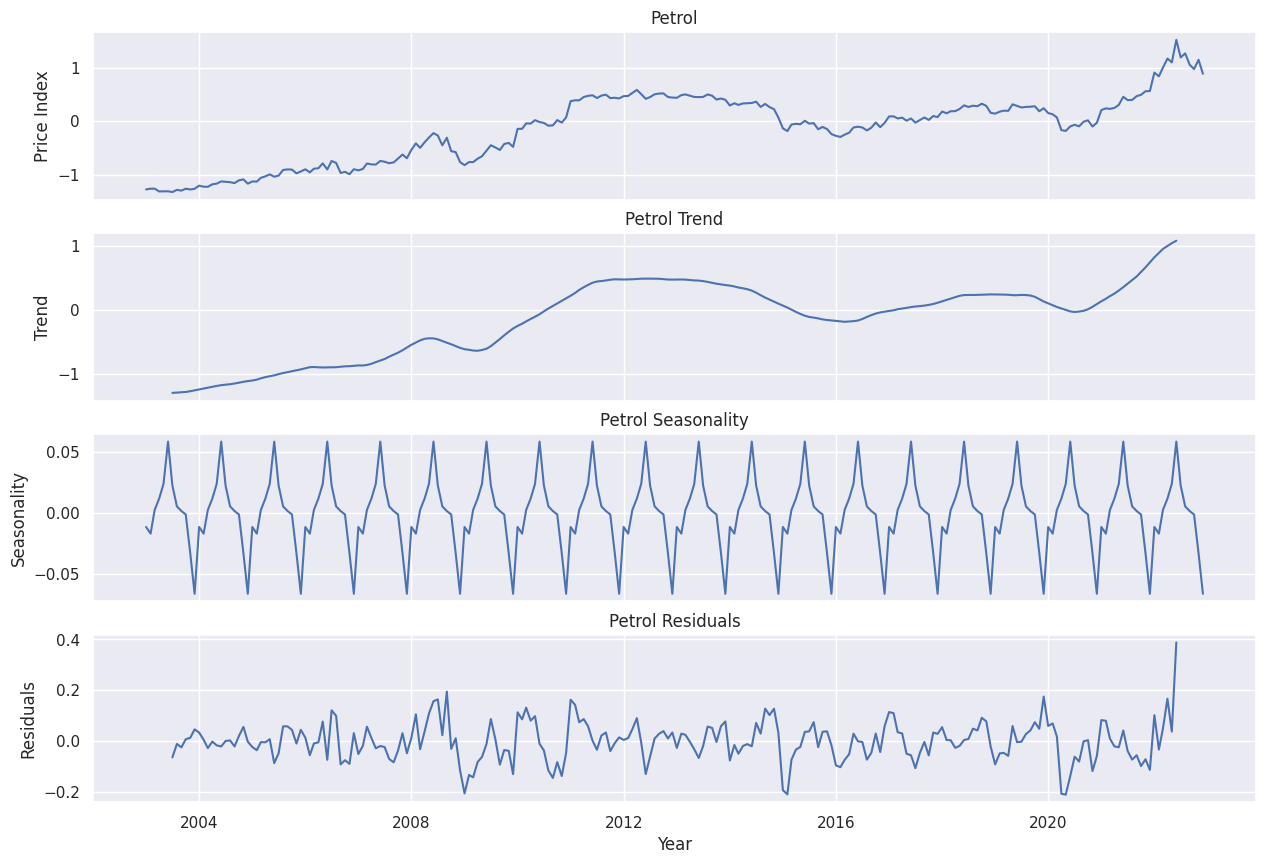

In [42]:
time_series_decomposition_petrol = seasonal_decompose(x=dataGreaterthan2003['Petrol'], model='additive', period=12)
trend_decomposition_petrol = time_series_decomposition_petrol.trend
seasonal_decomposition_petrol = time_series_decomposition_petrol.seasonal
residual_decomposition_petrol = time_series_decomposition_petrol.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(dataGreaterthan2003['Petrol'], label='Original')
axes[0].title.set_text('Petrol')

axes[1].plot(trend_decomposition_petrol, label='Trend')
axes[1].title.set_text('Petrol Trend')

axes[2].plot(seasonal_decomposition_petrol, label='Seasonality')
axes[2].title.set_text('Petrol Seasonality')

axes[3].plot(residual_decomposition_petrol, label='Residuals')
axes[3].title.set_text('Petrol Residuals')

axes[0].set_ylabel('Price Index')
axes[1].set_ylabel('Trend')
axes[2].set_ylabel('Seasonality')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Residuals')

Text(0, 0.5, 'Residuals')

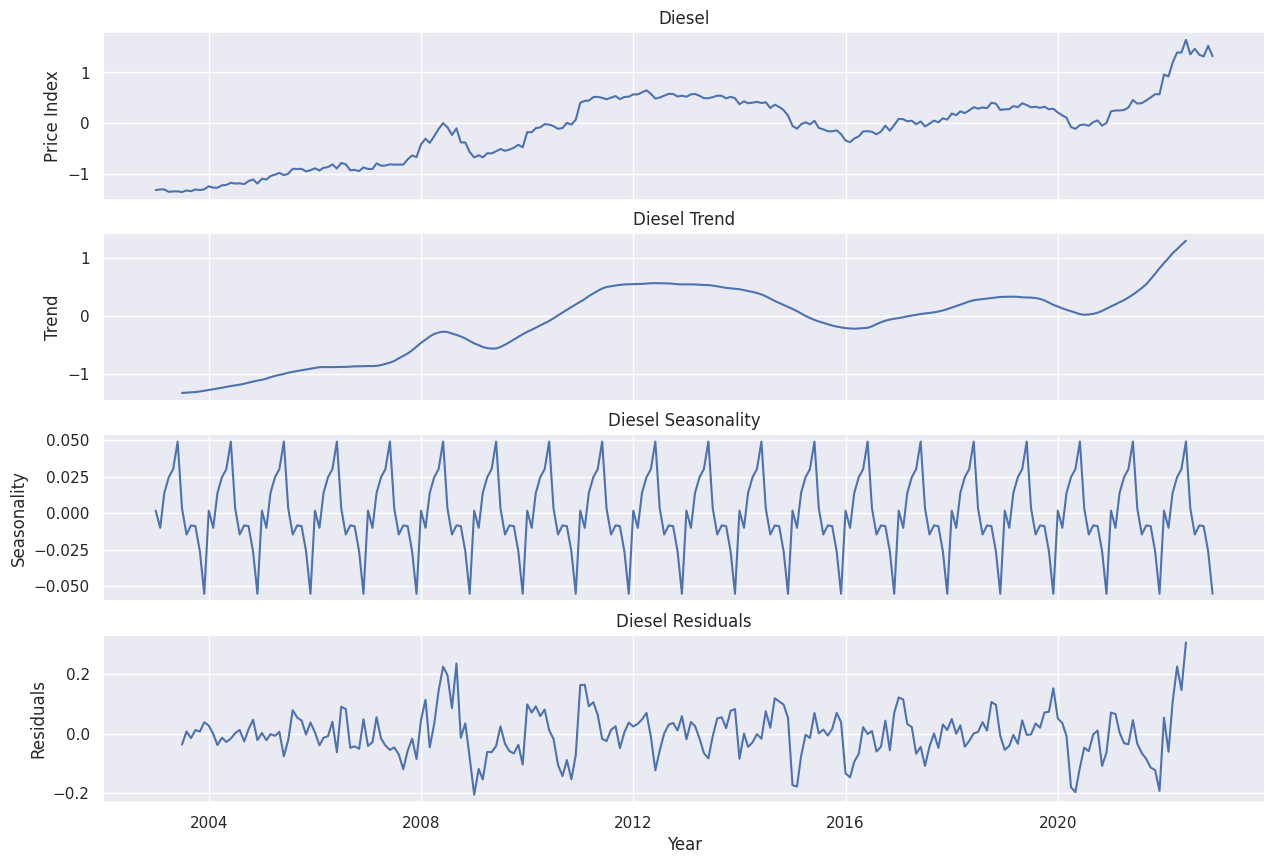

In [43]:
time_series_decomposition_diesel = seasonal_decompose(x=dataGreaterthan2003['Diesel'], model='additive', period=12)
trend_decomposition_diesel = time_series_decomposition_diesel.trend
seasonal_decomposition_diesel = time_series_decomposition_diesel.seasonal
residual_decomposition_diesel = time_series_decomposition_diesel.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(dataGreaterthan2003['Diesel'], label='Original')
axes[0].title.set_text('Diesel')

axes[1].plot(trend_decomposition_diesel, label='Trend')
axes[1].title.set_text('Diesel Trend')

axes[2].plot(seasonal_decomposition_diesel, label='Seasonality')
axes[2].title.set_text('Diesel Seasonality')

axes[3].plot(residual_decomposition_diesel, label='Residuals')
axes[3].title.set_text('Diesel Residuals')

axes[0].set_ylabel('Price Index')
axes[1].set_ylabel('Trend')
axes[2].set_ylabel('Seasonality')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Residuals')

### Principal Component Analysis

In [44]:
#Eigenvalues and eigen vectors
X = dataGreaterthan2003
C = np.cov(X, rowvar = False)
eigenvalues,eigenvectors = np.linalg.eig(C)
print(eigenvalues)
print(eigenvectors)

[1.09541037e+00 7.15280185e-02 3.07102824e-02 2.88375058e-03
 1.12056458e-05 9.67429294e-04 1.58516399e-03]
[[-0.17500796 -0.19757178  0.52171696 -0.40748999 -0.67011088  0.20299017
   0.04298041]
 [-0.14208765  0.92044058  0.30183429 -0.02214012 -0.0116632  -0.04353801
  -0.19741969]
 [-0.24975386 -0.25096967  0.22974104  0.58558226 -0.11702222 -0.11863753
  -0.67169982]
 [-0.20749534 -0.20258296  0.51647986 -0.26364118  0.73237056  0.19828564
  -0.06295934]
 [-0.27180066 -0.02886714  0.33908647  0.37995784  0.00305951 -0.49797973
   0.64649078]
 [-0.59983432 -0.05473442 -0.34905887 -0.46438562  0.01593377 -0.51202325
  -0.19309361]
 [-0.64037114  0.07680976 -0.28346666  0.24703544 -0.02216526  0.6271808
   0.22090304]]


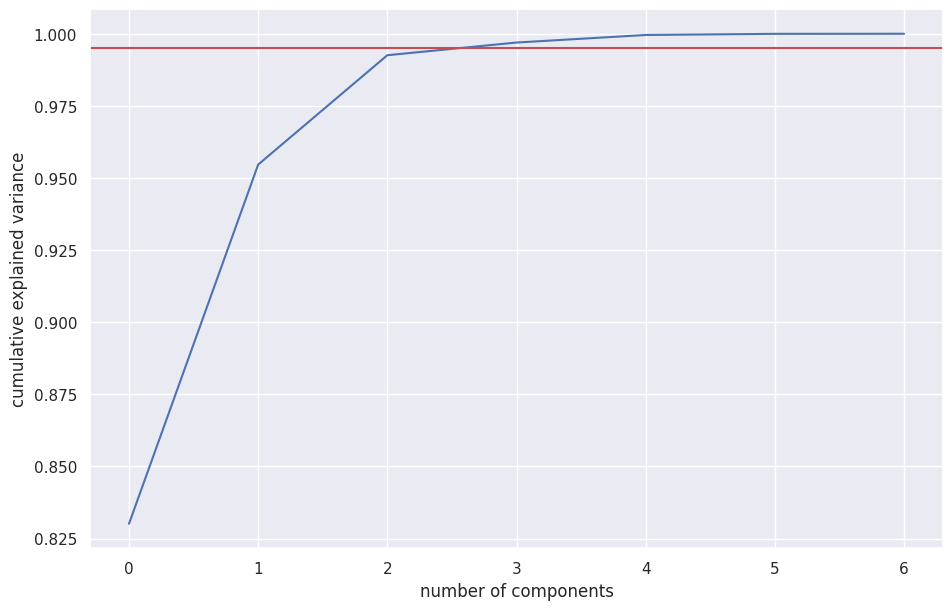

In [45]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting

dataGreaterthan2003.head()
X = dataGreaterthan2003.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data
#Applying PCA
pca = PCA()
X_pca = pca.fit(X_std)
#Retrieving the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.995, color='r', linestyle='-')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [46]:
#Dimensionality Reduction
num_components = 4
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

In [47]:
#Inspecting most vital features
pd.DataFrame(pca.components_, columns = dataGreaterthan2003.columns).round(5)

Official Core Consumer Price Index  Energy Price Index  Food Price Index  \
0                             0.38780             0.20320           0.40214   
1                            -0.23537             0.92123          -0.20529   
2                             0.52682             0.27312          -0.10579   
3                            -0.36138             0.06842           0.72859   

   Headline Consumer Price Index  Producer Price Index   Petrol   Diesel  
0                        0.39804               0.41130  0.39866  0.40009  
1                       -0.20317               0.02436  0.04387  0.09998  
2                        0.39867               0.03328 -0.50637 -0.46929  
3                       -0.14910               0.32195 -0.41757 -0.18337

In [48]:
#Retrieving names of the most important features
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
important_features = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns
# get the most important feature names
most_important_features = [initial_feature_names[important_features[i]] for i in range(n_pcs)]

In [49]:
most_important_features
#most important features: ['Producer Price', 'Energy', 'Core Consumer', 'Food']

['Producer Price', 'Energy', 'Core Consumer', 'Food']

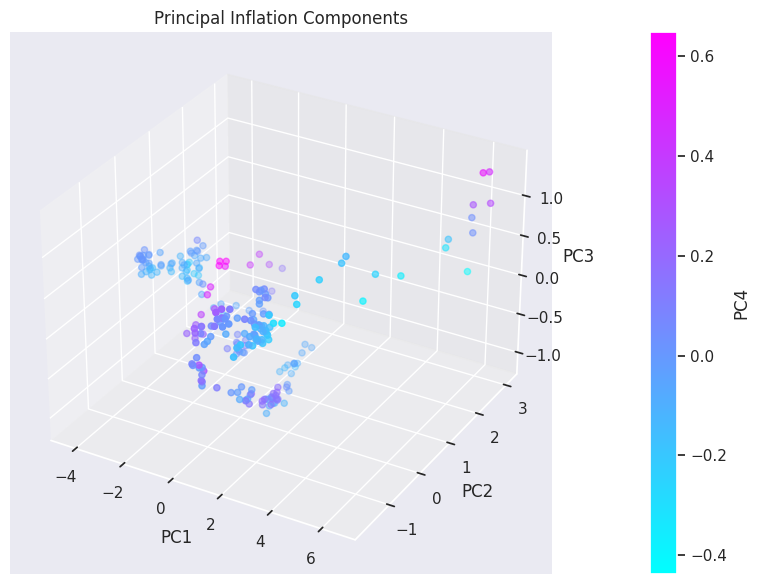

In [50]:
# Set up the 3D scatter plot
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111, projection='3d')

pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1]
pc3 = X_pca[:, 2]
pc4 = X_pca[:, 3]

# Plot the data points with color coding for the fourth dimension
sc = ax.scatter(pc1, pc2, pc3, c=pc4, cmap='cool')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Principal Inflation Components')

cbar = plt.colorbar(sc)
cbar.set_label('PC4')

# ax.view_init(elev=10, azim=30)
plt.tight_layout()

plt.show()

## Data Modelling

### Stationarity Tests on time-series data

In time series analysis, **stationarity** refers to a property of a time series where its statistical properties, such as its mean, variance, and autocorrelation, do not change over time. 

Stationarity can be defined in terms of mean, variance, and autocorrelation properties. 

**Mean stationarity:** A time series is said to exhibit mean stationarity if its mean remains constant over time.

**Variance stationarity:** if its variance remains constant over time

**Autocorrelation stationarity:** if its autocorrelation structure remains constant over time. 

The concept of stationarity is important in time series analysis, as many time series models, including ARIMA models, assume that the underlying time series is stationary. If a time series is not stationary, it may not perform well when modeled, and the results obtained from the model may not be reliable.

In [51]:
import statsmodels.api as sm

In [52]:
# Split the data into 10 blocks
blocks = np.array_split(dataGreaterthan2003, 10)

# Create a new dataframe to store the results
results_df = pd.DataFrame(columns=['Block', 'Column', 'Mean', 'Variance', 'Autocorrelation'])

# Compute mean, variance, and autocorrelation for each block and store the results in the new dataframe
for i, block in enumerate(blocks):
    for column in block.columns:
        mean = block[column].mean()
        var = block[column].var()
        acf = sm.tsa.acf(block[column], nlags=10)[-1]
        results_df = results_df.append({'Block': i+1, 'Column': column, 'Mean': mean, 'Variance': var, 'Autocorrelation': acf}, ignore_index=True)

# Print the results dataframe
results_df.sort_values(by = ["Column","Block"])

Block                Column      Mean  Variance  Autocorrelation
6      1                Diesel -1.271141  0.005441        -0.182270
13     2                Diesel -0.938022  0.007053        -0.060548
20     3                Diesel -0.536611  0.089956        -0.311215
27     4                Diesel -0.315871  0.068519        -0.196072
34     5                Diesel  0.522176  0.003141        -0.126171
..   ...                   ...       ...       ...              ...
39     6  Producer Price Index  0.696178  0.005992        -0.288179
46     7  Producer Price Index  0.571975  0.001752        -0.303659
53     8  Producer Price Index  0.701623  0.001523        -0.076458
60     9  Producer Price Index  0.778718  0.000227        -0.279503
67    10  Producer Price Index  1.054998  0.042189        -0.183120

[70 rows x 5 columns]

#### Non-parametric tests : Hodrick-Prescott Filter

This test separates a time series into two components: a trend component and a cyclical component. If the trend component is non-zero, it indicates that the time series is non-stationary. The Hodrick-Prescott filter is commonly used in economics and finance to decompose a time series into its trend and cyclical components.

In [53]:
import statsmodels.api as sm

In [54]:
results_hp = pd.DataFrame()
for col in dataGreaterthan2003.columns:
    cycle, trend = sm.tsa.filters.hpfilter(dataGreaterthan2003[col], lamb=129600)
    results_hp[f"{col}_trend"] = trend
    results_hp[f"{col}_cycle"] = cycle

results_hp

Official Core Consumer Price Index_trend  \
2003-01-01                                  0.104749   
2003-02-01                                  0.106834   
2003-03-01                                  0.108919   
2003-04-01                                  0.111004   
2003-05-01                                  0.113089   
...                                              ...   
2022-08-01                                  0.836006   
2022-09-01                                  0.841262   
2022-10-01                                  0.846521   
2022-11-01                                  0.851781   
2022-12-01                                  0.857042   

            Official Core Consumer Price Index_cycle  \
2003-01-01                                  0.003143   
2003-02-01                                  0.005054   
2003-03-01                                  0.006965   
2003-04-01                                  0.010874   
2003-05-01                                  0.010787   
...                                              ...   
2022-08-01                                  0.043115   
2022-09-01                                  0.049847   
2022-10-01                                  0.058574   
2022-11-01                                  0.061305   
2022-12-01                                  0.056045   

            Energy Price Index_trend  Energy Price Index_cycle  \
2003-01-01                 -0.328266                  0.037357   
2003-02-01                 -0.323239                  0.068693   
2003-03-01                 -0.318211                  0.063666   
2003-04-01                 -0.313182                  0.040455   
2003-05-01                 -0.308151                 -0.000940   
...                              ...                       ...   
2022-08-01                  0.515851                  0.502331   
2022-09-01                  0.541888                  0.512658   
2022-10-01                  0.567951                  0.632049   
2022-11-01                  0.594026                  0.551429   
2022-12-01                  0.620105                  0.525349   

            Food Price Index_trend  Food Price Index_cycle  \
2003-01-01                0.047189                0.027187   
2003-02-01                0.050340                0.034225   
2003-03-01                0.053491                0.037187   
2003-04-01                0.056643                0.038110   
2003-05-01                0.059796                0.043108   
...                            ...                     ...   
2022-08-01                0.961434                0.125678   
2022-09-01                0.968025                0.145577   
2022-10-01                0.974626                0.187881   
2022-11-01                0.981231                0.209803   
2022-12-01                0.987839                0.203196   

            Headline Consumer Price Index_trend  \
2003-01-01                             0.135042   
2003-02-01                             0.137807   
2003-03-01                             0.140573   
2003-04-01                             0.143338   
2003-05-01                             0.146105   
...                                         ...   
2022-08-01                             0.986637   
2022-09-01                             0.993258   
2022-10-01                             0.999884   
2022-11-01                             1.006513   
2022-12-01                             1.013142   

            Headline Consumer Price Index_cycle  Producer Price Index_trend  \
2003-01-01                             0.009453                   -0.032110   
2003-02-01                             0.010673                   -0.025826   
2003-03-01                             0.013887                   -0.019542   
2003-04-01                             0.019093                   -0.013257   
2003-05-01                             0.016327                   -0.006969   
...                                      

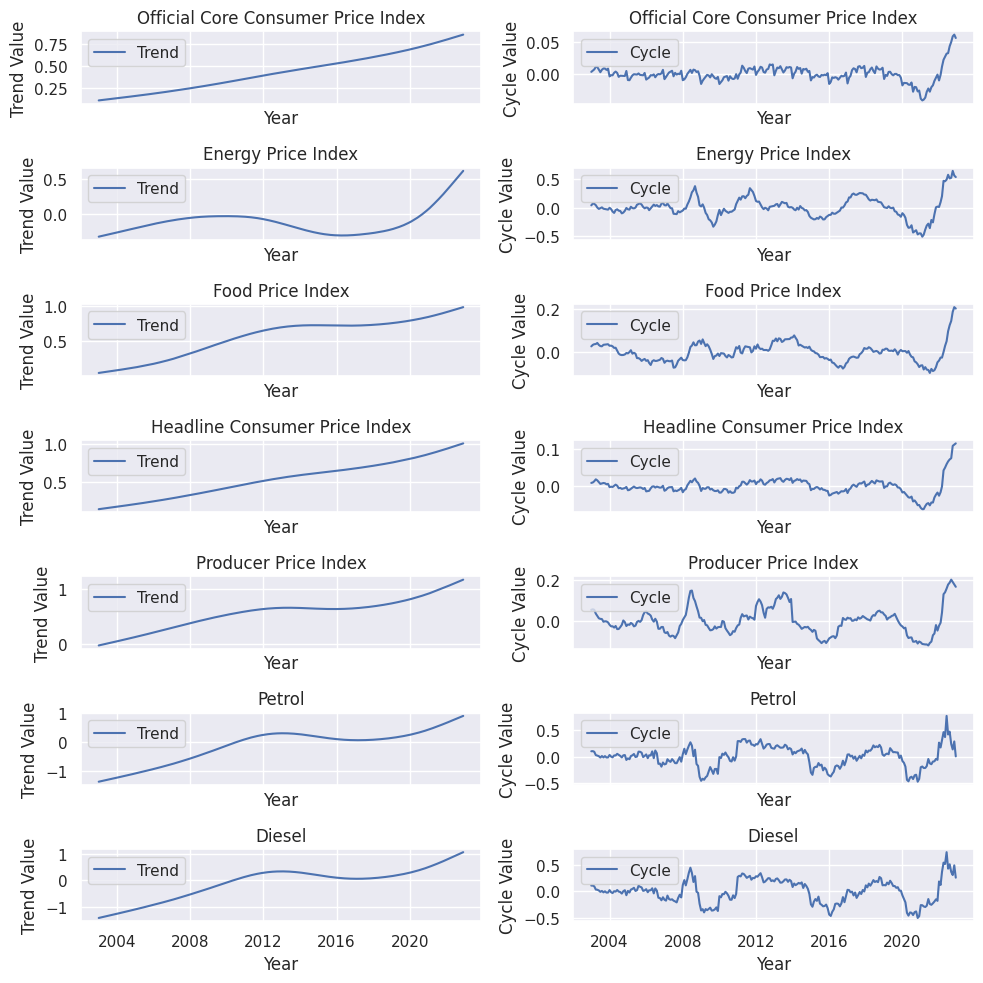

In [55]:
fig, axs = plt.subplots(len(dataGreaterthan2003.columns), 2, figsize=(10, 10), sharex=True)
for i, col in enumerate(dataGreaterthan2003.columns):
    axs[i,0].plot(dataGreaterthan2003.index, results_hp[f"{col}_trend"], label="Trend")
    axs[i,0].set_title(col)
    axs[i,0].set_ylabel("Trend Value")
    axs[i,0].set_xlabel("Year")
    axs[i,0].legend()
    axs[i,1].plot(dataGreaterthan2003.index, results_hp[f"{col}_cycle"], label="Cycle")
    axs[i,1].set_title(col)
    axs[i,1].set_ylabel("Cycle Value")
    axs[i,1].legend()
    axs[i,1].set_xlabel("Year")
plt.tight_layout()
plt.show()


**Interpreting Results**

To interpret the results of the HP filter, we can examine the trend and cyclical components separately. If the trend component is relatively flat and the cyclical component is relatively small, then the time series may be considered stationary. If the trend component is increasing or decreasing over time, or if the cyclical component is large, then the time series may be non-stationary.

#### Parametric test : Dickey-Fuller test

Parametric tests for stationarity in time series data are statistical tests that assume a particular parametric distribution for the data, such as normal or Gaussian distribution. These tests are often used when the underlying distribution of the data is known or when the data can be transformed to a parametric distribution.

One commonly used parametric test for stationarity is the Augmented Dickey-Fuller (ADF) test. The ADF test is a variation of the Dickey-Fuller test that accounts for autocorrelation in the data. It works by regressing the first difference of the time series on the lagged values of the time series and its first differences. The test statistic is then compared to critical values from a table to determine whether to reject or fail to reject the null hypothesis of non-stationarity.

The Dickey-Fuller test is a statistical test used to determine whether a time series is stationary or not.

The Dickey-Fuller test is based on the idea of an autoregressive model, which is a model that uses past values of a time series to predict future values. The test checks whether the autoregressive coefficient in the model is significantly different from zero. If the coefficient is significantly different from zero, it suggests that the time series is non-stationary.

The null hypothesis of the Dickey-Fuller test is that the time series is non-stationary, while the alternative hypothesis is that the time series is stationary. The test calculates a test statistic, which is compared to critical values from a table to determine whether to reject or fail to reject the null hypothesis.

In [56]:
from statsmodels.tsa.stattools import adfuller

In [57]:
results_df = pd.DataFrame(columns=['Column', 'ADF_Stat', 'p-value', 'Lags', 'Observations', 'Crit-1%', 'Crit-5%', 'Crit-10%'])


for col in dataGreaterthan2003.columns:
    results = adfuller(dataGreaterthan2003[col])
    results_df = results_df.append({'Column': col,
                                    'ADF_Stat': results[0],
                                    'p-value': results[1],
                                    'Lags': results[2],
                                    'Observations': results[3],
                                    'Crit-1%': results[4]['1%'],
                                    'Crit-5%': results[4]['5%'],
                                    'Crit-10%': results[4]['10%']},
                                    ignore_index=True)

results_df


Column  ADF_Stat   p-value Lags Observations  \
0  Official Core Consumer Price Index  1.421947  0.997212   15          224   
1                  Energy Price Index -1.244889  0.653994   12          227   
2                    Food Price Index -0.135361  0.945801   15          224   
3       Headline Consumer Price Index  1.152478  0.995641   15          224   
4                Producer Price Index -0.025460  0.956375    3          236   
5                              Petrol -1.159500  0.690771    7          232   
6                              Diesel -1.035611  0.740055    7          232   

    Crit-1%   Crit-5%  Crit-10%  
0 -3.459885 -2.874531 -2.573694  
1 -3.459490 -2.874358 -2.573602  
2 -3.459885 -2.874531 -2.573694  
3 -3.459885 -2.874531 -2.573694  
4 -3.458366 -2.873866 -2.573339  
5 -3.458855 -2.874080 -2.573453  
6 -3.458855 -2.874080 -2.573453

**Interpreting Results**

The null hypothesis of the Dickey-Fuller test is that the time series is non-stationary. Therefore, if the p-value obtained from the test is less than the significance level (usually 0.05), we can reject the null hypothesis and conclude that the time series is stationary. On the other hand, if the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that the time series is non-stationary.

In addition to the p-value, we can also look at the test statistic (ADF Stat) obtained from the test. If the test statistic is less than the critical value at the chosen significance level, we can reject the null hypothesis and conclude that the time series is stationary. Conversely, if the test statistic is greater than the critical value, we fail to reject the null hypothesis and conclude that the time series is non-stationary.

In [58]:
hypothesisclassificationconditions = [
    ((results_df['p-value'] <= 0.05) & (results_df['ADF_Stat'] <= results_df['Crit-5%'])),
    ((results_df['p-value'] > 0.05) & (results_df['ADF_Stat'] > results_df['Crit-5%']))
    ]

hypothesisclassificationvalues = ['Rejected', 'Accepted']

results_df['null_hypothesis'] = np.select(hypothesisclassificationconditions, hypothesisclassificationvalues)

conclusionclassificationconditions = [
    ((results_df['p-value'] <= 0.05) & (results_df['ADF_Stat'] <= results_df['Crit-5%'])),
    ((results_df['p-value'] > 0.05) & (results_df['ADF_Stat'] > results_df['Crit-5%']))
    ]

conclusionclassificationvalues = ['Stationary', 'Non-Stationary']

results_df['Conclusion'] = np.select(conclusionclassificationconditions, conclusionclassificationvalues)

results_df[['Column','null_hypothesis','Conclusion']]

Column null_hypothesis      Conclusion
0  Official Core Consumer Price Index        Accepted  Non-Stationary
1                  Energy Price Index        Accepted  Non-Stationary
2                    Food Price Index        Accepted  Non-Stationary
3       Headline Consumer Price Index        Accepted  Non-Stationary
4                Producer Price Index        Accepted  Non-Stationary
5                              Petrol        Accepted  Non-Stationary
6                              Diesel        Accepted  Non-Stationary

#### Converting data to Stationarity

In [59]:
# Detrend the data by subtracting rolling mean
rolling_mean = dataGreaterthan2003.rolling(window=12).mean()
df_detrended = dataGreaterthan2003 - rolling_mean

# Eliminate seasonality by taking the difference between the data at the same time point in the previous season
df_seasonal_difference = df_detrended.diff(periods=12)

# Check for autocorrelation and remove it by taking the difference between the data and its lagged value
df_autocorrelation_difference = df_seasonal_difference.diff().dropna()

stationaryDF = df_autocorrelation_difference

#### Re-run the ADF test again on the transformed data

In [60]:
results_df = pd.DataFrame(columns=['Column', 'ADF_Stat', 'p-value', 'Lags', 'Observations', 'Crit-1%', 'Crit-5%', 'Crit-10%'])


for col in stationaryDF.columns:
    results = adfuller(stationaryDF[col])
    results_df = results_df.append({'Column': col,
                                    'ADF_Stat': results[0],
                                    'p-value': results[1],
                                    'Lags': results[2],
                                    'Observations': results[3],
                                    'Crit-1%': results[4]['1%'],
                                    'Crit-5%': results[4]['5%'],
                                    'Crit-10%': results[4]['10%']},
                                    ignore_index=True)

In [61]:
results_df

Column  ADF_Stat       p-value Lags  \
0  Official Core Consumer Price Index -4.343674  3.729028e-04   14   
1                  Energy Price Index -6.165977  6.988650e-08   12   
2                    Food Price Index -8.027508  1.998937e-12   11   
3       Headline Consumer Price Index -5.596711  1.292086e-06   11   
4                Producer Price Index -5.843672  3.726520e-07   12   
5                              Petrol -6.665036  4.741172e-09   11   
6                              Diesel -6.928065  1.102146e-09   11   

  Observations   Crit-1%   Crit-5%  Crit-10%  
0          201 -3.463309 -2.876029 -2.574493  
1          203 -3.462980 -2.875885 -2.574416  
2          204 -3.462818 -2.875815 -2.574379  
3          204 -3.462818 -2.875815 -2.574379  
4          203 -3.462980 -2.875885 -2.574416  
5          204 -3.462818 -2.875815 -2.574379  
6          204 -3.462818 -2.875815 -2.574379

In [62]:
hypothesisclassificationconditions = [
    ((results_df['p-value'] <= 0.05) & (results_df['ADF_Stat'] <= results_df['Crit-5%'])),
    ((results_df['p-value'] > 0.05) & (results_df['ADF_Stat'] > results_df['Crit-5%']))
    ]

hypothesisclassificationvalues = ['Rejected', 'Accepted']

results_df['null_hypothesis'] = np.select(hypothesisclassificationconditions, hypothesisclassificationvalues)

conclusionclassificationconditions = [
    ((results_df['p-value'] <= 0.05) & (results_df['ADF_Stat'] <= results_df['Crit-5%'])),
    ((results_df['p-value'] > 0.05) & (results_df['ADF_Stat'] > results_df['Crit-5%']))
    ]

conclusionclassificationvalues = ['Stationary', 'Non-Stationary']

results_df['Conclusion'] = np.select(conclusionclassificationconditions, conclusionclassificationvalues)

results_df[['Column','null_hypothesis','Conclusion']]

Column null_hypothesis  Conclusion
0  Official Core Consumer Price Index        Rejected  Stationary
1                  Energy Price Index        Rejected  Stationary
2                    Food Price Index        Rejected  Stationary
3       Headline Consumer Price Index        Rejected  Stationary
4                Producer Price Index        Rejected  Stationary
5                              Petrol        Rejected  Stationary
6                              Diesel        Rejected  Stationary

#### Plotting Stationary Data

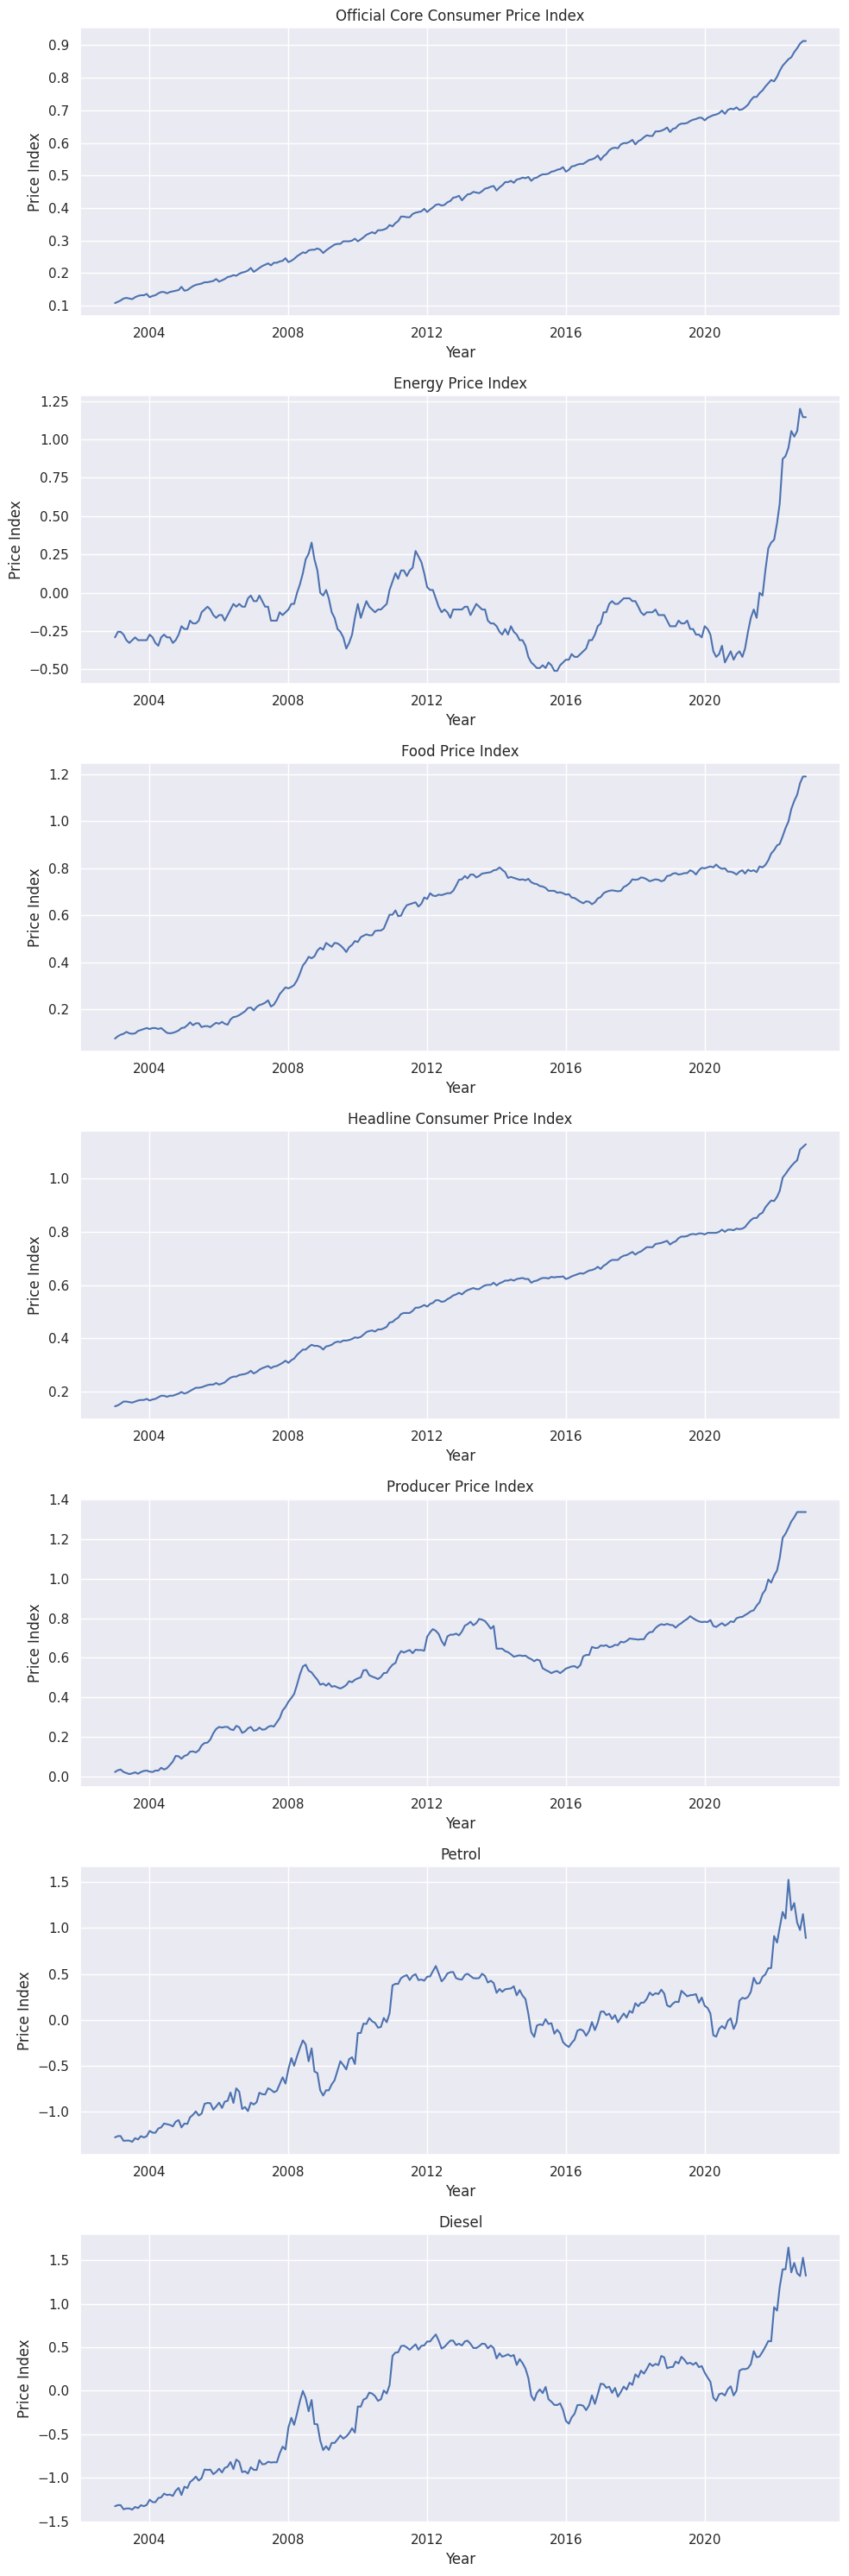

In [63]:
fig,axes = plt.subplots(7,1,figsize=(10,30))

for i,indices in enumerate(['Official Core Consumer Price Index','Energy Price Index','Food Price Index','Headline Consumer Price Index','Producer Price Index','Petrol','Diesel']):
    axes[i].plot(dataGreaterthan2003[indices])
    axes[i].set_title(indices)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Price Index')

fig.tight_layout()
plt.show()


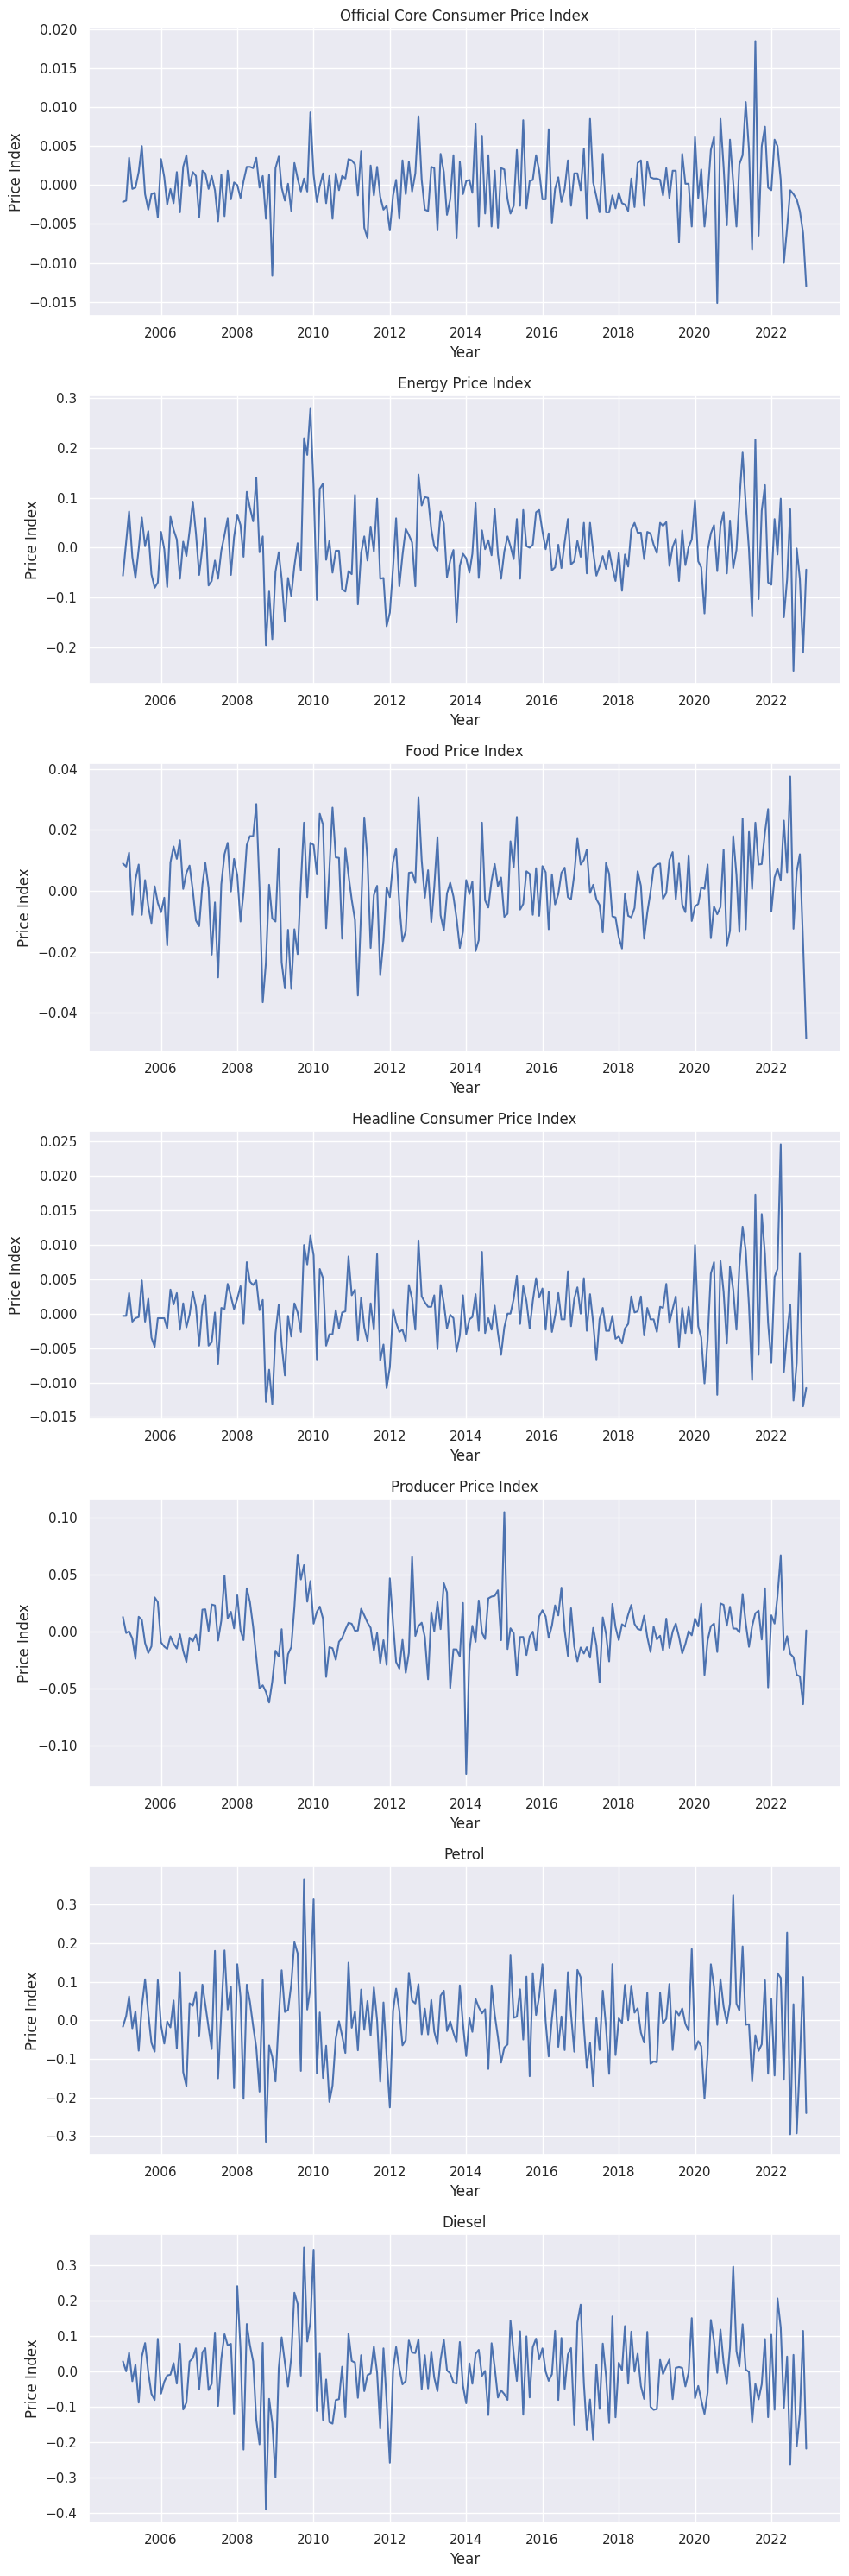

In [64]:
fig,axes = plt.subplots(7,1,figsize=(10,30),)

for i,indices in enumerate(['Official Core Consumer Price Index','Energy Price Index','Food Price Index','Headline Consumer Price Index','Producer Price Index','Petrol','Diesel']):
    axes[i].plot(stationaryDF[indices])
    axes[i].set_title(indices)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Price Index')

fig.tight_layout()
plt.show()

### Smoothing

Smoothing is a common practice in time series analysis for various reasons. Time series data is often characterized by high levels of noise, manifesting as small fluctuations and random variations. Smoothing techniques are employed to reduce this noise and facilitate the identification of underlying patterns and trends. Smoothing can also aid in the identification of long-term trends in the data by removing short-term fluctuations, which is beneficial for forecasting and predicting future trends. In addition, many time series data sets exhibit seasonal patterns such as monthly or yearly cycles, and smoothing can help to remove these patterns, providing insight into the underlying trends in the data. Finally, smoothing can assist in detecting outliers in the data by removing extreme values that may be due to measurement errors or other anomalies. The choice of smoothing method depends on the specific characteristics of the data and the objectives of the analysis.

**Moving averages**

Moving Average (MA) smoothing is a popular technique used in time series analysis to filter out random noise and reveal underlying patterns or trends in the data. This technique involves calculating the average of a subset of consecutive observations, known as a window or span, and replacing the central observation with this average value. By repeating this process for each observation in the time series, a smoothed version of the data can be obtained.

The size of the window, or span, is a critical parameter that affects the level of smoothing applied to the data. Larger windows result in a smoother trend, but with a higher lag or delay in detecting changes in the underlying pattern, while smaller windows provide more timely detection of changes, but with higher sensitivity to noise and fluctuations.

In [65]:
stationaryDF.to_csv('stationary_data.csv', index=True)

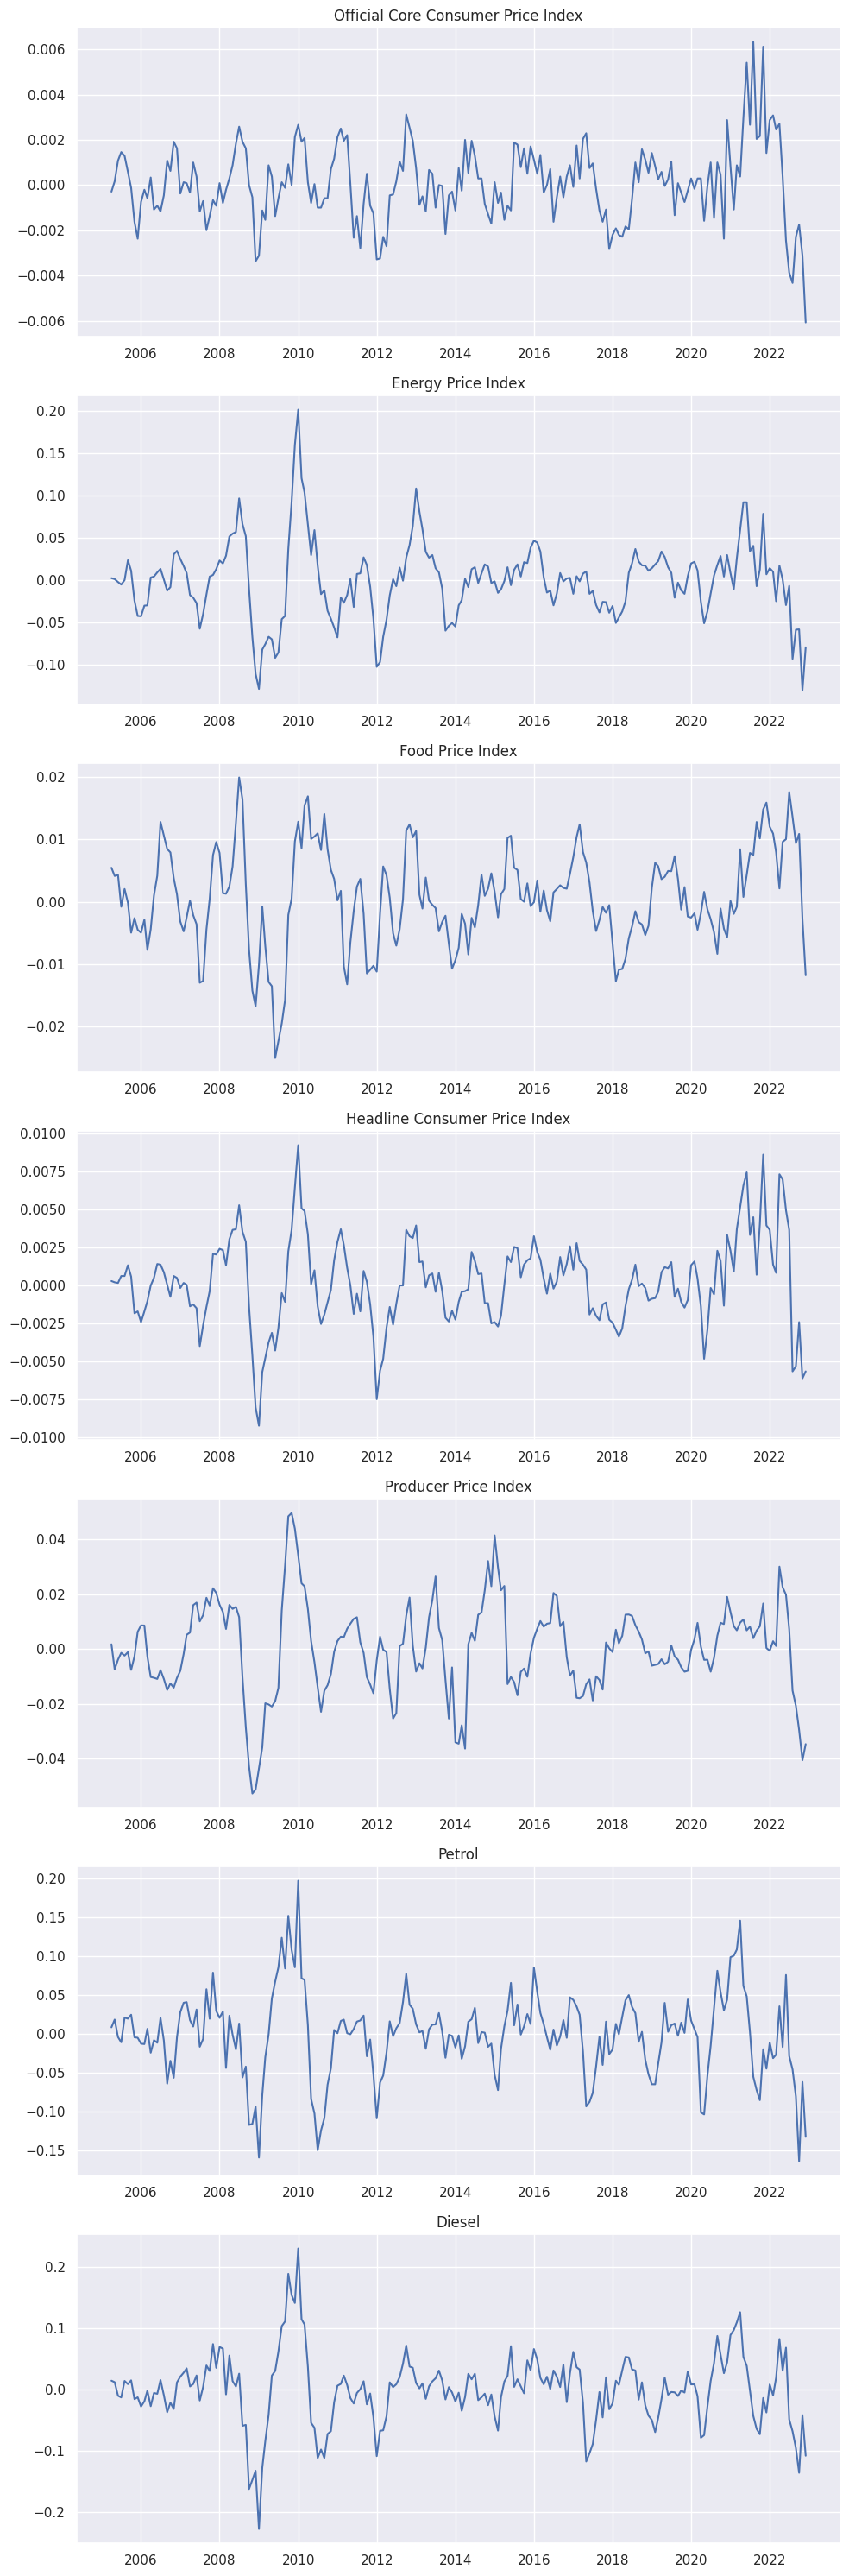

In [66]:
movingAverageDF = stationaryDF

# Define the window size for moving average smoothing
window_size = 4

# Apply moving average smoothing to each column in the dataframe
for column in movingAverageDF.columns:
    # Use the rolling function to compute the rolling window average
    movingAverageDF[column] = movingAverageDF[column].rolling(window=window_size).mean()


fig,axes = plt.subplots(7,1,figsize=(10,30),)

for i,indices in enumerate(['Official Core Consumer Price Index','Energy Price Index','Food Price Index','Headline Consumer Price Index','Producer Price Index','Petrol','Diesel']):
    axes[i].plot(movingAverageDF[indices])
    axes[i].set_title(indices)

fig.tight_layout()
plt.show()

### Exponential smoothing Model

In [67]:
test_size = 12

#test sets
exponentialSmoothingTestDF = dataGreaterthan2003.tail(12)


# train sets
# get the number of rows in the dataframe
num_rows = dataGreaterthan2003.shape[0]

# get all rows except the last 12 rows
exponentialSmoothingTrainDF = dataGreaterthan2003.iloc[:num_rows-12, :]

In [68]:
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

exponential_aic_dict = {}
exponential_bic_dict = {}

# define the parameters for the ExponentialSmoothing model
alpha = 0.7
beta = 0.7
seasonal_periods = 12
# create an empty dataframe to store the results
exponentialSmoothingResultDF = pd.DataFrame()

# loop through each column in `df`
for col in exponentialSmoothingTrainDF.columns:
    # create the ExponentialSmoothing model for the current column
    model = ExponentialSmoothing(exponentialSmoothingTrainDF[col], 
                                seasonal_periods=seasonal_periods,
                                trend='add', 
                                seasonal='add')
    
    # fit the model and make predictions
    model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta)

    exponential_aic_dict[col] = model_fit.aic
    exponential_bic_dict[col] = model_fit.bic
    
    predictions = model_fit.forecast(test_size)
    
    # add the predictions to the result dataframe
    exponentialSmoothingResultDF[col] = predictions

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_106/25037073.py:23: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, fre

In [69]:
# Calculate MSE

# create an empty dataframe to store the MSE results
exponential_mse_dict = {}
exponential_mae_dict = {}

# loop through each column in dataframe
for col in exponentialSmoothingTrainDF.columns:
    # calculate the MSE for the current column using NumPy's `mean` and `square` functions
    mse = np.mean(np.square(exponentialSmoothingTestDF[col] - exponentialSmoothingResultDF[col]))
    mae = mean_absolute_error(exponentialSmoothingTestDF[col], exponentialSmoothingResultDF[col])
    # add the MSE result for the current column to the `mse_df` dataframe
    exponential_mse_dict[col] = mse
    exponential_mae_dict[col] = mae


In [70]:
# Combine the dictionaries into a list
exponential_metrics_dict_list = [exponential_mse_dict, exponential_mae_dict, exponential_aic_dict, exponential_bic_dict]

# Convert the list of dictionaries to a dataframe
metricsDf = pd.DataFrame(exponential_metrics_dict_list, index=[exponential_mse_dict, exponential_mae_dict, exponential_aic_dict, exponential_bic_dict])

# Transpose the dataframe to have the keys as index
metricsDf = metricsDf.T

# Rename the columnsstat
metricsDf.columns = ['mse', 'mae', 'aic', 'bic']

# metricsDf.to_csv('metrics_exponential_smoothing.csv', index = True)

metricsDf.round(5)

mse      mae         aic         bic
Official Core Consumer Price Index  0.00010  0.00837 -2555.22619 -2500.35666
Energy Price Index                  0.03002  0.13359 -1350.24938 -1295.37985
Food Price Index                    0.00933  0.07553 -2045.19790 -1990.32837
Headline Consumer Price Index       0.00116  0.02980 -2511.41097 -2456.54144
Producer Price Index                0.02240  0.13462 -1785.95788 -1731.08835
Petrol                              0.06368  0.22149 -1118.11915 -1063.24962
Diesel                              0.15553  0.36141 -1127.73178 -1072.86225

In [71]:
exponentialSmoothingTrainDF.columns = [col + ' Train' for col in exponentialSmoothingTrainDF.columns]
exponentialSmoothingTestDF.columns = [col + ' Test' for col in exponentialSmoothingTestDF.columns]
exponentialSmoothingResultDF.columns = [col + ' Prediction' for col in exponentialSmoothingResultDF.columns]

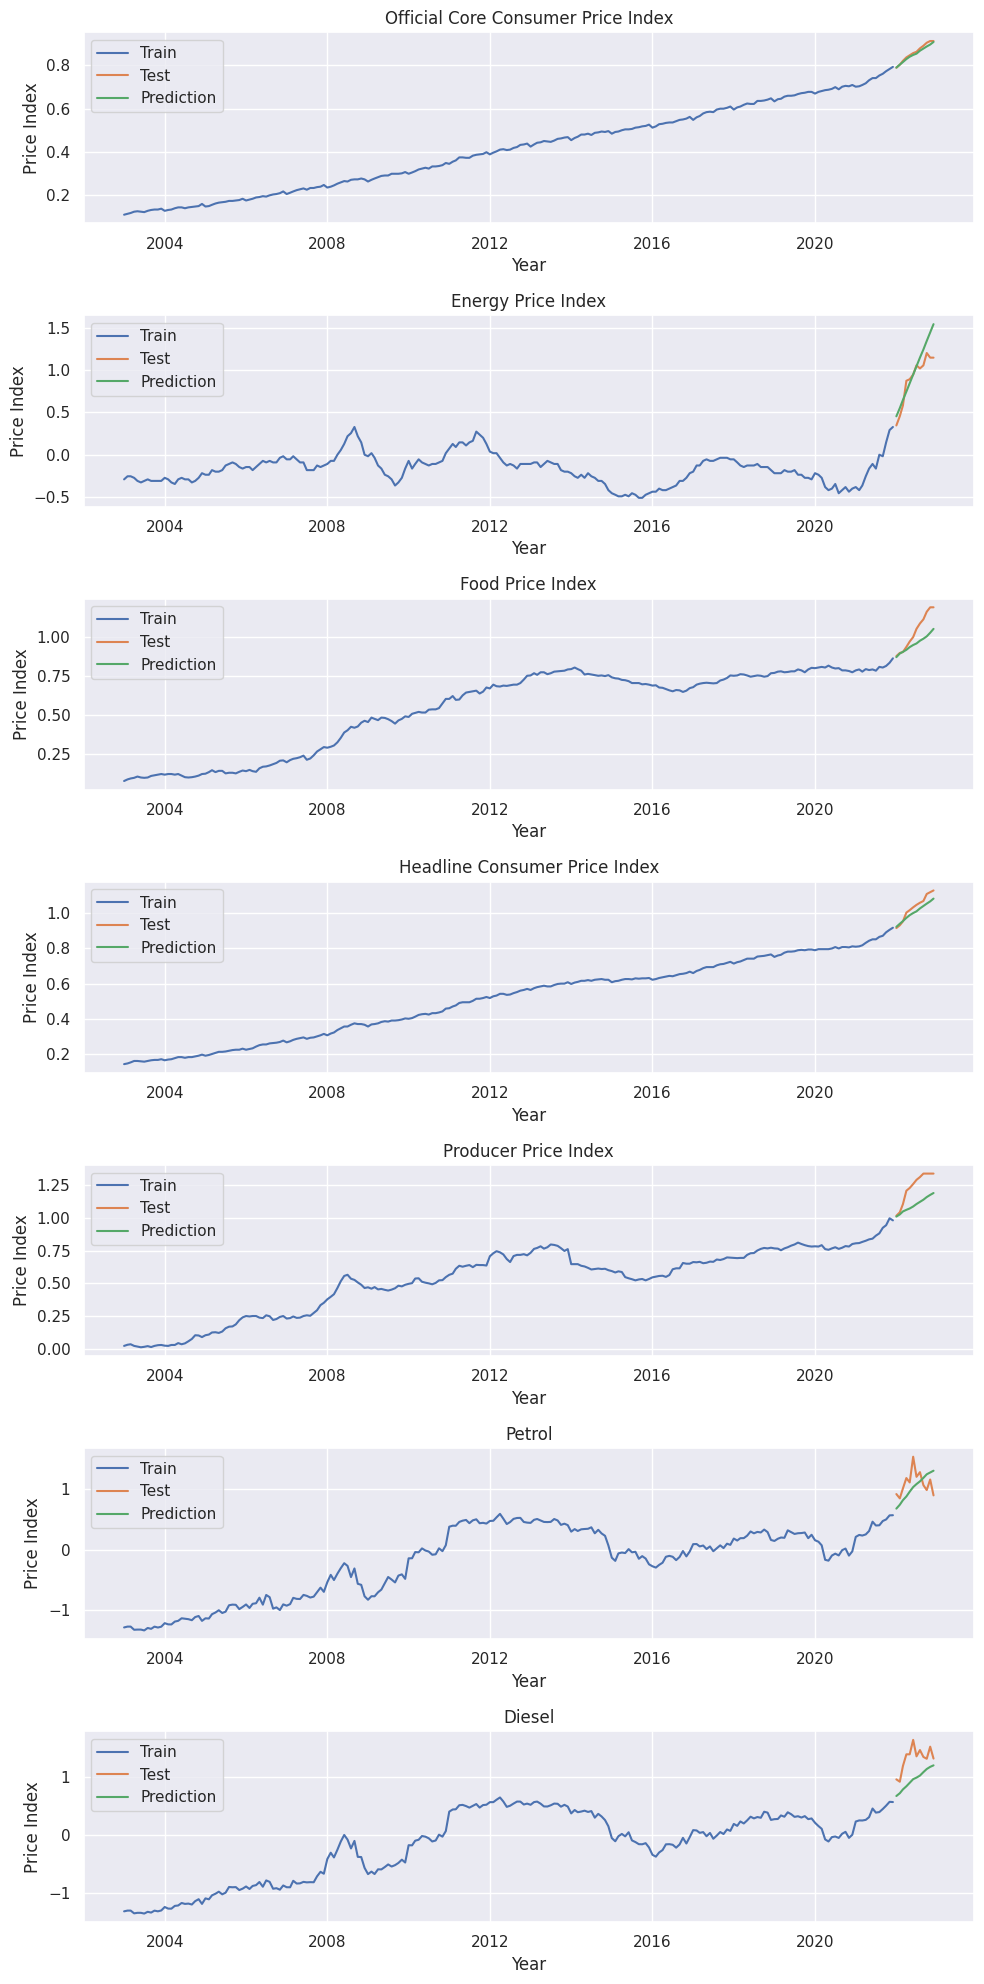

In [72]:
# merge the three dataframes on the index
merged_df = pd.concat([exponentialSmoothingTrainDF, exponentialSmoothingTestDF,exponentialSmoothingResultDF],axis=1)
merged_df
# plot the train, test, and prediction values


fig,axes = plt.subplots(7,1,figsize=(10,20))

for i,col in enumerate(['Official Core Consumer Price Index','Energy Price Index','Food Price Index','Headline Consumer Price Index','Producer Price Index','Petrol','Diesel']):
    axes[i].plot(merged_df.index, merged_df[f"{col} Train"], label='Train')
    axes[i].plot(merged_df.index, merged_df[f"{col} Test"], label='Test')
    axes[i].plot(merged_df.index, merged_df[f"{col} Prediction"], label='Prediction')
    
    axes[i].set_title(col)
    axes[i].legend()
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Price Index')

fig.tight_layout()
plt.show()

### Auto-Regressive Model

The Auto-Regressive (AR) model assumes that the current value $y_t$ is dependent on previous values $y_{(t-1)}, y_{(t-2)}$, …. Because of this assumption, we can build a linear regression model.

The AR model is defined as follows:

AR(p) model:
$$
Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + ... + \phi_p Y_{t-p} + ε_t
$$
where:

$Y_t$ is the value of the time series at time t
c is a constant (also known as the intercept)
$\phi_1, \phi_2, ..., \phi_p$ are the parameters of the model that represent the coefficients on the past values of the time series
$Y_{t-1}, Y_{t-2}, ..., Y_{t-p}$ are the past values of the time series
$ε_t$ is the error term (also known as the residual) at time t, which represents the part of the time series that is not explained by the past values
The parameter p is the order of the AR model, which specifies how many past values of the time series are included in the model.

To figure out the order of an AR model, you need to look at the PACF.

**Precondition: Stationarity**
ACF and PACF assume stationarity of the underlying time series.

In [73]:
from statsmodels.tsa.ar_model import AutoReg

In [74]:
test_size = 12

stationaryDF = stationaryDF.dropna()

#test sets
autoRegressiveTestDF = stationaryDF.tail(12)


# train sets
# get the number of rows in the dataframe
num_rows = stationaryDF.shape[0]

# get all rows except the last 12 rows
autoRegressiveTrainDF = stationaryDF.iloc[:num_rows-12, :]

In [75]:
autoRegressiveResultDF = pd.DataFrame()
autoregressive_aic_dict = {}
autoregressive_bic_dict = {}

# loop through each column in `df`
for col in autoRegressiveTrainDF.columns:
    # create the Auto-Regressive model for the current column
    model = AutoReg(autoRegressiveTrainDF[col], lags=15)
    
    # fit the model and make predictions
    model_fit = model.fit()

    # Calculate AIC and BIC
    n = len(autoRegressiveTrainDF[col])
    k = len(model_fit.params)
    autoregressive_aic_dict[col] = 2*k - 2*np.log(model_fit.llf)
    autoregressive_bic_dict[col] = np.log(n)*k - 2*np.log(model_fit.llf)
    
    predictions = model_fit.predict(start=len(autoRegressiveTrainDF), end=len(autoRegressiveTrainDF)+12)
    
    # add the predictions to the result dataframe
    autoRegressiveResultDF[col] = predictions

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain t

In [76]:
# Calculate MSE

# create an empty dataframe to store the MSE results
autoregressive_mse_dict = {}
autoregressive_mae_dict = {}

# loop through each column in dataframe
for col in autoRegressiveTrainDF.columns:
    # calculate the MSE for the current column using NumPy's `mean` and `square` functions
    mse = np.mean(np.square(autoRegressiveTestDF[col] - autoRegressiveResultDF[col].head(12)))
    mae = mean_absolute_error(autoRegressiveTestDF[col], autoRegressiveResultDF[col].head(12))
    # add the MSE result for the current column to the `mse_df` dataframe
    autoregressive_mse_dict[col] = mse
    autoregressive_mae_dict[col] = mae

In [77]:
# Combine the dictionaries into a list
autoregressive_metrics_dict_list = [autoregressive_mse_dict, autoregressive_mae_dict, autoregressive_aic_dict, autoregressive_bic_dict]

# Convert the list of dictionaries to a dataframe
metricsDf = pd.DataFrame(autoregressive_metrics_dict_list, index=[autoregressive_mse_dict, autoregressive_mae_dict, autoregressive_aic_dict, autoregressive_bic_dict])

# Transpose the dataframe to have the keys as index
metricsDf = metricsDf.T

# Rename the columns
metricsDf.columns = ['mse', 'mae', 'aic', 'bic']

metricsDf.to_csv('metrics_autoregressive.csv', index = True)

metricsDf.round(5)

mse      mae       aic       bic
Official Core Consumer Price Index  0.00001  0.00219  18.13619  70.98907
Energy Price Index                  0.00336  0.04876  19.55395  72.40683
Food Price Index                    0.00017  0.01010  18.57138  71.42426
Headline Consumer Price Index       0.00003  0.00445  18.21610  71.06898
Producer Price Index                0.00060  0.02147  18.91722  71.77010
Petrol                              0.01109  0.08257  19.90056  72.75344
Diesel                              0.00929  0.08454  19.90165  72.75453

In [78]:
autoRegressiveTrainDF.columns = [col + ' Train' for col in autoRegressiveTrainDF.columns]
autoRegressiveTestDF.columns = [col + ' Test' for col in autoRegressiveTestDF.columns]
autoRegressiveResultDF.columns = [col + ' Prediction' for col in autoRegressiveResultDF.columns]

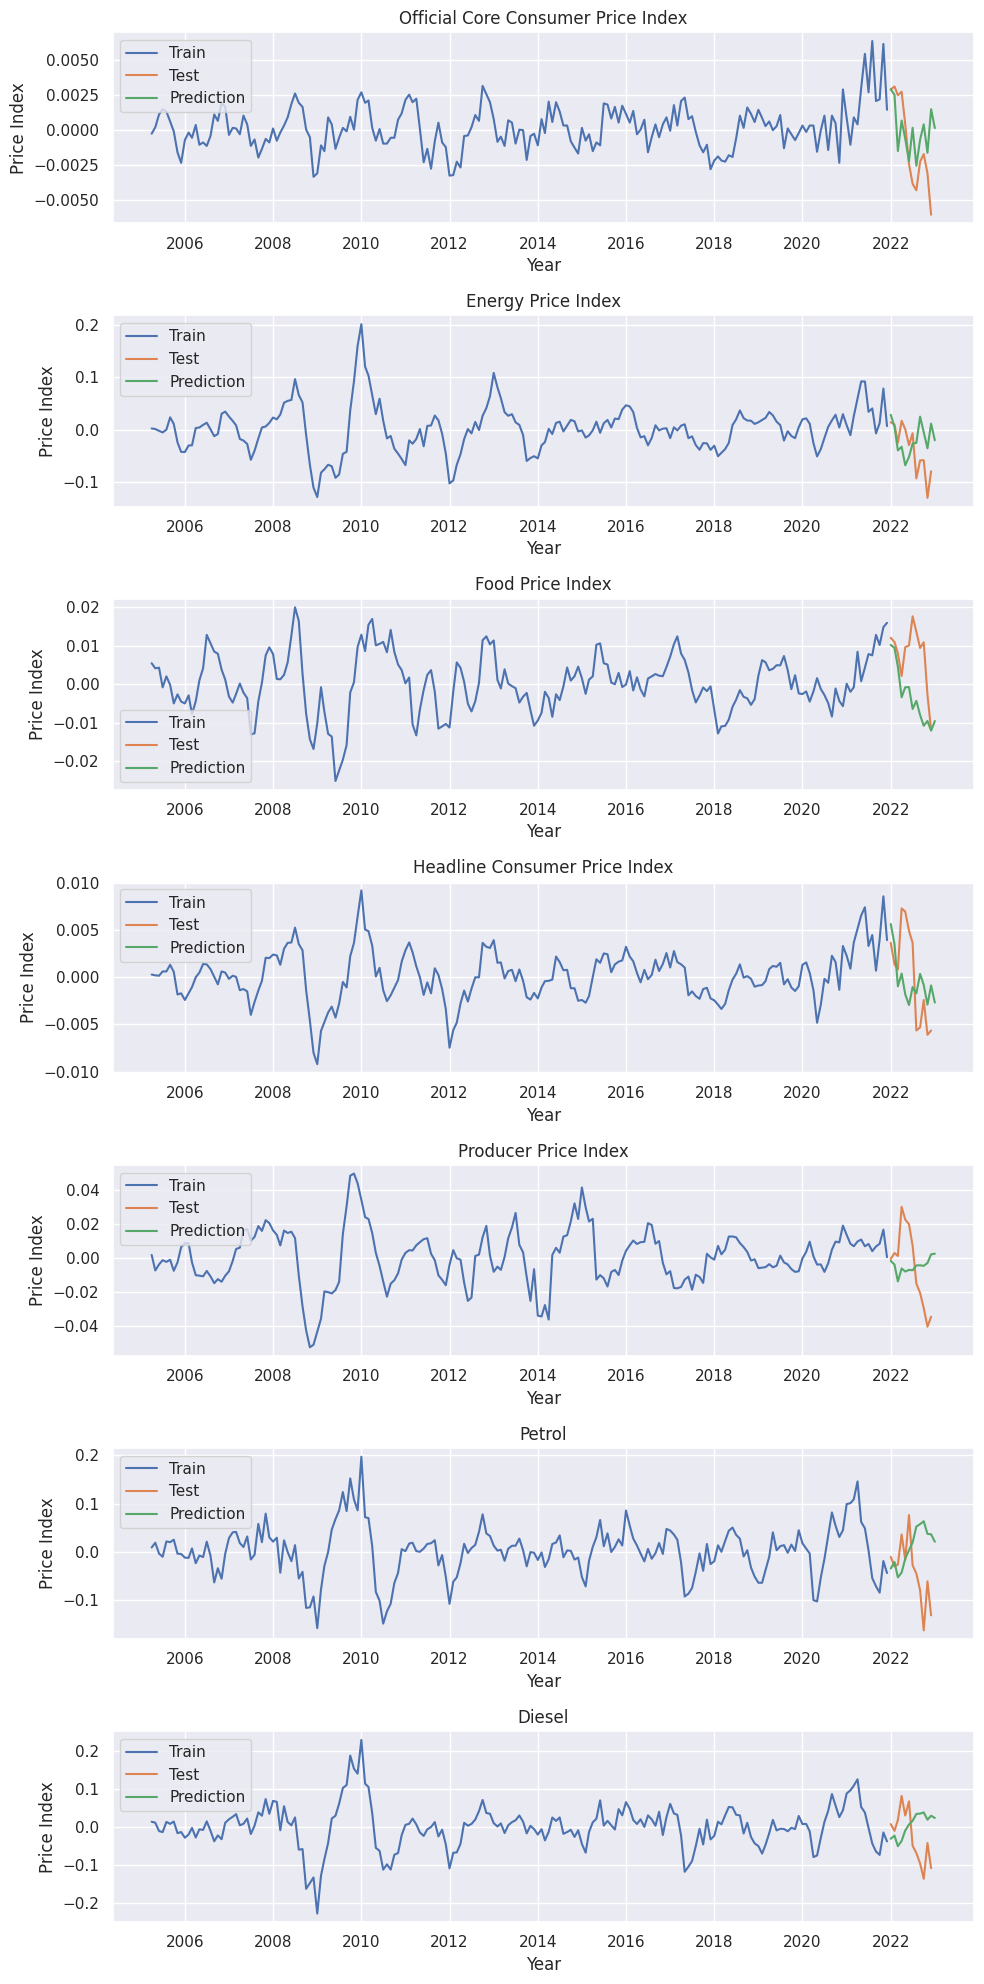

In [79]:
# merge the three dataframes on the index
merged_df = pd.concat([autoRegressiveTrainDF, autoRegressiveTestDF,autoRegressiveResultDF],axis=1)
merged_df
# plot the train, test, and prediction values


fig,axes = plt.subplots(7,1,figsize=(10,20),)

for i,col in enumerate(['Official Core Consumer Price Index','Energy Price Index','Food Price Index','Headline Consumer Price Index','Producer Price Index','Petrol','Diesel']):
    axes[i].plot(merged_df.index, merged_df[f"{col} Train"], label='Train')
    axes[i].plot(merged_df.index, merged_df[f"{col} Test"], label='Test')
    axes[i].plot(merged_df.index, merged_df[f"{col} Prediction"], label='Prediction')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Price Index')
    axes[i].set_title(col)
    axes[i].legend()

fig.tight_layout()
plt.show()

### Moving Average Model

The moving average (MA) model is a mathematical framework used to analyze and forecast time series data, such as inflation, by using past error terms to predict future values. The MA model assumes that the current value of a time series variable can be predicted by a linear combination of the past error terms, where the order of the model (represented by "q") determines the number of lagged error terms used in the prediction.

For instance, a MA(1) model would utilize the previous error term and a coefficient to forecast the current value of the time series variable. The formula for a MA(1) model includes a constant term, the current error term, and the product of the coefficient and the lagged error term. By analyzing the coefficients and residual errors in the MA model, we can gain insights into the dynamics of the time series data and make forecasts for future values. It is important to note that the effectiveness of the MA model relies on the specific characteristics of the data being analyzed and that it is one of several time series models used to analyze and forecast inflation data.

The first-order moving average model, which is represented by MA(1), is expressed as:
$$
x_t = μ + \omega_t + \theta_1\omega_{(t-1)}
$$

The second-order moving average model, which is represented by MA(2), is expressed as:
$$
x_t = μ + \omega_t + \theta_1\omega_{(t-1)} + \theta_1\omega_{(t-2)}
$$

The qth order moving average model, which is represented by MA(q), is expressed as:
$$
x_t = μ + \omega_t + \theta_1\omega_{(t-1)} + \theta_2\omega_{(t-2)} + .... + \theta_q\omega_{(t-q)}
$$

To figure out the order of an MA model, you need to look at the ACF.

In [80]:
test_size = 12


#test sets
movingAverageTestDF = stationaryDF.tail(12)


# train sets
# get the number of rows in the dataframe
num_rows = stationaryDF.shape[0]

# get all rows except the last 12 rows
movingAverageTrainDF = stationaryDF.iloc[:num_rows-12, :]

In [81]:
movingAverageResultDF = pd.DataFrame()
movingaverage_aic_dict = {}
movingaverage_bic_dict = {}

# loop through each column in `df`
for col in movingAverageTrainDF.columns:
    # create the Moving Average model for the current column
    model = sm.tsa.arima.ARIMA(movingAverageTrainDF[col], order = (0, 0, 15))
    
    # fit the model and make predictions
    model_fit = model.fit()

    movingaverage_aic_dict[col] = model_fit.aic
    movingaverage_bic_dict[col] = model_fit.bic
    
    predictions = model_fit.predict(start=len(movingAverageTrainDF), end=len(movingAverageTrainDF)+12)
    
    # add the predictions to the result dataframe
    movingAverageResultDF[col] = predictions

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

In [82]:
# Calculate MSE

# create an empty dataframe to store the MSE results
movingaverage_mse_dict = {}
movingaverage_mae_dict = {}

# loop through each column in dataframe
for col in movingAverageTrainDF.columns:
    # calculate the MSE for the current column using NumPy's `mean` and `square` functions
    mse = np.mean(np.square(movingAverageTestDF[col] - movingAverageResultDF[col].head(12)))
    mae = mean_absolute_error(movingAverageTestDF[col], movingAverageResultDF[col].head(12))
    # add the MSE result for the current column to the `mse_df` dataframe
    movingaverage_mse_dict[col] = mse
    movingaverage_mae_dict[col] = mae

In [83]:
# Combine the dictionaries into a list
movingaverage_metrics_dict_list = [movingaverage_mse_dict, movingaverage_mae_dict, movingaverage_aic_dict, movingaverage_bic_dict]

# Convert the list of dictionaries to a dataframe
metricsDf = pd.DataFrame(movingaverage_metrics_dict_list, index=[movingaverage_mse_dict, movingaverage_mae_dict, movingaverage_aic_dict, movingaverage_bic_dict])

# Transpose the dataframe to have the keys as index
metricsDf = metricsDf.T

# Rename the columns
metricsDf.columns = ['mse', 'mae', 'aic', 'bic']

metricsDf.to_csv('metrics_movingaverage.csv', index = True)

metricsDf

mse       mae          aic  \
Official Core Consumer Price Index  0.000011  0.002969 -1999.892993   
Energy Price Index                  0.001804  0.036826 -1130.599026   
Food Price Index                    0.000160  0.011055 -1731.433847   
Headline Consumer Price Index       0.000023  0.004159 -2138.247332   
Producer Price Index                0.000484  0.019372 -1488.291929   
Petrol                              0.007009  0.068032  -950.183112   
Diesel                              0.007387  0.077209  -928.959609   

                                            bic  
Official Core Consumer Price Index -1943.736810  
Energy Price Index                 -1074.442843  
Food Price Index                   -1675.277664  
Headline Consumer Price Index      -2082.091148  
Producer Price Index               -1432.135745  
Petrol                              -894.026928  
Diesel                              -872.803425

In [84]:
movingAverageTrainDF.columns = [col + ' Train' for col in movingAverageTrainDF.columns]
movingAverageTestDF.columns = [col + ' Test' for col in movingAverageTestDF.columns]
movingAverageResultDF.columns = [col + ' Prediction' for col in movingAverageResultDF.columns]

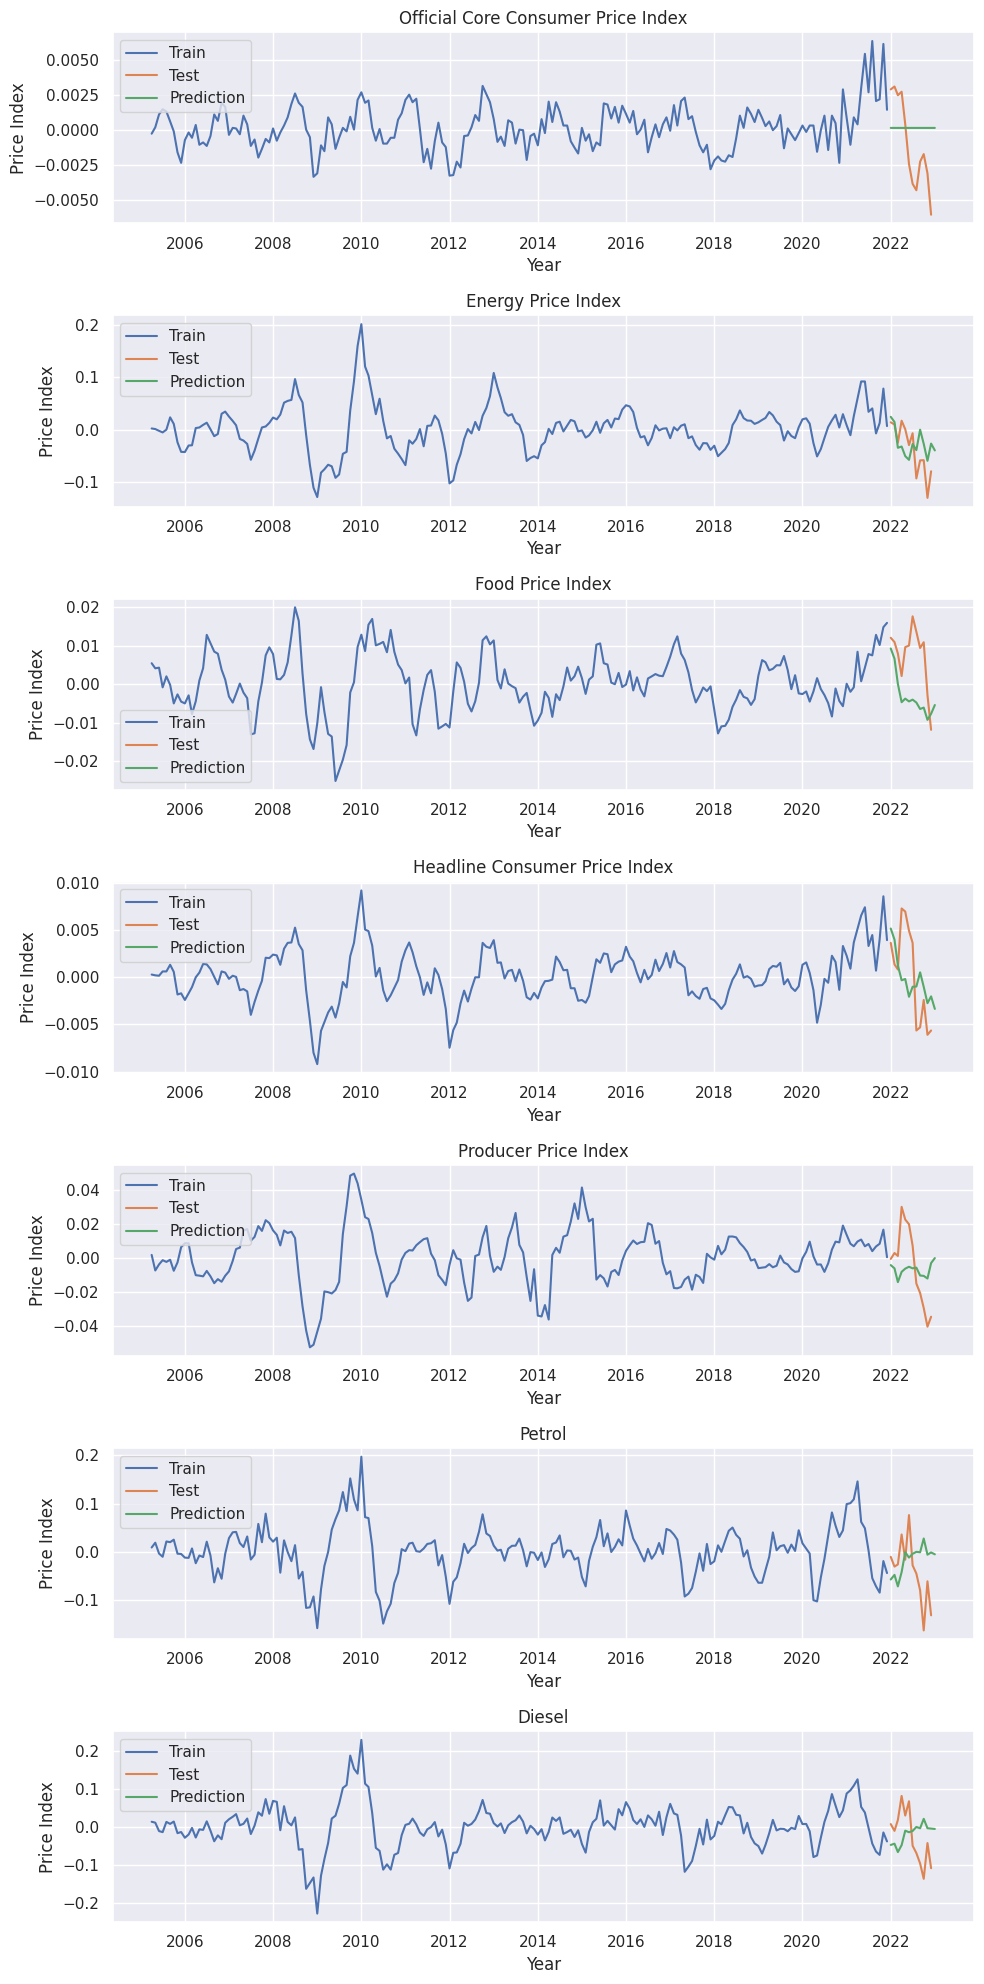

In [85]:
# merge the three dataframes on the index
merged_df = pd.concat([movingAverageTrainDF, movingAverageTestDF,movingAverageResultDF],axis=1)
merged_df
# plot the train, test, and prediction values


fig,axes = plt.subplots(7,1,figsize=(10,20),)

for i,col in enumerate(['Official Core Consumer Price Index','Energy Price Index','Food Price Index','Headline Consumer Price Index','Producer Price Index','Petrol','Diesel']):
    axes[i].plot(merged_df.index, merged_df[f"{col} Train"], label='Train')
    axes[i].plot(merged_df.index, merged_df[f"{col} Test"], label='Test')
    axes[i].plot(merged_df.index, merged_df[f"{col} Prediction"], label='Prediction')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Price Index')
    axes[i].set_title(col)
    axes[i].legend()

fig.tight_layout()
plt.show()

### ARIMA

ARIMA models consist of three main components:

**Autoregression (AR):** This component models the relationship between an observation and a lagged version of itself. It is denoted by the parameter p and can be expressed as:

$$
Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + ... + \phi_p Y_{t-p} + e_t
$$

where $Y_t$ is the value of the time series at time t, c is a constant, $\phi_i$ are the autoregressive parameters, and $e_t$ is the error term at time t. The autoregressive component captures the trend in the data.

**Integration (I):** This component models the degree of differencing needed to make the time series stationary, i.e., to remove any trend or seasonality present in the data. It is denoted by the parameter d and can be expressed as:
$$
Y'_t = (1-L)^d * Y_t
$$

where $Y'_t$ is the differenced series, L is the lag operator, and d is the order of differencing. The differencing component captures the non-stationarity in the data.

**Moving Average (MA):** This component models the relationship between an observation and a lagged error term. It is denoted by the parameter q and can be expressed as:
$$
Y_t = c + e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2} + ... + \theta_q e_{t-q}
$$

where $\theta_i$ are the moving average parameters and e_t is the error term at time t. The moving average component captures the noise in the data.

Together, these three components make up the ARIMA model. The notation for an ARIMA model is ARIMA(p,d,q).

When applying an ARIMA model to inflation data, the model can be used to identify and forecast trends and seasonality in the data. The equations for the ARIMA(p,d,q) model applied to inflation data would look like:

$$
Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + ... + \phi_p Y_{t-p} + e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2} + ... + \theta_q e_{t-q}
$$


In [86]:
test_size = 12


#test sets
arimaTestDF = stationaryDF.tail(12)


# train sets
# get the number of rows in the dataframe
num_rows = stationaryDF.shape[0]

# get all rows except the last 12 rows
arimaTrainDF = stationaryDF.iloc[:num_rows-12, :]

In [87]:
arimaResultDF = pd.DataFrame()
arima_aic_dict = {}
arima_bic_dict = {}

# loop through each column in `df`
for col in arimaTrainDF.columns:
    # create the Moving Average model for the current column
    model = sm.tsa.arima.ARIMA(arimaTrainDF[col], order = (1, 0, 15))
    
    # fit the model and make predictions
    model_fit = model.fit()
    
    arima_aic_dict[col] = model_fit.aic
    arima_bic_dict[col] = model_fit.bic

    predictions = model_fit.predict(start=len(arimaTrainDF), end=len(arimaTrainDF)+12)
    
    # add the predictions to the result dataframe
    arimaResultDF[col] = predictions

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

In [88]:
# Calculate MSE

# create an empty dataframe to store the MSE results
arima_mse_dict = {}
arima_mae_dict = {}

# loop through each column in dataframe
for col in arimaTrainDF.columns:
    # calculate the MSE for the current column using NumPy's `mean` and `square` functions
    mse = np.mean(np.square(arimaTestDF[col] - arimaResultDF[col].head(12)))
    mae = mean_absolute_error(arimaTestDF[col], arimaResultDF[col].head(12))
    # add the MSE result for the current column to the `mse_df` dataframe
    arima_mse_dict[col] = mse
    arima_mae_dict[col] = mae

In [89]:
# Combine the dictionaries into a list
arima_metrics_dict_list = [arima_mse_dict, arima_mae_dict, arima_aic_dict, arima_bic_dict]

# Convert the list of dictionaries to a dataframe
metricsDf = pd.DataFrame(arima_metrics_dict_list, index=[arima_mse_dict, arima_mae_dict, arima_aic_dict, arima_bic_dict])

# Transpose the dataframe to have the keys as index
metricsDf = metricsDf.T

# Rename the columns
metricsDf.columns = ['mse', 'mae', 'aic', 'bic']

# metricsDf.to_csv('metrics_arima.csv', index = True)

metricsDf

mse       mae          aic  \
Official Core Consumer Price Index  0.000010  0.002833 -2087.034543   
Energy Price Index                  0.001933  0.037019 -1103.544049   
Food Price Index                    0.000135  0.009058 -1740.442648   
Headline Consumer Price Index       0.000024  0.003881 -2094.686612   
Producer Price Index                0.000410  0.017995 -1481.567840   
Petrol                              0.006174  0.062868  -931.353898   
Diesel                              0.008870  0.086266  -910.279977   

                                            bic  
Official Core Consumer Price Index -2027.575054  
Energy Price Index                 -1044.084560  
Food Price Index                   -1680.983160  
Headline Consumer Price Index      -2035.227123  
Producer Price Index               -1422.108351  
Petrol                              -871.894409  
Diesel                              -850.820489

In [90]:
arimaTrainDF.columns = [col + ' Train' for col in arimaTrainDF.columns]
arimaTestDF.columns = [col + ' Test' for col in arimaTestDF.columns]
arimaResultDF.columns = [col + ' Prediction' for col in arimaResultDF.columns]

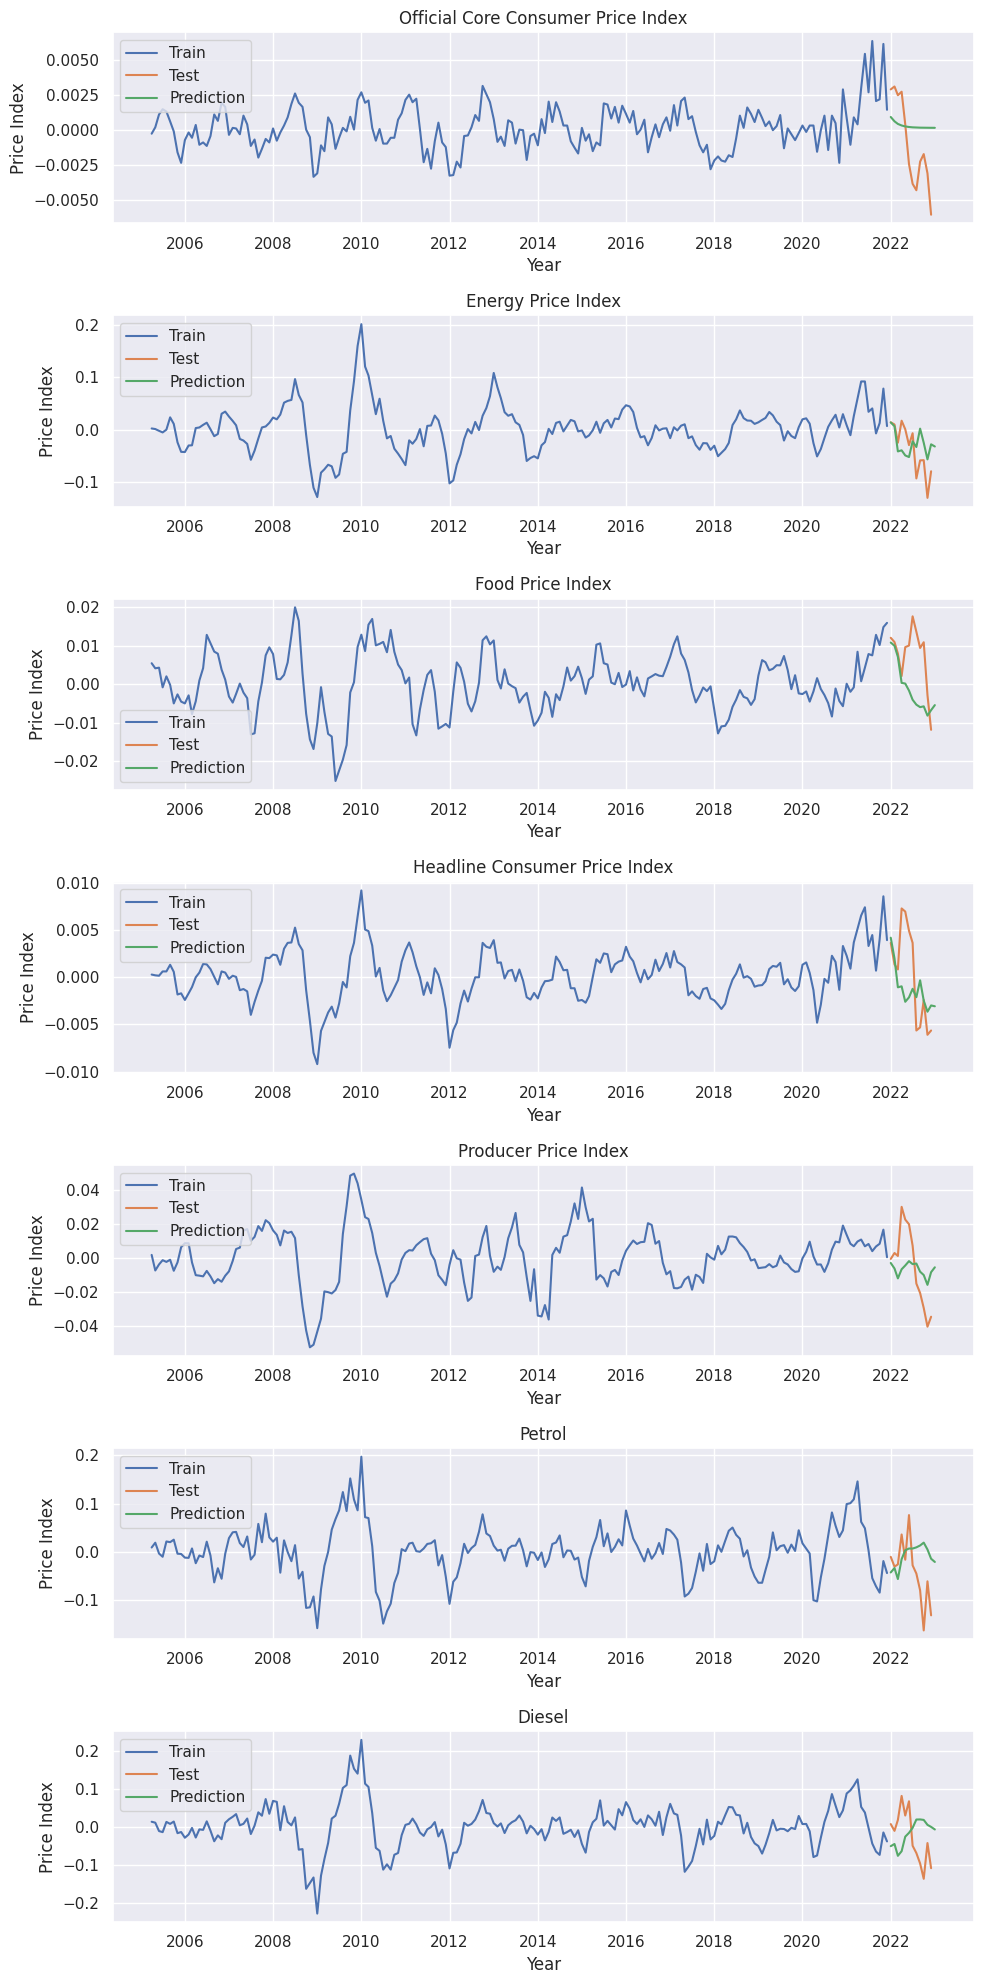

In [91]:
# merge the three dataframes on the index
merged_df = pd.concat([arimaTrainDF, arimaTestDF,arimaResultDF],axis=1)
merged_df
# plot the train, test, and prediction values


fig,axes = plt.subplots(7,1,figsize=(10,20),)

for i,col in enumerate(['Official Core Consumer Price Index','Energy Price Index','Food Price Index','Headline Consumer Price Index','Producer Price Index','Petrol','Diesel']):
    axes[i].plot(merged_df.index, merged_df[f"{col} Train"], label='Train')
    axes[i].plot(merged_df.index, merged_df[f"{col} Test"], label='Test')
    axes[i].plot(merged_df.index, merged_df[f"{col} Prediction"], label='Prediction')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Price Index')
    axes[i].set_title(col)
    axes[i].legend()

fig.tight_layout()
plt.show()

### SARIMA

In [92]:
test_size = 12


#test sets
sarimaTestDF = dataGreaterthan2003.tail(12)


# train sets
# get the number of rows in the dataframe
num_rows = dataGreaterthan2003.shape[0]

# get all rows except the last 12 rows
sarimaTrainDF = dataGreaterthan2003.iloc[:num_rows-12, :]

In [93]:
sarimaResultDF = pd.DataFrame()
sarima_aic_dict = {}
sarima_bic_dict = {}

# loop through each column in `df`
for col in sarimaTrainDF.columns:
    # create the Moving Average model for the current column
    model = sm.tsa.statespace.SARIMAX(sarimaTrainDF[col], order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
    
    # fit the model and make predictions
    model_fit = model.fit()
    
    sarima_aic_dict[col] = model_fit.aic
    sarima_bic_dict[col] = model_fit.bic

    predictions = model_fit.predict(start=len(sarimaTrainDF), end=len(sarimaTrainDF)+12)
    
    # add the predictions to the result dataframe
    sarimaResultDF[col] = predictions

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.95456D+00    |proj g|=  5.64990D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final functio

In [94]:
# Calculate MSE

# create an empty dataframe to store the MSE results
sarima_mse_dict = {}
sarima_mae_dict = {}

# loop through each column in dataframe
for col in sarimaTrainDF.columns:
    # calculate the MSE for the current column using NumPy's `mean` and `square` functions
    mse = np.mean(np.square(sarimaTestDF[col] - sarimaResultDF[col].head(12)))
    mae = mean_absolute_error(sarimaTestDF[col], sarimaResultDF[col].head(12))
    # add the MSE result for the current column to the `mse_df` dataframe
    sarima_mse_dict[col] = mse
    sarima_mae_dict[col] = mae

In [95]:
# Combine the dictionaries into a list
sarima_metrics_dict_list = [sarima_mse_dict, sarima_mae_dict, sarima_aic_dict, sarima_bic_dict]

# Convert the list of dictionaries to a dataframe
metricsDf = pd.DataFrame(sarima_metrics_dict_list, index=[sarima_mse_dict, sarima_mae_dict, sarima_aic_dict, sarima_bic_dict])

# Transpose the dataframe to have the keys as index
metricsDf = metricsDf.T

# Rename the columns
metricsDf.columns = ['mse', 'mae', 'aic', 'bic']

# metricsDf.to_csv('metrics_sarima.csv', index = True)

metricsDf

mse       mae          aic  \
Official Core Consumer Price Index  0.002695  0.047430 -1804.814733   
Energy Price Index                  0.369571  0.548077  -674.107077   
Food Price Index                    0.035679  0.155854 -1345.849575   
Headline Consumer Price Index       0.010462  0.089595 -1732.115513   
Producer Price Index                0.064596  0.233467 -1089.353346   
Petrol                              0.204125  0.420380  -466.620891   
Diesel                              0.465527  0.657470  -468.246426   

                                            bic  
Official Core Consumer Price Index -1794.702819  
Energy Price Index                  -663.995163  
Food Price Index                   -1335.737661  
Headline Consumer Price Index      -1722.003599  
Producer Price Index               -1079.241432  
Petrol                              -456.508977  
Diesel                              -458.134511

In [96]:
sarimaTrainDF.columns = [col + ' Train' for col in sarimaTrainDF.columns]
sarimaTestDF.columns = [col + ' Test' for col in sarimaTestDF.columns]
sarimaResultDF.columns = [col + ' Prediction' for col in sarimaResultDF.columns]

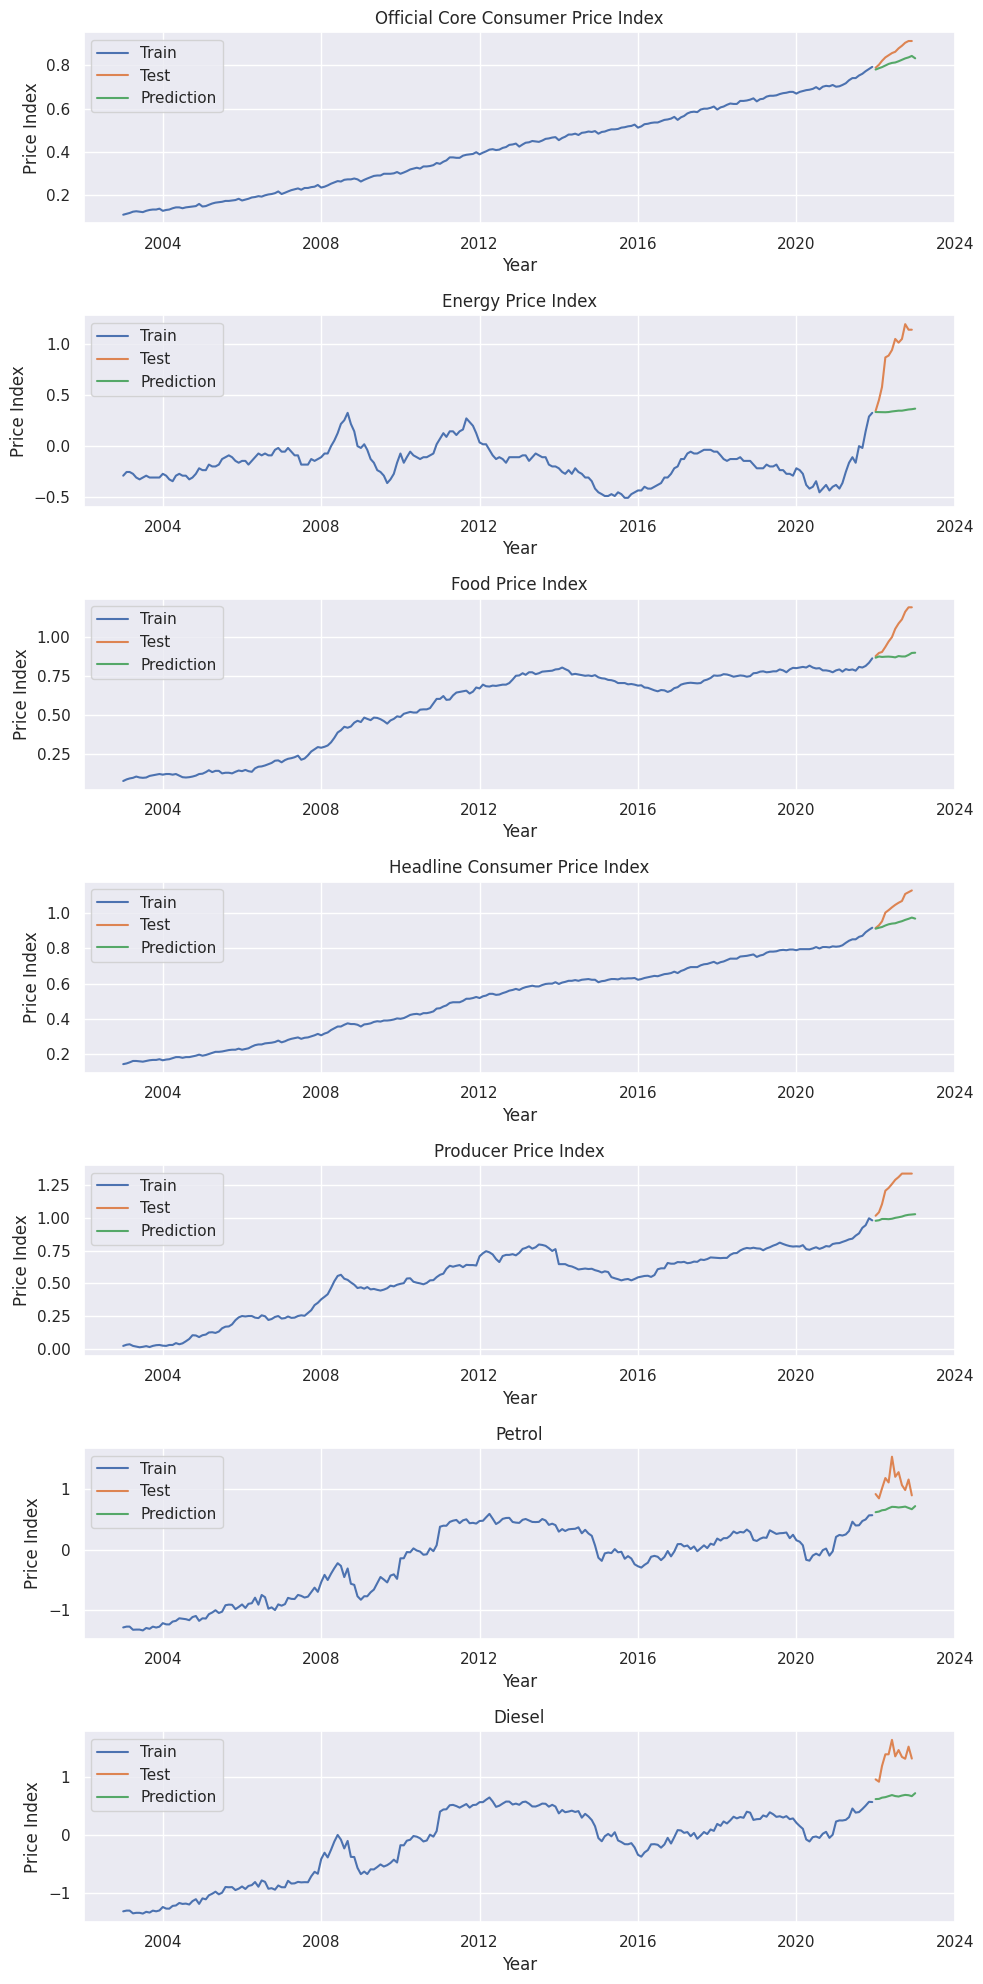

In [97]:
# merge the three dataframes on the index
merged_df = pd.concat([sarimaTrainDF, sarimaTestDF,sarimaResultDF],axis=1)
merged_df
# plot the train, test, and prediction values


fig,axes = plt.subplots(7,1,figsize=(10,20),)

for i,col in enumerate(['Official Core Consumer Price Index','Energy Price Index','Food Price Index','Headline Consumer Price Index','Producer Price Index','Petrol','Diesel']):
    axes[i].plot(merged_df.index, merged_df[f"{col} Train"], label='Train')
    axes[i].plot(merged_df.index, merged_df[f"{col} Test"], label='Test')
    axes[i].plot(merged_df.index, merged_df[f"{col} Prediction"], label='Prediction')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Price Index')
    axes[i].set_title(col)
    axes[i].legend()

fig.tight_layout()
plt.show()

## Deep Learning Models

### RNN model


In [98]:
# Navigate to RNN

### LSTM

In [99]:
# Navigate to LSTM

### Transformer

In [100]:
# Navigate to Transformer

## Model Generalisation

In [101]:
# Navigate to Dashboard

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=638889fe-2546-41ac-8d2f-f9d8b29d307c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>